Let’s work on the following:
1. Access the CB API (with my login info), which is inside Dropbox. Download the list of companies founded in 2016 and with category ‘Artificial Intelligence’. That should be 500sh companies, we start with a small sample.
2. For each of those companies, download all the NEWS that Crunchbase has. Try to put those news into an easy format: maybe a TXT file per news, and all TXT files of a company into one folder. And remove all non-relevant components (like Ads or other text). This will make it easier if somebody in the team will have to do some reading.
3. Once this looks good, we’ll do some NLP on the text. But let’s get the "raw data" first.
4. Please upload all material on Dropbox.

In [9]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import nltk
from nltk import *
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import sys
import codecs
import string
import random
import re

import requests
import urllib
import bs4
from bs4 import BeautifulSoup
from readability.readability import Document # https://github.com/buriy/python-readability. Tried Goose, Newspaper (python libraries on Github). Bad results.
from http.cookiejar import CookieJar # 

import pycrunchbase
cb = pycrunchbase.CrunchBase('662e263576fe3e4ea5991edfbcfb9883')

In [ ]:
# df = pd.DataFrame(columns=["permalink"])

# url = 'https://api.crunchbase.com/v3.1/organizations/?user_key=662e263576fe3e4ea5991edfbcfb9883'
# # location given here 
# location = "philadephia"

# # defining a params dict for the parameters to be sent to the API 
# PARAMS = {'address':location} 

# while True:
#     try:
#         response = requests.get(url, PARAMS)
#         json = response.json()
#         for c in json['data']['items']:
#             permalink=c['properties']['permalink']
#             if(permalink!=None):
#                 categories_json = requests.get("https://api.crunchbase.com/v3.1/organizations/" 
#                                 + permalink+"/categories?user_key=662e263576fe3e4ea5991edfbcfb9883", PARAMS).json()
#                 for cat in categories_json['data']['items']:
#                     if(cat["properties"]["category_groups"]!=None):
#                         if("Artificial Intelligence" in cat["properties"]["category_groups"]):
#                             print(permalink)
#                             df = df.append({'permalink' : permalink} , ignore_index=True)
#         url = json['data']['paging']['next_page_url'] + "&user_key=662e263576fe3e4ea5991edfbcfb9883"
#         print(url)
#     except:
#         print("error: " + url)
        
# df

df = pd.read_csv('csv_export/organizations.csv')
print(df.columns)
df

In [ ]:
ai_df = pd.DataFrame(columns = df.columns)
for i in range(len(df)):
    try:
        if("Artificial Intelligence" in df['category_group_list'][i] and '2016' in df['founded_on'][i]):
            ai_df = ai_df.append(df.loc[i])
    except:
        pass
ai_df

In [ ]:
ai_df= ai_df.reset_index(drop=True)
ai_df

In [ ]:
# location given here 
location = "philadephia"

# defining a params dict for the parameters to be sent to the API 
PARAMS = {'address':location} 
for i in range(len(ai_df)):
    permalink = ai_df['permalink'][i].split("/")[2]
    newpath = '/Users/ksun/downloads/startup-data/ai-organizations/' + permalink
    if not os.path.exists(newpath):
        print("create new folder", newpath)
        os.makedirs(newpath)
    
        url = 'https://api.crunchbase.com/v3.1/organizations/' + permalink+'?relationships=news&user_key=662e263576fe3e4ea5991edfbcfb9883'
        response_json = requests.get(url, PARAMS).json()

        for n in response_json['data']['relationships']['news']['items']:
            try:
                uri=n['properties']['url']
                opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor)
                opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.7 (KHTML, like Gecko) Chrome/16.0.912.77 Safari/535.7')]
                html =  opener.open(uri).read().decode('utf-8')
                readable_article = Document(html).summary()
                soup = BeautifulSoup(readable_article, "lxml")
                text = soup.get_text()

                name_of_file = uri.replace(".", "-").replace(":", "-").replace("/", "-")
                path = newpath + "/"

                completeName = os.path.join(path, name_of_file+".txt")  


                file1 = open(completeName, "w")

                file1.write(text)

                file1.close()
            except:
                pass
            
    if len(os.listdir(newpath)) == 0:
        print(newpath)
    
        url = 'https://api.crunchbase.com/v3.1/organizations/' + permalink+'?relationships=news&user_key=662e263576fe3e4ea5991edfbcfb9883'
        response_json = requests.get(url, PARAMS).json()
        print(url)

        for n in response_json['data']['relationships']['news']['items']:
            try:
                uri=n['properties']['url']
                print(uri)
                opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor)
                opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.7 (KHTML, like Gecko) Chrome/16.0.912.77 Safari/535.7')]
                html =  opener.open(uri).read().decode('utf-8')
                readable_article = Document(html).summary()
                soup = BeautifulSoup(readable_article, "lxml")
                text = soup.get_text()

                name_of_file = uri.replace(".", "-").replace(":", "-").replace("/", "-")
                path = newpath + "/"

                completeName = os.path.join(path, name_of_file+".txt")  


                file1 = open(completeName, "w")

                file1.write(text)
                if(len(text) != 0):
                    print("write complete:", newpath)

                file1.close()
            except:
                pass


Hi Kevin
Thanks again for coming in! And great job – this is an excellent first step.
Here are the next steps:
1. I went through the folders – most look good, but it’s possible there’s some missing material. Spend a little more time to perfect the downloading  code. See if you can fix whichever errors you find through the process. It might be best to make this code as smooth as possible now, before we scale to working with lots of companies.
2. I am assuming the scraping process is OK, but it’s probably helpful to take one more look at that too (i.e. for example, those few lines missing in the TXT we looked at together may happen elsewhere too, no huge deal but worth looking into it).
3. Once you’ve finalized the downloading process, let’s start with a very simple exercise on the TXT files. For each TXT of each company, write a code that counts the number of times the following keywords are mentioned: PROTOTYPE, TEST, EXPERIMENT, MINIMUM VIABLE PRODUCT, BETA, ALPHA. This is just a start, we’ll do more of this, but let’s see how this goes. You can then input this data into an Excel file (one row per company).
 
If possible, please write your Python code clearly and upload it. So I can try to take a look.
 
Please remember to submit your timesheet by Thursday night each week. Let’s try to meet week after Spring break, I am very flexible. Of course, please reach out if you have any questions at any point.
Thanks so much!
A

In [ ]:
import shutil
rootdir = '/Users/ksun/downloads/startup-data/ai-organizations/'

ai_df['articles'] = np.empty((len(ai_df), 0)).tolist()

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if '.DS_Store' not in file:
#             if(len(ai_df[ai_df['permalink'].astype(str).str.contains('/organization/' + subdir.split("/")[-1])])==0):
#                 print('/organization/' + subdir.split("/")[-1])
#                 shutil.rmtree(subdir)
#                 break
            row_index = ai_df.loc[ai_df['permalink'] == '/organization/' + subdir.split("/")[-1]].index.values.astype(int)[0]
            file = open(subdir +  "/" + file, "r")
            ai_df['articles'][row_index].append(file.read())
            file.close()

In [ ]:
ai_df.to_csv('csv_export/ai_df.csv', index=False)

In [ ]:
ai_df = pd.read_csv('csv_export/ai_df_old.csv', index_col=0)
ai_df
# ai_df.drop(['Unnamed: 0'], axis=1)
# ai_df.to_csv('csv_export/ai_df.csv', index=False)

1. Gather good data from twitter (make sure to scrape over several months, stop at December 2018
2. topic clusters, sentiment, OVER TIME (month level) for a specific company
3. Take one old company like Google and track over time
__________________________
Let’s continue to work on the 2016 sample of AI companies for now, just to keep it simple.
1. Let’s add news from TWITTER and GOOGLE NEWS. You decide how to better get the right material from these two sources.
2. Once we have all these sources in place, we can start by doing a simple sentiment analysis. Each company should have a time series of sentiment measures (i.e. number of negative news): so each company should be have observations between first month of life and Dec 2018.

In [ ]:
# location given here 
location = "philadephia"

import articleDateExtractor
from newspaper import Article

ai_df['articles'] = np.empty((len(ai_df), 0)).tolist()

# defining a params dict for the parameters to be sent to the API 
HEADERS = {'accept':"application/json"} 
for i in range(len(ai_df)):
    permalink = ai_df['permalink'][i].split("/")[2]
    
    url = 'https://api.crunchbase.com/v3.1/organizations/' + permalink+'?relationships=news&user_key=662e263576fe3e4ea5991edfbcfb9883'
    try:
        response_json = requests.get(url, headers=HEADERS, params={"$filter":"Path eq '/xxxxxx/'"}).json()
        print(url)

        for n in response_json['data']['relationships']['news']['items']:

            try:
                uri=n['properties']['url']
                opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor)
                opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.7 (KHTML, like Gecko) Chrome/16.0.912.77 Safari/535.7')]
                html =  opener.open(uri).read().decode('utf-8')
                readable_article = Document(html).summary()
                soup = BeautifulSoup(readable_article, "lxml")
                text = soup.get_text()

    #             article = Article(uri)
    #             article.parse()
                date = n['properties']['posted_on']
    #             date = articleDateExtractor.extractArticlePublishedDate(uri)


                ai_df['articles'][i].append([uri, date, text])


            except:
                print("error:", permalink)
    except:
        print("error", url)
        #ugly-research
        #recomomenderx, geopipe-inc, cloudzero, ekkono-solutions, trials-ai, quali-fit, vidrovr, ar-cadia, ns8-inc, vapispace, satisfy, gravyty, ignite-biosciences

In [ ]:
count = 0
for i in range(len(ai_df)):
    if(len(ai_df['articles'][i])>10):
        count+=1
print(count)

Thanks for coming in, Kevin!
 
I think we’re doing great progress.
 
Here's the next steps of this  task:
1. Let’s focus on just 1 company and just Twitter. We should try to get all tweets from that company and about that company (from the very beginning to Dec 31st 2018).
2. Let’s allocate the tweets on each month from the month in which the Twitter account opens.
3. Let’s run sentiment analysis and graph sentiment over all months. You could probably do a separate graph for tweets from the company and tweets about the company. The graph should be a time series, where axis X is date and Y is sentiment. It should basically look like a curve that goes on over time.
4. To do this, pick a good company: one that has enough tweets.
5. If the process is not to heavy, let’s scale it to 100 companies. Just pick 100 companies from your sample.
 
You can take a look at how much it’d be to move the process to Amazon Web Services. Let me know how it looks and we can then decide.
 
If possible, please send me an update sometimes next week and then we can probably meet the week of Apr 8th. (No need to meet next week!)
 
Thanks again!
A

In [3]:
ai_df['twitter_url'][142].split("/")[-2]

'kernelco'

In [ ]:
#  python Exporter.py --username "viralheat" --since 2016-01-01 --until 2018-12-31
# python Exporter.py --username "kernelco" --since 2016-01-01 --until 2018-12-31 --maxtweets 100
# python main.py --username "kernelco" --since 2016-01-01 --until 2018-12-31 --max-tweets 1000000

In [ ]:
from itertools import chain
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

ai_df['num_prototype'] = 0
ai_df['num_test'] = 0
ai_df['num_experiment'] = 0
ai_df['num_minimum_viable_product'] = 0
ai_df['num_beta'] = 0
ai_df['num_alpha'] = 0
for i in range(len(ai_df)):
    wordlist = []
    for a in ai_df['articles'][i]:
        wordlist.extend(list(chain(*[word_tokenize(s) for s in sent_tokenize(a)])))
    counter = Counter(wordlist)
    ai_df.loc[i, 'num_prototype'] = counter['prototype']
    ai_df.loc[i, 'num_test'] = counter['test']
    ai_df.loc[i, 'num_experiment'] = counter['experiment']
    ai_df.loc[i, 'num_minimum_viable_product'] = counter['viable']
    ai_df.loc[i, 'num_beta'] = counter['beta']
    ai_df.loc[i, 'num_alpha'] = counter['alpha']

In [41]:
import shutil
rootdir = '/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets'

ai_df['tweets'] = np.empty((len(ai_df), 0)).tolist()

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if '.DS_Store' not in file:
#             if(len(ai_df[ai_df['permalink'].astype(str).str.contains('/organization/' + subdir.split("/")[-1])])==0):
#                 print('/organization/' + subdir.split("/")[-1])
#                 shutil.rmtree(subdir)
#                 break
            row_index = ai_df.loc[ai_df['permalink'] == '/organization/' + file.split("/")[-1][0:-4]].index.values.astype(int)[0]
#             file = open(subdir +  "/" + file, "r")
            print(subdir +  "/" + file)
            temp_tweet_df = pd.read_csv(subdir +  "/" + file, error_bad_lines=False)
            for j in range(len(temp_tweet_df)):
                try:
                    ai_df['tweets'][row_index].append([str(temp_tweet_df['username'][j]),
                                                      str(temp_tweet_df['user_handle'][j]),
                                                      temp_tweet_df['date'][j],
                                                      temp_tweet_df['retweets'][j],
                                                      temp_tweet_df['favorites'][j],
                                                      str(temp_tweet_df['text'][j])])
                except:
                    continue

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bayonet.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/digital-startups.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cervest.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/intogral.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tuple-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/3one4.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/retinai-medical.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tenderlake.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pilot-automotive-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kudi.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/missinglink-ai.csv


b'Skipping line 66: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 12\n'
b'Skipping line 312: expected 11 fields, saw 12\n'
b'Skipping line 34: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/luko.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hostmud-cloud.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gainfy-foundation.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/visor-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/actionspot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gofind-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dessa.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/limeet.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lalilo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/overtime.csv


b'Skipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 45: expected 11 fields, saw 12\n'
b'Skipping line 24: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 12\nSkipping line 92: expected 11 fields, saw 12\nSkipping line 116: expected 11 fields, saw 12\n'
b'Skipping line 4531: expected 11 fields, saw 12\nSkipping line 5119: expected 11 fields, saw 12\nSkipping line 5222: expected 11 fields, saw 13\nSkipping line 7110: expected 11 fields, saw 13\nSkipping line 7258: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/workfit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/understandbetter.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pwave-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/forecasthq.csv


b'Skipping line 5: expected 11 fields, saw 12\nSkipping line 16: expected 11 fields, saw 13\nSkipping line 43: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 13\nSkipping line 93: expected 11 fields, saw 13\nSkipping line 96: expected 11 fields, saw 14\nSkipping line 98: expected 11 fields, saw 12\nSkipping line 99: expected 11 fields, saw 12\nSkipping line 101: expected 11 fields, saw 12\nSkipping line 106: expected 11 fields, saw 12\nSkipping line 107: expected 11 fields, saw 12\nSkipping line 123: expected 11 fields, saw 13\nSkipping line 127: expected 11 fields, saw 13\nSkipping line 171: expected 11 fields, saw 12\nSkipping line 473: expected 11 fields, saw 13\nSkipping line 606: expected 11 fields, saw 12\n'
b'Skipping line 12: expected 11 fields, saw 12\nSkipping line 33: expected 11 fields, saw 12\nSkipping line 378: expected 11 fields, saw 12\nSkipping line 380: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/polanyio.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/basiq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/intellimize.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/riseml.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/diaalog.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/etsimo-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/polte.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/signall.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spookfish.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tera-ventures.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sharkpick.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-T

b'Skipping line 3: expected 11 fields, saw 13\n'
b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 12\nSkipping line 40: expected 11 fields, saw 13\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 132: expected 11 fields, saw 12\nSkipping line 136: expected 11 fields, saw 12\nSkipping line 165: expected 11 fields, saw 14\nSkipping line 182: expected 11 fields, saw 13\nSkipping line 184: expected 11 fields, saw 13\nSkipping line 205: expected 11 fields, saw 13\nSkipping line 214: expected 11 fields, saw 13\nSkipping line 216: expected 11 fields, saw 12\nSkipping line 230: expected 11 fields, saw 13\nSkipping line 250: expected 11 fields, saw 13\nSkipping line 275: expected 11 fields, saw 12\nSkipping line 284: expected 11 fields, saw 14\nSkipping line 296: expected 11 fields, saw 14\nSkipping line 297: expected 11 fields, saw 14\nSkipping lin

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lzine.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/superflex.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/explosion-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/photolemur.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mjr-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botfuel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/latently.csv


b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 13: expected 11 fields, saw 12\n'
b'Skipping line 5: expected 11 fields, saw 13\nSkipping line 10: expected 11 fields, saw 13\nSkipping line 11: expected 11 fields, saw 12\nSkipping line 21: expected 11 fields, saw 12\n'
b'Skipping line 37: expected 11 fields, saw 12\nSkipping line 119: expected 11 fields, saw 14\nSkipping line 277: expected 11 fields, saw 13\nSkipping line 282: expected 11 fields, saw 12\nSkipping line 294: expected 11 fields, saw 13\nSkipping line 390: expected 11 fields, saw 12\nSkipping line 489: expected 11 fields, saw 14\nSkipping line 633: expected 11 fields, saw 13\nSkipping line 722: expected 11 fields, saw 15\nSkipping line 778: expected 11 fields, saw 12\nSkipping line 862: expected 11 fields, saw 14\nSkipping line 919: expected 11 fields, saw 12\nSkipping line 963: expected 11 fields, saw 13\nSkipping line 1069: expected 11 fields, saw 12\nSkipping line 1076: expected 11 fields, saw 12\nSkipping l

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pixibo-pte-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/millesime-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/atlan-space.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/piavita-ag.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/radix-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/octavia.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/4vants.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/merantix.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/smartbite.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/iv-robotics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/abaka-holdings.csv
/Users/ksun/downloads/startup-da

b'Skipping line 5: expected 11 fields, saw 12\nSkipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\n'
b'Skipping line 58: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 12\n'
b'Skipping line 17: expected 11 fields, saw 12\nSkipping line 22: expected 11 fields, saw 14\nSkipping line 23: expected 11 fields, saw 14\nSkipping line 25: expected 11 fields, saw 15\nSkipping line 37: expected 11 fields, saw 13\nSkipping line 38: expected 11 fields, saw 13\nSkipping line 39: expected 11 fields, saw 13\nSkipping line 53: expected 11 fields, saw 12\nSkipping line 66: expected 11 fields, saw 13\nSkipping line 91: expected 11 fields, saw 12\nSkipping line 97: expected 11 fields, saw 12\nSkipping line 105: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datatron.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fashinscoop.csv


b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 161: expected 11 fields, saw 12\nSkipping line 164: expected 11 fields, saw 12\nSkipping line 175: expected 11 fields, saw 13\nSkipping line 225: expected 11 fields, saw 14\nSkipping line 242: expected 11 fields, saw 13\nSkipping line 244: expected 11 fields, saw 13\nSkipping line 265: expected 11 fields, saw 13\nSkipping line 274: expected 11 fields, saw 13\nSkipping line 276: expected 11 fields, saw 12\nSkipping line 290: expected 11 fields, saw 13\nSkipping line 310: expected 11 fields, saw 13\nSkipping line 335: expected 11 fields, saw 12\nSkipping line 344: expected 11 fields, saw 14\nSkipping line 356: expected 11 fields, saw 14\nSkipping line 357: expected 11 fields, saw 14\nSkipping line 367: expected 11 fields, saw 12\nSkipping line 3

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/switi-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/luca-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/willowworks.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/butter-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-knowledge-society.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jollyclick.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hoverpin.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/onegcc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/astraea-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cyanapse.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mercanto.csv


b'Skipping line 18: expected 11 fields, saw 13\n'
b'Skipping line 113: expected 11 fields, saw 12\nSkipping line 114: expected 11 fields, saw 12\nSkipping line 119: expected 11 fields, saw 12\nSkipping line 121: expected 11 fields, saw 13\nSkipping line 123: expected 11 fields, saw 13\nSkipping line 148: expected 11 fields, saw 12\nSkipping line 184: expected 11 fields, saw 12\nSkipping line 188: expected 11 fields, saw 12\nSkipping line 217: expected 11 fields, saw 12\nSkipping line 251: expected 11 fields, saw 12\nSkipping line 292: expected 11 fields, saw 13\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 13\n'
b'Skipping line 96: expected 11 fields, saw 12\nSkipping line 119: expected 11 fields, saw 13\nSkipping line 132: expected 11 fields, saw 13\nSkipping line 146: expected 11 fields, saw 12\nSkipping line 168: expected 11 fields, saw 13\nSkipping line 189: expected 11 fields, saw 12\nSkipping line 209: expected 11 fields, saw 12\n'
b'

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mindolia.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thinkloot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/organalytix.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/silq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/automabots-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/roboresponse-llc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pimloc-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wing-1a47.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/loomai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/autox-ac12.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tryshifu.csv
/Users/ksun/downloads/startup-data/Tw

b'Skipping line 17: expected 11 fields, saw 12\n'
b'Skipping line 49: expected 11 fields, saw 14\nSkipping line 83: expected 11 fields, saw 13\nSkipping line 101: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ailytic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/motionscloud.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/saymosaic-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/crux-iq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/agilean-solutions-private-limited.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/qure-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/skadlabs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/indigo-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/marax-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/black-swan-technology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datacloud.csv
/Users/k

b'Skipping line 45: expected 11 fields, saw 12\nSkipping line 54: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 13\nSkipping line 23: expected 11 fields, saw 12\nSkipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 84: expected 11 fields, saw 13\nSkipping line 87: expected 11 fields, saw 15\nSkipping line 131: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 138: expected 11 fields, saw 12\nSkipping line 184: expected 11 fields, saw 12\nSkipping line 207: expected 11 fields, saw 12\n'
b'Skipping line 758: expected 11 fields, saw 12\nSkipping line 861: expected 11 fields, saw 12\nSkipping line 906: expected 11 fields, saw 12\nSkipping line 942: expected 11 fields, saw 14\nSkipping line 997: expected 11 fields, saw 12\nSkipping line 1383: expected 11 fields, saw 13\nSkipping line 1396: expected 11 fields, saw 12\nSkipping line 1430: expected 11 fields, saw 15\nSkipping line 1531: expected 11 fields, saw 12\nSki

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vidrovr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/boulevard-software.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tropos-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ellipsis-co.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gotbot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/arceo-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/farebond.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rapidrpa.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ovass.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/onwrks.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clover-intelligence.csv
/Users/ksun/downloads/startup-data/Tw

b'Skipping line 59: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 33: expected 11 fields, saw 15\nSkipping line 34: expected 11 fields, saw 12\nSkipping line 35: expected 11 fields, saw 15\nSkipping line 71: expected 11 fields, saw 12\nSkipping line 72: expected 11 fields, saw 12\nSkipping line 77: expected 11 fields, saw 12\nSkipping line 211: expected 11 fields, saw 13\nSkipping line 382: expected 11 fields, saw 12\nSkipping line 385: expected 11 fields, saw 13\n'
b'Skipping line 8: expected 11 fields, saw 13\nSkipping line 9: expected 11 fields, saw 13\nSkipping line 25: expected 11 fields, saw 14\n'
b'Skipping line 40: expected 11 fields, saw 12\nSkipping line 162: expected 11 fields, saw 13\nSkipping line 276: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/equally.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/medit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datacogin.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/intento.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/somnox-world-s-first-sleeprobot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/threatswitch.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/enpulsion.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brave-venture-labs.csv


b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 376: expected 11 fields, saw 12\nSkipping line 404: expected 11 fields, saw 12\nSkipping line 589: expected 11 fields, saw 12\n'
b'Skipping line 161: expected 11 fields, saw 12\n'
b'Skipping line 59: expected 11 fields, saw 12\n'
b'Skipping line 147: expected 11 fields, saw 12\nSkipping line 168: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ava-technologies-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/docgiant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/allegro-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/worksome.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/accel-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dept-agency.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botworx-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ling.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ascent-robotics-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scenethere.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cognigo.csv
/Users/ksun/downloads/start

b'Skipping line 5: expected 11 fields, saw 13\nSkipping line 7: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 25: expected 11 fields, saw 12\nSkipping line 43: expected 11 fields, saw 14\n'
b'Skipping line 85: expected 11 fields, saw 13\n'
b'Skipping line 3: expected 11 fields, saw 14\nSkipping line 10: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 13\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 34: expected 11 fields, saw 12\n'
b'Skipping line 152: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hoyt-niva-consulting-inc-hoytniva.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lightning-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sapientx.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botsupply.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/robotx-space.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ada-support.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/revere-intelligence.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/weps.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aingel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/felix-math.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kusanagi.csv
/Users/ksu

b'Skipping line 27: expected 11 fields, saw 12\n'
b'Skipping line 61: expected 11 fields, saw 13\n'
b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 41: expected 11 fields, saw 13\n'
b'Skipping line 18: expected 11 fields, saw 13\n'
b'Skipping line 18: expected 11 fields, saw 15\n'
b'Skipping line 33: expected 11 fields, saw 14\n'



/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cvviz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kraydel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ovonts-network.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/uxh.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/supercrunch-by-gfk.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pointshop.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/consensus.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/eightfold.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mendel-health.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alientech-com.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lüla.csv
/Users/ksun/downloads/startup-data/Tw

b'Skipping line 17: expected 11 fields, saw 12\nSkipping line 18: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 12\n'
b'Skipping line 12: expected 11 fields, saw 12\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 65: expected 11 fields, saw 15\nSkipping line 126: expected 11 fields, saw 14\n'
b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 22: expected 11 fields, saw 13\nSkipping line 48: expected 11 fields, saw 13\nSkipping line 55: expected 11 fields, saw 14\nSkipping line 77: expected 11 fields, saw 14\nSkipping line 99: expected 11 fields, saw 13\nSkipping line 107: expected 11 fields, saw 13\nSkipping line 226: expected 11 fields, saw 17\nSkipping line 233: expected 11 fields, saw 12\nSkipping line 236: expected 11 fields, saw 12\nSkipping line 254: expected 11 fields, saw 12\nSkipping line 280: expected 11 fields, saw 12\nSkipping line 282:

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/plant-jammer.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/swace-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rovco.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/we-assist.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/distillr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/visabot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bind-4-0.csv


b'Skipping line 164: expected 11 fields, saw 12\nSkipping line 165: expected 11 fields, saw 13\nSkipping line 166: expected 11 fields, saw 12\nSkipping line 306: expected 11 fields, saw 12\nSkipping line 313: expected 11 fields, saw 12\nSkipping line 323: expected 11 fields, saw 12\nSkipping line 329: expected 11 fields, saw 12\nSkipping line 331: expected 11 fields, saw 12\nSkipping line 333: expected 11 fields, saw 13\nSkipping line 336: expected 11 fields, saw 13\nSkipping line 346: expected 11 fields, saw 12\nSkipping line 519: expected 11 fields, saw 12\nSkipping line 626: expected 11 fields, saw 12\nSkipping line 640: expected 11 fields, saw 12\nSkipping line 659: expected 11 fields, saw 12\nSkipping line 683: expected 11 fields, saw 13\nSkipping line 685: expected 11 fields, saw 12\nSkipping line 691: expected 11 fields, saw 12\nSkipping line 703: expected 11 fields, saw 12\nSkipping line 714: expected 11 fields, saw 12\nSkipping line 716: expected 11 fields, saw 12\nSkipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/astound-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rafiqi-dcc9.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/favizone.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/iota-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rougetek-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/unleash-live.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/surbo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/toyota-research-institute.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/numberai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/boldr-effect.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/focoosin.csv
/Users/ksun/downloads/

b'Skipping line 5: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 42: expected 11 fields, saw 12\nSkipping line 50: expected 11 fields, saw 12\n'
b'Skipping line 16: expected 11 fields, saw 13\nSkipping line 44: expected 11 fields, saw 14\n'
b'Skipping line 27: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 12\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 13\nSkipping line 70: expected 11 fields, saw 13\n'
b'Skipping line 221: expected 11 fields, saw 12\nSkipping line 244: expected 11 fields, saw 12\nSkipping line 279: expected 11 fields, saw 12\nSkipping line 284: expected 11 fields, saw 13\nSkipping line 294: expected 11 fields, saw 12\nSkipping line 305: expected 11 fields, saw 15\nSkipping line 309: expected 11 fields, saw 15\nSkipping line 321: expected 11 fields, saw 13\nSkipping line 328: expected 11 fields, saw 12\nSkipping 

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/virtuallymagic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/acerta.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/healthtensor.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/autoscalr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jumper-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/training-calendar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/energi-mine.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/logic-pursuits.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bambu.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brodmann17.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/darmiyan.csv
/Users/ksun/downloads/start

b'Skipping line 16: expected 11 fields, saw 12\nSkipping line 28: expected 11 fields, saw 14\nSkipping line 33: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 18: expected 11 fields, saw 12\n'
b'Skipping line 13: expected 11 fields, saw 12\nSkipping line 189: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/remiqz-football.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/numericcal.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rasa.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vernax.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aurora-insight.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/curate-solutions.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thundermark-capital.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/challengerocket.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/somatic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/acksin.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/memgraph.csv
/Users/ksun/downloads/

b'Skipping line 6: expected 11 fields, saw 14\nSkipping line 10: expected 11 fields, saw 14\nSkipping line 11: expected 11 fields, saw 12\nSkipping line 25: expected 11 fields, saw 12\nSkipping line 27: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 12\n'
b'Skipping line 23: expected 11 fields, saw 13\n'
b'Skipping line 25: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 12\nSkipping line 125: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 178: expected 11 fields, saw 12\n'
b'Skipping line 158: expected 11 fields, saw 12\n'
b'Skipping line 40: expected 11 fields, saw 12\nSkipping line 81: expected 11 fields, saw 12\nSkipping line 141: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fabulyst.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/greycortex.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/baarb-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cognigy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rebel-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thirdwatch-preventing-e-commerce-fraud.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/smart-drivinc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/graphcore.csv


b'Skipping line 93: expected 11 fields, saw 12\n'
b'Skipping line 46: expected 11 fields, saw 12\nSkipping line 51: expected 11 fields, saw 12\n'
b'Skipping line 12: expected 11 fields, saw 12\nSkipping line 18: expected 11 fields, saw 14\nSkipping line 21: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 13\nSkipping line 78: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 13\nSkipping line 99: expected 11 fields, saw 14\nSkipping line 120: expected 11 fields, saw 12\nSkipping line 125: expected 11 fields, saw 13\nSkipping line 150: expected 11 fields, saw 12\nSkipping line 153: expected 11 fields, saw 13\nSkipping line 155: expected 11 fields, saw 12\nSkipping line 164: expected 11 fields, saw 12\nSkipping line 167: expected 11 fields, saw 12\nSkipping line 171: expected 11 fields, saw 13\nSkipping line 17

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scanbard.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yu-life.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/frosha.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/poladrone.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ekkono-solutions.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jetfuel-tech-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/peninsula-seven.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/elif-lab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mr-chatbot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/emtelligent-software-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/siptip.csv
/Users/ksun/downl

b'Skipping line 167: expected 11 fields, saw 12\nSkipping line 181: expected 11 fields, saw 12\nSkipping line 401: expected 11 fields, saw 12\n'
b'Skipping line 19: expected 11 fields, saw 12\nSkipping line 33: expected 11 fields, saw 12\n'
b'Skipping line 36: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\n'
b'Skipping line 68: expected 11 fields, saw 12\nSkipping line 81: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 13\nSkipping line 106: expected 11 fields, saw 12\nSkipping line 116: expected 11 fields, saw 16\nSkipping line 121: expected 11 fields, saw 12\nSkipping line 122: expected 11 fields, saw 12\nSkipping line 126: expected 11 fields, saw 12\nSkipping line 152: expected 11 fields, saw 12\nSkipping line 155: expected 11 fields, saw 12\nSkipping line 173: expected 11 fields, saw 12\nSkipping line 186: expected 11 fields, saw 12\nSkipping line 218: expected 11 fields, saw 12\nSkipping line 231: expected 11 fields, saw 13\nSkippi

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/corti.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/int-data-labs-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/suchflex.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/instigate-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/1uni.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trials-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/metasense-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cultovo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/darvin-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/planetwatchers.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/predictive-people.csv
/Users/ksun/downloads

b'Skipping line 16: expected 11 fields, saw 13\nSkipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 19: expected 11 fields, saw 14\nSkipping line 34: expected 11 fields, saw 12\nSkipping line 57: expected 11 fields, saw 12\n'
b'Skipping line 62: expected 11 fields, saw 12\nSkipping line 70: expected 11 fields, saw 13\nSkipping line 87: expected 11 fields, saw 12\nSkipping line 130: expected 11 fields, saw 13\n'
b'Skipping line 7: expected 11 fields, saw 16\nSkipping line 12: expected 11 fields, saw 14\nSkipping line 36: expected 11 fields, saw 14\nSkipping line 75: expected 11 fields, saw 12\n'
b'Skipping line 34: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 12\n'
b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\nSkipping line 46: expected 11 fields, saw 12\nSkipping line 68: expected 11 fields, saw 13\nSkipping line 104: expected 11 fields, saw 12\nSkipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/chava.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lobe.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mylestone.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/waymark-tech-ltd.csv


b'Skipping line 86: expected 11 fields, saw 12\nSkipping line 92: expected 11 fields, saw 12\nSkipping line 97: expected 11 fields, saw 12\nSkipping line 118: expected 11 fields, saw 12\nSkipping line 140: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\n'
b'Skipping line 168: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\nSkipping line 53: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 50: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 13\nSkipping line 8: expected 11 fields, saw 14\nSkipping line 59: expected 11 fields, saw 14\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 22: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/huxley.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/chefling-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/metavoyant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-bodbx.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cherry-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sproutlogix.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/supaspot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pillar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bulkwhiz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/oli-fashion-house.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/derq.csv
/Users/ksun/downloads/startup-data/Twitter

b'Skipping line 73: expected 11 fields, saw 12\nSkipping line 75: expected 11 fields, saw 12\nSkipping line 251: expected 11 fields, saw 12\nSkipping line 289: expected 11 fields, saw 12\nSkipping line 325: expected 11 fields, saw 12\n'
b'Skipping line 707: expected 11 fields, saw 12\nSkipping line 861: expected 11 fields, saw 12\nSkipping line 895: expected 11 fields, saw 12\nSkipping line 992: expected 11 fields, saw 14\nSkipping line 1063: expected 11 fields, saw 12\nSkipping line 1194: expected 11 fields, saw 12\nSkipping line 1266: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/freightwaves.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/weedguide.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kluster-intelligence.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/petuum.csv

b'Skipping line 80: expected 11 fields, saw 12\nSkipping line 104: expected 11 fields, saw 15\nSkipping line 131: expected 11 fields, saw 12\n'
b'Skipping line 70: expected 11 fields, saw 13\nSkipping line 98: expected 11 fields, saw 15\n'
b'Skipping line 34: expected 11 fields, saw 12\nSkipping line 42: expected 11 fields, saw 15\nSkipping line 48: expected 11 fields, saw 13\nSkipping line 51: expected 11 fields, saw 12\nSkipping line 52: expected 11 fields, saw 14\nSkipping line 57: expected 11 fields, saw 13\nSkipping line 60: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 13\n'
b'Skipping line 10: expected 11 fields, saw 13\n'
b'Skipping line 21: expected 11 fields, saw 16\nSkipping line 61: expected 11 fields, saw 15\nSkipping line 389: expected 11 fields, saw 13\nSkipping line 415: expected 11 fields, saw 13\nSkipping line 677: expected 11 fields, saw 12\n'



/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gyant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/qanairy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/einride.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neurodata-lab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/algorx.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alcazar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/2da-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/uae-top-10.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/quantum-talent.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/owkin-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sarwa-co.csv
/Users/ksun/downloads/startup-data/Twitter-G

b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 13: expected 11 fields, saw 12\nSkipping line 17: expected 11 fields, saw 13\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 29: expected 11 fields, saw 12\nSkipping line 43: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 13\nSkipping line 15: expected 11 fields, saw 12\nSkipping line 42: expected 11 fields, saw 12\n'
b'Skipping line 35: expected 11 fields, saw 12\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 101: expected 11 fields, saw 12\nSkipping line 147: expected 11 fields, saw 12\nSkipping line 153: expected 11 fields, saw 12\nSkipping line 154: expected 11 fields, saw 12\nSkipping line 156: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 14\nSkipping line 163: expected 11 fields, saw 13\nSkipping line 165: expected 11 fields, saw 14\nSkipping line 174: expected 11 fields, saw 13\nSkipping line 191: expected 11 fields, saw 13\nSkipping line

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lexit-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ohmybet.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fetchrev.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/axonize.csv


b'Skipping line 175: expected 11 fields, saw 13\nSkipping line 200: expected 11 fields, saw 12\nSkipping line 213: expected 11 fields, saw 12\nSkipping line 217: expected 11 fields, saw 12\nSkipping line 222: expected 11 fields, saw 13\nSkipping line 229: expected 11 fields, saw 12\nSkipping line 231: expected 11 fields, saw 12\nSkipping line 238: expected 11 fields, saw 12\nSkipping line 247: expected 11 fields, saw 12\nSkipping line 250: expected 11 fields, saw 12\nSkipping line 257: expected 11 fields, saw 12\nSkipping line 262: expected 11 fields, saw 12\nSkipping line 267: expected 11 fields, saw 13\nSkipping line 271: expected 11 fields, saw 12\nSkipping line 277: expected 11 fields, saw 12\nSkipping line 286: expected 11 fields, saw 12\nSkipping line 302: expected 11 fields, saw 12\nSkipping line 308: expected 11 fields, saw 12\nSkipping line 311: expected 11 fields, saw 12\nSkipping line 316: expected 11 fields, saw 13\nSkipping line 322: expected 11 fields, saw 12\nSkipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/stratejos.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/healthihabits-ab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/artifilter.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sway-finance.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/adeptmind.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brandtotal.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neenopal-intelligent-solutions-pvt-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wyker.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/finfox.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/abs-technology-limited.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/juro.csv
/

b'Skipping line 3: expected 11 fields, saw 13\nSkipping line 22: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 12\nSkipping line 50: expected 11 fields, saw 13\nSkipping line 57: expected 11 fields, saw 15\nSkipping line 62: expected 11 fields, saw 12\nSkipping line 68: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 14\nSkipping line 15: expected 11 fields, saw 12\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 34: expected 11 fields, saw 12\nSkipping line 76: expected 11 fields, saw 12\nSkipping line 112: expected 11 fields, saw 12\nSkipping line 151: expected 11 fields, saw 14\n'
b'Skipping line 12: expected 11 fields, saw 12\nSkipping line 293: expected 11 fields, saw 12\n'
b'Skipping line 208: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/analytics-insight.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/orbi-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jobmatchme.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wild-tree-tech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kriya-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/qanta-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-expert-community.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/inoven.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/octane-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/crystal-apps-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/chatler-ai.csv
/Users/ksun/down

b'Skipping line 37: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 15\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 12\nSkipping line 49: expected 11 fields, saw 14\nSkipping line 56: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 13\nSkipping line 67: expected 11 fields, saw 12\nSkipping line 75: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 88: expected 11 fields, saw 12\nSkipping line 98: expected 11 fields, saw 12\nSkipping line 99: expected 11 fields, saw 13\nSkipping line 125: expected 11 fields, saw 13\nSkipping line 126: expected 11 fields, saw 14\n'
b'Skipping line 17: expected 11 fields, saw 12\nSkipping line 18: expected 11 fields, saw 12\nSkipping line 25: expected 11 fields, saw 13\n'
b'Skipping line 17: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lurity.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aidentify.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tortuga-agtech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/physicaltech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/statmetrix.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/codersfirst.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/moesif.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botler.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sweepatic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nautilus-labs-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/glider-ai.csv


b'Skipping line 51: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\n'
b'Skipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 13\nSkipping line 4: expected 11 fields, saw 14\n'
b'Skipping line 11: expected 11 fields, saw 13\nSkipping line 12: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 13\n'
b'Skipping line 284: expected 11 fields, saw 12\nSkipping line 418: expected 11 fields, saw 12\nSkipping line 456: expected 11 fields, saw 12\nSkipping line 589: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/agile-stacks-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/goevoapp.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tobyto.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cignal-io-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/floydhub.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/veri-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/third-space-auto.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/diffblue.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/teralytic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/equitysim.csv


b'Skipping line 22: expected 11 fields, saw 12\nSkipping line 40: expected 11 fields, saw 14\nSkipping line 52: expected 11 fields, saw 13\n'
b'Skipping line 37: expected 11 fields, saw 13\nSkipping line 48: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\nSkipping line 60: expected 11 fields, saw 13\nSkipping line 67: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 13\nSkipping line 78: expected 11 fields, saw 12\nSkipping line 151: expected 11 fields, saw 12\nSkipping line 192: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 160: expected 11 fields, saw 12\nSkipping line 163: expected 11 fields, saw 12\nSkipping line 173: expected 11 fields, saw 13\nSkipping line 205: expected 11 fields, saw 14\nSkipping line 222

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/youper.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cikisi.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datalog-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gestalt-robotics-gmbh.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ai-visualize-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rplanx-technology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/metamoto-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/heyjobs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botnation-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cobalt-robotics-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spotawheel.csv


b'Skipping line 37: expected 11 fields, saw 13\nSkipping line 52: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 13\nSkipping line 113: expected 11 fields, saw 13\n'
b'Skipping line 45: expected 12 fields, saw 13\nSkipping line 69: expected 12 fields, saw 13\n'
b'Skipping line 15: expected 11 fields, saw 13\nSkipping line 16: expected 11 fields, saw 12\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 46: expected 11 fields, saw 12\n'
b'Skipping line 13: expected 11 fields, saw 12\nSkipping line 29: expected 11 fields, saw 12\nSkipping line 41: expected 11 fields, saw 12\n'
b'Skipping line 186: expected 11 fields, saw 12\nSkipping line 213: expected 11 fields, saw 12\nSkipping line 278: expected 11 fields, saw 12\nSkipping line 280: expected 11 fields, saw 12\nSkipping line 318: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/center-for-political-leadership.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/agripredict.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/amplemarket.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/unicorn-ar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mendux.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/motiva-2.csv


b'Skipping line 8: expected 11 fields, saw 12\nSkipping line 187: expected 11 fields, saw 12\nSkipping line 218: expected 11 fields, saw 12\nSkipping line 229: expected 11 fields, saw 12\n'
b'Skipping line 42: expected 11 fields, saw 13\nSkipping line 154: expected 11 fields, saw 13\nSkipping line 381: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 16: expected 11 fields, saw 12\nSkipping line 31: expected 11 fields, saw 13\nSkipping line 34: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trapmine.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tuml.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/litimetrics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/league-of-scholars.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/docyet.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cloudkite.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/maxwell-mri.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/optimail.csv


b'Skipping line 18: expected 11 fields, saw 12\nSkipping line 34: expected 11 fields, saw 14\nSkipping line 39: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 13\nSkipping line 108: expected 11 fields, saw 12\nSkipping line 119: expected 11 fields, saw 12\nSkipping line 185: expected 11 fields, saw 14\nSkipping line 246: expected 11 fields, saw 12\nSkipping line 332: expected 11 fields, saw 12\nSkipping line 365: expected 11 fields, saw 12\nSkipping line 366: expected 11 fields, saw 12\nSkipping line 368: expected 11 fields, saw 13\nSkipping line 408: expected 11 fields, saw 12\nSkipping line 439: expected 11 fields, saw 12\nSkipping line 452: expected 11 fields, saw 12\nSkipping line 464: expected 11 fields, saw 12\nSkipping line 480: expected 11 fields, saw 12\nSkipping line 489: expected 11 fields, saw 12\nSkipping line 517: expected 11 fields, saw 12\nSkipping line 527: expected 11 fields, saw 12\nSkipping line 547: expected 11 fields, saw 13\n'
b'Skipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/swiss-data-science-center.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/inapptics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/we-are-beep.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botcube.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cleo-finance.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spyglaz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alsen-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/reely.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/regeneration.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/deepcurrent.csv


b'Skipping line 34: expected 11 fields, saw 12\n'
b'Skipping line 77: expected 11 fields, saw 13\nSkipping line 130: expected 11 fields, saw 12\n'
b'Skipping line 118: expected 11 fields, saw 12\nSkipping line 191: expected 11 fields, saw 12\nSkipping line 194: expected 11 fields, saw 12\n'
b'Skipping line 94: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/diafyt.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/octotrip.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/roadbotics-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/canvass-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/convo-ads.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/serious-vr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/relativity6.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/reason8.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ehnote.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pay-as-you-stay.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kayrros.csv
/Users/ksun/downloads/startup-da

b'Skipping line 76: expected 11 fields, saw 12\nSkipping line 92: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 15\n'
b'Skipping line 13: expected 11 fields, saw 12\n'
b'Skipping line 30: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 145: expected 11 fields, saw 14\nSkipping line 162: expected 11 fields, saw 13\nSkipping line 164: expected 11 fields, saw 13\nSkipping line 185: expected 11 fields, saw 13\nSkipping line 194: expected 11 fields, saw 13\nSkipping line 196: expected 11 fields, saw 12\nSkipping line 210: expected 11 fields, saw 13\nSkipping line 230: expected 11 fields, saw 13\nSkipping line 255: expected 11 fields, saw 12\nSkipping line 264: expected 11 fields, saw 14\nSkipping line 276: expected 11 fields, saw 14\nSkipping line 277: expected 11 fields, saw 14\nSkipping line 287: expected 11 fields, saw 12\nSkipping

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ezeebuynow.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trafisense.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lending-express.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alpha-i.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/revsmart-wearable-hk-company-limited.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dathena-science.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/byte-prophecy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sidekick-professional-services.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/foxintelligence.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yuvtar-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-S

b'Skipping line 16: expected 11 fields, saw 13\nSkipping line 18: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 13\nSkipping line 9: expected 11 fields, saw 15\nSkipping line 16: expected 11 fields, saw 13\n'
b'Skipping line 27: expected 11 fields, saw 13\nSkipping line 69: expected 11 fields, saw 15\nSkipping line 71: expected 11 fields, saw 13\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 14\nSkipping line 75: expected 11 fields, saw 12\nSkipping line 76: expected 11 fields, saw 13\nSkipping line 77: expected 11 fields, saw 12\nSkipping line 78: expected 11 fields, saw 12\nSkipping line 79: expected 11 fields, saw 12\nSkipping line 80: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 86: expected 11 fields, saw 12\nSkipping line 87: expected 11 fields, saw 12\nSkipping line 88: expec

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/worlzen.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tradeteq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/findo-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/endtest.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jiminny-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/earth-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kapiche.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/knowledgefy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/reme.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spoon-fcae.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ionic-ai.csv


b'Skipping line 13: expected 11 fields, saw 13\nSkipping line 21: expected 11 fields, saw 12\n'
b'Skipping line 5: expected 11 fields, saw 12\nSkipping line 25: expected 11 fields, saw 12\nSkipping line 65: expected 11 fields, saw 12\n'
b'Skipping line 57: expected 11 fields, saw 13\nSkipping line 59: expected 11 fields, saw 12\n'
b'Skipping line 20: expected 11 fields, saw 13\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 39: expected 11 fields, saw 13\nSkipping line 42: expected 11 fields, saw 12\nSkipping line 59: expected 11 fields, saw 12\nSkipping line 122: expected 11 fields, saw 14\nSkipping line 189: expected 11 fields, saw 12\nSkipping line 216: expected 11 fields, saw 12\nSkipping line 235: expected 11 fields, saw 15\n'
b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 40: expected 11 fields, saw 13\n'
b'Skipping line 54: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 12\nSkipping line 68: expected 11 fields, saw 12\nSkipping 

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/opencity-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/webmonks.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ml-works.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dunforce.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/locke-data.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yote.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kausoft-gmbh.csv


b'Skipping line 344: expected 11 fields, saw 13\nSkipping line 496: expected 11 fields, saw 12\nSkipping line 497: expected 11 fields, saw 12\nSkipping line 498: expected 11 fields, saw 12\nSkipping line 513: expected 11 fields, saw 12\nSkipping line 514: expected 11 fields, saw 12\n'
b'Skipping line 131: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 241: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 34: expected 11 fields, saw 12\n'
b'Skipping line 56: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 81: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 12\nSkipping line 274: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/joonko.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pragmatic-master.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/knockri.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sigma-ratings.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/robots-go-mental.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/metis-machine.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/digital-ventures-599e.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/apollo-agriculture.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/themonetizr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/craftworkz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zensed.csv
/User

b'Skipping line 42: expected 11 fields, saw 12\n'
b'Skipping line 30: expected 11 fields, saw 12\nSkipping line 34: expected 11 fields, saw 14\n'
b'Skipping line 139: expected 11 fields, saw 13\nSkipping line 287: expected 11 fields, saw 13\nSkipping line 297: expected 11 fields, saw 13\n'
b'Skipping line 60: expected 11 fields, saw 12\n'
b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 78: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 6: expected 11 fields, saw 12\nSkipping line 11: expected 11 fields, saw 12\n'
b'Skipping line 21: expected 11 fields, saw 12\nSkipping line 29: expected 11 fields, saw 14\nSkipping line 70: expected 11 fields, saw 12\nSkipping line 72: expected 11 fields, saw 13\nSkipping line 81: expected 11 fields, saw 13\nSkipping line 89: expected 11 fields, saw 14\nSkipping line 94: expected 11 fields, saw 12\nSkipping line 145: expected 11 fields, saw 12\nSkipping line 186: expected 11 fields, saw 14\nSkipp

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/predictice.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-start-exchange.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aiva-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sparkflows.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nextai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/woveon.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/keewi-4.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ultimate-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/binah-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/leap-three.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/epica.csv
/Users/ksun/downloads/startup-data

b'Skipping line 3: expected 11 fields, saw 14\nSkipping line 10: expected 11 fields, saw 13\n'
b'Skipping line 8: expected 11 fields, saw 14\n'
b'Skipping line 16: expected 11 fields, saw 13\nSkipping line 60: expected 11 fields, saw 12\n'
b'Skipping line 5: expected 11 fields, saw 12\nSkipping line 7: expected 11 fields, saw 12\nSkipping line 31: expected 11 fields, saw 12\nSkipping line 32: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 12\nSkipping line 15: expected 11 fields, saw 13\nSkipping line 28: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/truck-driver-power.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cnvrg-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/little-robot-friends.csv


b'Skipping line 23: expected 11 fields, saw 13\nSkipping line 24: expected 11 fields, saw 13\n'
b'Skipping line 66: expected 11 fields, saw 12\nSkipping line 183: expected 11 fields, saw 13\nSkipping line 371: expected 11 fields, saw 14\nSkipping line 383: expected 11 fields, saw 12\nSkipping line 668: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 12\nSkipping line 29: expected 11 fields, saw 12\n'
b'Skipping line 189: expected 11 fields, saw 12\nSkipping line 206: expected 11 fields, saw 12\nSkipping line 346: expected 11 fields, saw 12\nSkipping line 372: expected 11 fields, saw 12\nSkipping line 423: expected 11 fields, saw 12\nSkipping line 462: expected 11 fields, saw 12\nSkipping line 483: expected 11 fields, saw 12\nSkipping line 484: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pensa-systems.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/manifold-bb76.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/healtheweather.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/azumo-llc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/landmine-boys.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/omni-eletrônica.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/woundmetrics-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/calibermind.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clara-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aimmatic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/virtualitics.csv
/Us

b'Skipping line 203: expected 11 fields, saw 13\n'
b'Skipping line 22: expected 11 fields, saw 12\n'
b'Skipping line 117: expected 11 fields, saw 12\n'



/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dynamic-components.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/causebot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mylittleadventure.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/barprose.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/play-shifu.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bromin7-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/paradox-olivia.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/payr.csv


b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 13\nSkipping line 93: expected 11 fields, saw 12\nSkipping line 128: expected 11 fields, saw 12\n'
b'Skipping line 33: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 13\nSkipping line 75: expected 11 fields, saw 13\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 13\nSkipping line 64: expected 11 fields, saw 14\n'
b'Skipping line 58: expected 11 fields, saw 12\nSkipping line 155: expected 11 fields, saw 13\nSkipping line 229: expected 11 fields, saw 12\nSkipping line 281: expected 11 fields, saw 12\nSkipping line 291: expected 11 fields, saw 12\nSkipping line 669: expected 11 fields, saw 12\nSkipping line 712: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/poeko-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/shoptaki.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/luxai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nuwa-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/predina-tech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/redock.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pluto-search.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/igenius-2.csv


b'Skipping line 5: expected 11 fields, saw 12\n'
b'Skipping line 53: expected 11 fields, saw 15\nSkipping line 56: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 13\nSkipping line 79: expected 11 fields, saw 12\n'
b'Skipping line 151: expected 11 fields, saw 12\nSkipping line 218: expected 11 fields, saw 12\nSkipping line 335: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kompli-global.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/skyryse.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dreambit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/e-bot7.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nyxion-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nordic-eye-venture-capital.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botcentral.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/xtract-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/madevivid.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/peekur.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/elves.csv
/Users/ksun/downloads/st

b'Skipping line 17: expected 11 fields, saw 15\n'
b'Skipping line 26: expected 11 fields, saw 13\nSkipping line 47: expected 11 fields, saw 12\nSkipping line 52: expected 11 fields, saw 13\nSkipping line 61: expected 11 fields, saw 13\nSkipping line 63: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 75: expected 11 fields, saw 12\nSkipping line 88: expected 11 fields, saw 13\nSkipping line 97: expected 11 fields, saw 12\nSkipping line 129: expected 11 fields, saw 13\nSkipping line 146: expected 11 fields, saw 13\nSkipping line 149: expected 11 fields, saw 12\nSkipping line 153: expected 11 fields, saw 12\nSkipping line 161: expected 11 fields, saw 14\nSkipping line 166: expected 11 fields, saw 12\nSkipping line 191: expected 11 fields, saw 13\nSkipping line 194: expected 11 fields, saw 12\nSkipping line 196: expected 11 fields, saw 12\nSkipping line 244: expected 11 fields, saw 12\nSkipping line 267:

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neuralcat.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sonalytic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/prospectify.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/meero.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/opolox-data-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kronologic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/insurers-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scanye.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/telelytics-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gogoguest-inc.csv


b'Skipping line 876: expected 11 fields, saw 12\nSkipping line 1116: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 8: expected 11 fields, saw 12\nSkipping line 9: expected 11 fields, saw 12\nSkipping line 10: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\n'
b'Skipping line 10: expected 11 fields, saw 14\nSkipping line 14: expected 11 fields, saw 13\nSkipping line 18: expected 11 fields, saw 13\nSkipping line 19: expected 11 fields, saw 13\nSkipping line 25: expected 11 fields, saw 12\nSkipping line 109: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jitjatjo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/biopharmatrend-com.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/banian-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/r-ga-marketing-tech-venture-studio-in-partnership-with-ipg-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scaleup-ventures.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/myndshft-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/skillate.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/octi.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mrjonesedition.csv


b'Skipping line 43: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\n'
b'Skipping line 61: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 12\nSkipping line 72: expected 11 fields, saw 12\nSkipping line 77: expected 11 fields, saw 12\nSkipping line 79: expected 11 fields, saw 13\nSkipping line 80: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 12\nSkipping line 96: expected 11 fields, saw 12\nSkipping line 100: expected 11 fields, saw 12\nSkipping line 106: expected 11 fields, saw 12\nSkipping line 115: expected 11 fields, saw 12\nSkipping line 120: expected 11 fields, saw 12\nSkipping line 129: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 139: expected 11 fields, saw 13\nSkipping line 140: ex

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/boxx-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/miso-robotics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/keito.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/crafty.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wesee.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/angel-intelligence.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/easyleadz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datacracy-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/stella-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/audio-to-the-people.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gecko-robotics.csv
/Users/ksun/downloads/sta

b'Skipping line 35: expected 11 fields, saw 12\n'
b'Skipping line 5: expected 11 fields, saw 12\nSkipping line 11: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 12\nSkipping line 15: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\nSkipping line 23: expected 11 fields, saw 15\n'
b'Skipping line 41: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/omny-iq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sitefocus-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/i-laps.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clearcover.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lucidya.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bicedeep.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/frizbit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nndata.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cerevrum-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/janasense.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/helplama.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Ol

b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 6: expected 11 fields, saw 15\nSkipping line 9: expected 11 fields, saw 12\nSkipping line 25: expected 11 fields, saw 13\nSkipping line 27: expected 11 fields, saw 13\nSkipping line 28: expected 11 fields, saw 13\nSkipping line 29: expected 11 fields, saw 15\nSkipping line 32: expected 11 fields, saw 15\nSkipping line 34: expected 11 fields, saw 14\nSkipping line 35: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\nSkipping line 38: expected 11 fields, saw 13\nSkipping line 40: expected 11 fields, saw 13\nSkipping line 85: expected 11 fields, saw 13\nSkipping line 86: expected 11 fields, saw 12\nSkipping line 88: expected 11 fields, saw 12\nSkipping line 144: expected 11 fields, saw 12\nSkipping line 145: expected 11 fields, saw 14\nSkipping line 155: expected 11 fields, saw 13\nSkipping line 203: expected 11 fields, saw 14\nSkipping line 257: expected 11 

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cerebri-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/firefly-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/otherwise.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/asaii.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pedal-global.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botique-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/deckard.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/donotpay.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vahan.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/adshotel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ping-6.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-T

b'Skipping line 8: expected 11 fields, saw 12\nSkipping line 11: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 13\nSkipping line 16: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 12\n'
b'Skipping line 87: expected 11 fields, saw 12\nSkipping line 157: expected 11 fields, saw 12\nSkipping line 168: expected 11 fields, saw 13\nSkipping line 170: expected 11 fields, saw 12\nSkipping line 213: expected 11 fields, saw 12\nSkipping line 222: expected 11 fields, saw 12\n'
b'Skipping line 39: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/greenmason.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/oculyze.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/glazy-gmbh.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/citintelly.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nex-cubed.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/autonomic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/qrithm.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pick-it.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ichain-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aervio.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/webio.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tw

b'Skipping line 9: expected 11 fields, saw 12\n'
b'Skipping line 20: expected 11 fields, saw 12\nSkipping line 41: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 13\n'
b'Skipping line 4: expected 11 fields, saw 13\n'
b'Skipping line 74: expected 11 fields, saw 13\nSkipping line 79: expected 11 fields, saw 16\nSkipping line 82: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 14\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 87: expected 11 fields, saw 15\nSkipping line 89: expected 11 fields, saw 12\n'
b'Skipping line 28: expected 11 fields, saw 13\nSkipping line 33: expected 11 fields, saw 15\nSkipping line 36: expected 11 fields, saw 13\nSkipping line 87: expected 11 fields, saw 12\nSkipping line 89: expected 11 fields, saw 13\nSkipping line 92: expected 11 fields, saw 14\nSkipping line 109: expected 11 fields, saw 15\nSkipping line 110: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\nSkipping l

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/braiq-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aichat.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/98fit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/white-lab-s-a-l.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/balanced-media-technology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/waste-robotics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rezza.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/passage-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cliclap.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/instantgo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/syndicated-loan-direct.csv


b'Skipping line 35: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 14\nSkipping line 61: expected 11 fields, saw 13\nSkipping line 64: expected 11 fields, saw 14\n'
b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 15: expected 11 fields, saw 13\nSkipping line 21: expected 11 fields, saw 12\nSkipping line 23: expected 11 fields, saw 12\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 31: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 13\nSkipping line 41: expected 11 fields, saw 13\nSkipping line 44: expected 11 fields, saw 13\nSkipping line 51: expected 11 fields, saw 13\nSkipping line 53: expected 11 fields, saw 12\nSkipping line 56: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 12\n'
b'Skipping line 238: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 25: ex

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scanta.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/my-intelligent-machines.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yanu.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/piik-insights.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mobalytics-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/discern.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spatial-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/syncro.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pricemoov.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/xanadu-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/heat-intelligence.csv
/Users/ksun/downloads/start

b'Skipping line 45: expected 11 fields, saw 12\nSkipping line 46: expected 11 fields, saw 12\n'
b'Skipping line 114: expected 11 fields, saw 13\nSkipping line 131: expected 11 fields, saw 13\nSkipping line 137: expected 11 fields, saw 13\nSkipping line 143: expected 11 fields, saw 12\nSkipping line 152: expected 11 fields, saw 12\nSkipping line 153: expected 11 fields, saw 16\nSkipping line 170: expected 11 fields, saw 12\nSkipping line 178: expected 11 fields, saw 12\nSkipping line 281: expected 11 fields, saw 12\nSkipping line 290: expected 11 fields, saw 12\nSkipping line 312: expected 11 fields, saw 12\nSkipping line 556: expected 11 fields, saw 12\nSkipping line 695: expected 11 fields, saw 12\nSkipping line 729: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 35: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 14\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 12: expected 11 fields, saw 12\nSkipp

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hyper-anna.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yellowant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brainpool.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pathover.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/paaila-technology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wavenure.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hostnfly.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/muoro-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/loop-reality.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datavora.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zelros.csv
/Users/ksun/downloads/startup-data/Twit

b'Skipping line 19: expected 12 fields, saw 13\n'
b'Skipping line 303: expected 11 fields, saw 12\nSkipping line 335: expected 11 fields, saw 12\n'
b'Skipping line 15: expected 11 fields, saw 14\nSkipping line 25: expected 11 fields, saw 13\nSkipping line 56: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 13\n'
b'Skipping line 335: expected 11 fields, saw 13\nSkipping line 344: expected 11 fields, saw 12\nSkipping line 353: expected 11 fields, saw 12\nSkipping line 354: expected 11 fields, saw 12\nSkipping line 399: expected 11 fields, saw 12\nSkipping line 460: expected 11 fields, saw 13\nSkipping line 633: expected 11 fields, saw 12\nSkipping line 687: expected 11 fields, saw 12\nSkipping line 714: expected 11 fields, saw 12\nSkipping line 750: expected 11 fields, saw 15\nSkipping line 1094: expected 11 fields, saw 13\nSkipping line 1109: expected 11 fields, saw 13\nSkipping line 1155: expected 11 fields, saw 12\nSkipping line 1261: expected 11 fields, saw 1

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/eyeware.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wexelerate-gmbh.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/swisscognitive.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/digital-republic.csv


b'Skipping line 37: expected 11 fields, saw 13\nSkipping line 46: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/polyaxon.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/workwoo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/avocado.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/asteria.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datakeen.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wonderland-technologies-sdn-bhd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spark-dj-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/elemetric.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/iverified.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/autoleadstar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dain-studios.csv


b'Skipping line 28: expected 11 fields, saw 14\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 11: expected 11 fields, saw 15\nSkipping line 13: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 13\nSkipping line 64: expected 11 fields, saw 12\nSkipping line 65: expected 11 fields, saw 15\nSkipping line 68: expected 11 fields, saw 12\nSkipping line 150: expected 11 fields, saw 12\nSkipping line 169: expected 11 fields, saw 12\nSkipping line 333: expected 11 fields, saw 12\nSkipping line 375: expected 11 fields, saw 12\nSkipping line 445: expected 11 fields, saw 12\nSkipping line 692: expected 11 fields, saw 12\n'
b'Skipping line 261: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fan-fund.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/apartment-ocean-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/biots.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/deep-blocks.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bytegain-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/valid8-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/xain-group.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zenplace.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/enterprise-bot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zoom-ai.csv


b'Skipping line 259: expected 11 fields, saw 12\n'
b'Skipping line 13: expected 11 fields, saw 12\n'
b'Skipping line 23: expected 11 fields, saw 14\nSkipping line 64: expected 11 fields, saw 13\nSkipping line 90: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 12\nSkipping line 97: expected 11 fields, saw 12\nSkipping line 106: expected 11 fields, saw 13\nSkipping line 130: expected 11 fields, saw 13\n'
b'Skipping line 30: expected 11 fields, saw 12\nSkipping line 52: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 95: expected 11 fields, saw 12\nSkipping line 122: expected 11 fields, saw 12\nSkipping line 154: expected 11 fields, saw 13\nSkipping line 175: expected 11 fields, saw 13\nSkipping line 287: expected 11 fields, saw 12\nSkipping line 391: expected 11 fields, saw 12\nSkipping line 587: expected 11 fields, saw 12\nSkipping line 609: expected 11 fields, saw 12\nSkipping line 632: expected 11 fields, saw 14\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/proportunity.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fireflies-3.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/see-fashion.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/prime-tenancy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mate-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clarke-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/workin.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kemaro.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bim-y.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/firstcut.csv


b'Skipping line 37: expected 11 fields, saw 13\n'
b'Skipping line 31: expected 11 fields, saw 12\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 77: expected 11 fields, saw 12\n'
b'Skipping line 50: expected 11 fields, saw 12\nSkipping line 52: expected 11 fields, saw 12\nSkipping line 53: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\nSkipping line 60: expected 11 fields, saw 13\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 66: expected 11 fields, saw 12\nSkipping line 67: expected 11 fields, saw 13\nSkipping line 68: expected 11 fields, saw 12\nSkipping line 69: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 75: expected 11 fields, saw 12\nSkipping line 92: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 12\nSkipping line 96: expected 11 fields, saw 12\nSkipping line 98: expected 11 fields, saw 12\nSkipping line 103: expec

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/finquest.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tennibot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/five23.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/valerann.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wonder-bot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datmo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wonderkindtechnologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hubware.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/newsai.csv


b'Skipping line 30: expected 11 fields, saw 12\n'
b'Skipping line 39: expected 11 fields, saw 13\n'
b'Skipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 83: expected 11 fields, saw 12\nSkipping line 105: expected 11 fields, saw 12\nSkipping line 111: expected 11 fields, saw 12\nSkipping line 130: expected 11 fields, saw 12\nSkipping line 146: expected 11 fields, saw 12\nSkipping line 158: expected 11 fields, saw 12\nSkipping line 186: expected 11 fields, saw 12\nSkipping line 213: expected 11 fields, saw 12\nSkipping line 214: expected 11 fields, saw 12\nSkipping line 239: expected 11 fields, saw 12\nSkipping line 265: expected 11 fields, saw 12\nSkipping line 277: expected 11 fields, saw 12\nSkipping line 342: expected 11 fields, saw 12\nSkipping line 344: expected 11 fields, saw 12\nSkipping line 355: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/journey-foods.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/infield-clipboard-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/preço-certo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vize-it.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nexla.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/testrigor.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/headhunterportal-com-aps.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/really-really-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/armada-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sigalei.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/munfarid-consulting-co.c

b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 12: expected 11 fields, saw 13\nSkipping line 18: expected 11 fields, saw 14\nSkipping line 24: expected 11 fields, saw 15\nSkipping line 26: expected 11 fields, saw 15\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 46: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 15\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 50: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 13\nSkipping line 88: expected 11 fields, saw 13\nSkipping line 101: expected 11 fields, saw 12\nSkipping line 113: expected 11 fields, saw 12\nSkipping line 160: expected 11 fields, saw 12\nSkipping line 260: expected 11 fields, saw 12\n'
b'Skipping line 179: expected 11 fields, saw 12\n'
b'Skipping line 11: expected 11 fields, saw 13\n'
b'Skipping line 11: expected 11 fields, saw 13\nSkipping line 13: expected 11 fields, saw 13\nSkipping line 35: expected 11 fields, saw 12\nSkipping line 45

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sawatch-group.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jrny.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/deep-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/advancer-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/visagecloud.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/docyt.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sitesee.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thermy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/iteleport-7798.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tend-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/finatechal.csv
/Users/ksun/downloads/startup-data/Twitter-Get

b'Skipping line 52: expected 11 fields, saw 12\nSkipping line 53: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 66: expected 11 fields, saw 12\nSkipping line 70: expected 11 fields, saw 12\nSkipping line 80: expected 11 fields, saw 12\nSkipping line 82: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 15\n'
b'Skipping line 45: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 13\nSkipping line 96: expected 11 fields, saw 12\nSkipping line 115: expected 11 fields, saw 12\nSkipping line 125: expected 11 fields, saw 12\nSkipping line 207: expected 11 fields, saw 13\nSkipping line 211: expected 11 fields, saw 12\nSkipping line 255: expected 11 fields, saw 14\nSkipping line 276: expected 11 fields, saw 12\nSkipping line 304: expected 11 fields, saw 12\nSkipping line 308: expected 11 fields, saw 12\nSkipping line 31

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mirror-that-look.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/axle.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alea-diagnostics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/boost-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vegas-jets.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/plasticity.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ravv.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/slingshot-aerospace.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/broadcast-wear.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/eagle-speak.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trenlot-inc.csv
/Users/ksun/downloa

b'Skipping line 228: expected 11 fields, saw 12\nSkipping line 321: expected 11 fields, saw 12\n'
b'Skipping line 22: expected 12 fields, saw 13\nSkipping line 47: expected 12 fields, saw 13\n'
b'Skipping line 4: expected 11 fields, saw 14\nSkipping line 35: expected 11 fields, saw 13\n'
b'Skipping line 83: expected 11 fields, saw 12\nSkipping line 328: expected 11 fields, saw 12\nSkipping line 330: expected 11 fields, saw 12\nSkipping line 341: expected 11 fields, saw 12\nSkipping line 458: expected 11 fields, saw 14\nSkipping line 491: expected 11 fields, saw 15\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/inventrom-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/intelagent.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/electric.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kiakia.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vintra-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/velocity-6.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/armaks-group.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cocoon-ignite-ventures.csv


b'Skipping line 211: expected 11 fields, saw 12\n'
b'Skipping line 464: expected 11 fields, saw 13\n'
b'Skipping line 45: expected 12 fields, saw 14\nSkipping line 50: expected 12 fields, saw 13\n'
b'Skipping line 189: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hugging-face.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/symend.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nethone.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fruitful-3.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yala-chatbot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/r-brain.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scale-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kernel-co.csv


b'Skipping line 20: expected 11 fields, saw 12\nSkipping line 120: expected 11 fields, saw 12\nSkipping line 236: expected 11 fields, saw 12\nSkipping line 360: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 105: expected 11 fields, saw 14\nSkipping line 122: expected 11 fields, saw 13\nSkipping line 124: expected 11 fields, saw 13\nSkipping line 145: expected 11 fields, saw 13\nSkipping line 154: expected 11 fields, saw 13\nSkipping line 156: expected 11 fields, saw 12\nSkipping line 170: expected 11 fields, saw 13\nSkipping line 215: expected 11 fields, saw 12\nSkipping line 224: expected 11 fields, saw 14\nSkipping line 236: expected 11 fields, saw 14\nSkipping line 237: expected 11 fields, saw 14\nSkipping line 247: expected 11 fields, saw 12\nSkipping line 271: expected 11 fields, saw 14\nSkipping line 292: expected 11 fields, saw 12\nSkipping line 304: expected 11 fields, saw 13\nSkipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/prevision-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sayint.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/galigu.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kheiron.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clover-group.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/taygo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/andi-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rxa.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/flye-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mimentra.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/immense-simulations.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-T

b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 18: expected 11 fields, saw 13\nSkipping line 32: expected 11 fields, saw 13\n'
b'Skipping line 23: expected 11 fields, saw 13\nSkipping line 99: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 13\nSkipping line 9: expected 11 fields, saw 12\nSkipping line 11: expected 11 fields, saw 12\nSkipping line 22: expected 11 fields, saw 12\nSkipping line 33: expected 11 fields, saw 12\nSkipping line 34: expected 11 fields, saw 14\nSkipping line 35: expected 11 fields, saw 12\n'
b'Skipping line 24: expected 11 fields, saw 14\n'
b'Skipping line 15: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\nSkipping line 35: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 16\nSkipping line 67: expected 11 fields, saw 13\nSkipping line 68: expected 11 fields, saw 15\nSkipping line 72: expected 11 fields, saw 13\nSkipping line 80: expected 11 fields, saw 12\nSkipping line 87: e

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/logyc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/audtra.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/token-4.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/xesto.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fakespot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cypherframe.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clearbrain.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/siyea-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nuntio-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/freightbro.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/intelligent-layer.csv
/Users/ksun/downloads/startup-data/Twitter-Ge

b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 41: expected 11 fields, saw 12\n'
b'Skipping line 20: expected 11 fields, saw 12\nSkipping line 23: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 13\nSkipping line 25: expected 11 fields, saw 12\nSkipping line 38: expected 11 fields, saw 13\n'
b'Skipping line 14: expected 11 fields, saw 12\nSkipping line 57: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 12\nSkipping line 72: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 103: expected 11 fields, saw 12\nSkipping line 117: expected 11 fields, saw 12\nSkipping line 132: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 170: expected 11 fields, saw 12\n'
b'Skipping line 77: expected 11 fields, saw 12\nSkipping line 90: expected 11 fields, saw 12\nSkipping line 92: expected 11 fields, saw 12\nSkipping line 10

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gyroscope-software.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/flatlay-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/partnership-on-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-engineering-company.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ubykuo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fighthoax.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cardio-cube-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botscrew.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/machiq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/robô-laura.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sweet-pricing.csv


b'Skipping line 29: expected 11 fields, saw 12\n'
b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 31: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 13\nSkipping line 13: expected 11 fields, saw 13\nSkipping line 22: expected 11 fields, saw 13\nSkipping line 30: expected 11 fields, saw 13\nSkipping line 36: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 13\nSkipping line 78: expected 11 fields, saw 12\nSkipping line 82: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 13\nSkipping line 87: expected 11 fields, saw 14\nSkipping line 88: expected 11 fields, saw 13\nSkipping line 89: expected 11 fields, saw 12\n'
b'Skipping line 17: expected 11 fields, saw 13\n'
b'Skipping line 12: expected 11 fields, saw 12\n'
b'Skipping line 82: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 12\nSkipping line 380: expected 11 fields, saw 12\nSkipping line 434: expected 11 fields, saw 12\nSkipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/keepface.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bridgr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hyphen-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wakeo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cardiogram.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cornertech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sentisum.csv


b'Skipping line 3: expected 11 fields, saw 14\nSkipping line 9: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 12\n'
b'Skipping line 21: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 12\nSkipping line 83: expected 11 fields, saw 13\nSkipping line 87: expected 11 fields, saw 12\nSkipping line 257: expected 11 fields, saw 12\nSkipping line 1765: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/suplari.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neuroprofiler.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/decormatters-com.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/markable.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/package-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fitbod.csv


b'Skipping line 7: expected 11 fields, saw 12\nSkipping line 43: expected 11 fields, saw 12\nSkipping line 96: expected 11 fields, saw 13\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 161: expected 11 fields, saw 12\nSkipping line 164: expected 11 fields, saw 12\nSkipping line 175: expected 11 fields, saw 13\nSkipping line 183: expected 11 fields, saw 13\nSkipping line 240: expected 11 fields, saw 13\nSkipping line 268: expected 11 fields, saw 12\nSkipping line 295: expected 11 fields, saw 12\nSkipping line 317: expected 11 fields, saw 12\nSkipping line 365: expected 11 fields, saw 12\nSkipping line 369: expected 11 fields, saw 12\nSkipping line 372: expected 11 fields, saw 12\nSkipping line 383: expected 11 fields, saw 13\nSkipping line 384: expected 11 fields, saw 14\nSkipping line 4

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aetros.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/adasia-holdings-pte-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neuralink.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/augment-solutions.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tagible-travel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/growth-squared.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/somadetect.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bled-tech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/advrty.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sperse.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pollstr.csv
/Users/ksun/downloads

b'Skipping line 44: expected 11 fields, saw 12\nSkipping line 54: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\n'
b'Skipping line 11: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 169: expected 11 fields, saw 12\n'
b'Skipping line 27: expected 11 fields, saw 13\nSkipping line 28: expected 11 fields, saw 13\nSkipping line 84: expected 11 fields, saw 13\nSkipping line 86: expected 11 fields, saw 12\nSkipping line 87: expected 11 fields, saw 12\n'
b'Skipping line 106: expected 11 fields, saw 14\n'
b'Skipping line 25: expected 11 fields, saw 14\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/element-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/arrelic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aphrie.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sentio-6f9d.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mljar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/deep-science-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brighten-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/roaring-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/behavioral-signal-technologies-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/widilo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aputime.csv

b'Skipping line 16: expected 11 fields, saw 12\nSkipping line 23: expected 11 fields, saw 14\nSkipping line 31: expected 11 fields, saw 14\nSkipping line 36: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 14\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 81: expected 11 fields, saw 13\nSkipping line 83: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 14\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 86: expected 11 fields, saw 12\nSkipping line 90: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 13\nSkipping line 94: expected 11 fields, saw 13\nSkipping line 109: expected 11 fields, saw 13\nSkipping line 114: expected 11 fields, saw 13\nSkipping line 115: expected 11 fields, saw 12\nSkipping line 118: expected 11 fields, saw 12\nSkipping line 123: expected 11 fields, saw 13\nSkipping line 138: expected 11 fields, saw 12\nSkipping line 146: expected 11 fields, saw 12\n'
b'Skipping line 7: expe


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/devisionx.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/point72-ventures.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hen.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/prowler-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hyvedrone-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dealstart.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/luxlock.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/semba-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brolly.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/success-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/riminder.csv

b'Skipping line 39: expected 11 fields, saw 12\nSkipping line 95: expected 11 fields, saw 12\nSkipping line 101: expected 11 fields, saw 12\nSkipping line 113: expected 11 fields, saw 12\n'
b'Skipping line 19: expected 11 fields, saw 12\n'
b'Skipping line 56: expected 11 fields, saw 13\nSkipping line 59: expected 11 fields, saw 13\nSkipping line 88: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 13\nSkipping line 185: expected 11 fields, saw 12\nSkipping line 189: expected 11 fields, saw 12\nSkipping line 190: expected 11 fields, saw 12\nSkipping line 249: expected 11 fields, saw 12\nSkipping line 259: expected 11 fields, saw 12\nSkipping line 262: expected 11 fields, saw 12\nSkipping line 292: expected 11 fields, saw 12\nSkipping line 364: expected 11 fields, saw 12\nSkipping line 366: expected 11 fields, saw 12\nSkipping line 420: expected 11 fields, saw 12\nSkipping line 508: expected 11 fields, saw 12\nSkipping line 514: expected 11 fields, saw 12\nSkipping l


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/felcana.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sigmoidal.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/earthsense.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cyra.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aidoc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/comped-marketing.csv


b'Skipping line 113: expected 11 fields, saw 12\nSkipping line 379: expected 11 fields, saw 12\nSkipping line 387: expected 11 fields, saw 12\nSkipping line 600: expected 11 fields, saw 13\nSkipping line 604: expected 11 fields, saw 12\n'
b'Skipping line 47: expected 11 fields, saw 13\nSkipping line 55: expected 11 fields, saw 13\nSkipping line 71: expected 11 fields, saw 13\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 98: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/deepor.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/voicevibes-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/woolah.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neuralpainting.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/costello.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/morbax-hr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/arteïa.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pleiq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vyasa-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/parallel-machines.csv


b'Skipping line 61: expected 11 fields, saw 12\nSkipping line 120: expected 11 fields, saw 12\nSkipping line 128: expected 11 fields, saw 12\nSkipping line 129: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 170: expected 11 fields, saw 12\nSkipping line 200: expected 11 fields, saw 13\nSkipping line 215: expected 11 fields, saw 13\nSkipping line 220: expected 11 fields, saw 12\nSkipping line 225: expected 11 fields, saw 12\nSkipping line 258: expected 11 fields, saw 12\nSkipping line 259: expected 11 fields, saw 12\nSkipping line 291: expected 11 fields, saw 12\nSkipping line 333: expected 11 fields, saw 12\nSkipping line 406: expected 11 fields, saw 12\nSkipping line 414: expected 11 fields, saw 12\nSkipping line 415: expected 11 fields, saw 13\nSkipping line 419: expected 11 fields, saw 12\nSkipping line 420: expected 11 fields, saw 13\nSkipping line 439: expected 11 fields, saw 12\nSkipping line 467: expected 11 fields, saw 12\nSkipping lin

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vye.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/minute-school.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clothie-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nuper.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/instafinancials.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vumero-institute.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/smartercloud.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ns8-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/traveltech.csv


b'Skipping line 9: expected 11 fields, saw 13\nSkipping line 186: expected 11 fields, saw 12\nSkipping line 199: expected 11 fields, saw 12\nSkipping line 414: expected 11 fields, saw 12\nSkipping line 421: expected 11 fields, saw 12\nSkipping line 510: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spoke-6.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/parlo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/limbik.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/acurastem.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/watrhub.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clusterone.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ovobots.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tekion.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/helios-vision.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-fixhub.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/citunius-gmbh.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Ol

b'Skipping line 134: expected 11 fields, saw 13\n'
b'Skipping line 28: expected 11 fields, saw 12\nSkipping line 40: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 35: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\nSkipping line 42: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 13\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 13\nSkipping line 59: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 12\nSkipping line 77: expected 11 fields, saw 12\nSkipping line 80: expected 11 fields, saw 13\n'
b'Skipping line 14: expected 11 fields, saw 12\nSkipping line 16: expected 11 fields, saw 12\nSkipping line 49: expected 11 fields, saw 13\nSkipping line 79: expected 11 fields, saw 13\nSkipping line 81: expected 11 fields, saw 15\nSkipping line 82: expected 11 fields, saw 12\n'
b'Skipping line 37: expected 11 fields, saw 13\nSkipping line 61

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nordic-artificial-intelligence-institute.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sam-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/algolift.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/actively.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/esports-charts.csv


b'Skipping line 63: expected 11 fields, saw 12\nSkipping line 67: expected 11 fields, saw 12\nSkipping line 106: expected 11 fields, saw 14\nSkipping line 108: expected 11 fields, saw 12\nSkipping line 111: expected 11 fields, saw 15\nSkipping line 115: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 125: expected 11 fields, saw 14\nSkipping line 142: expected 11 fields, saw 13\nSkipping line 144: expected 11 fields, saw 13\nSkipping line 165: expected 11 fields, saw 13\nSkipping line 174: expected 11 fields, saw 13\nSkipping line 176: expected 11 fields, saw 12\nSkipping line 190: expected 11 fields, saw 13\nSkipping line 210: expected 11 fields, saw 13\nSkipping line 235: expected 11 fields, saw 12\nSkipping line 244: expected 11 fields, saw 14\nSkipping line 256: expected 11 fields, saw 14\nSkipping line 257: expected 11 fields, saw 14\nSkipping line

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/searchtrack.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/levelnet-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wevo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cognitive-logic.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/predera.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/enodo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ping-helsinki.csv


b'Skipping line 21: expected 11 fields, saw 12\n'
b'Skipping line 19: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 12\nSkipping line 223: expected 11 fields, saw 12\n'
b'Skipping line 34: expected 12 fields, saw 14\nSkipping line 45: expected 12 fields, saw 13\nSkipping line 57: expected 12 fields, saw 13\nSkipping line 94: expected 12 fields, saw 16\nSkipping line 106: expected 12 fields, saw 13\nSkipping line 107: expected 12 fields, saw 13\nSkipping line 108: expected 12 fields, saw 15\nSkipping line 154: expected 12 fields, saw 13\n'
b'Skipping line 27: expected 11 fields, saw 12\nSkipping line 30: expected 11 fields, saw 14\n'
b'Skipping line 15: expected 11 fields, saw 12\nSkipping line 16: expected 11 fields, saw 12\nSkipping line 18: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 35: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 13\nSkipping line 71: expected 11 fields, saw 13\nSkipping li

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/charlie-91e1.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cyberwrite.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zeal-technology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zighra.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/recursive-awesome.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/savelist.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/commerce-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/shop-you.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/genus-artificial-intelligence.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vingineers.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/shelf-ai.csv
/Users/k

b'Skipping line 10: expected 11 fields, saw 13\nSkipping line 16: expected 11 fields, saw 13\nSkipping line 23: expected 11 fields, saw 12\nSkipping line 33: expected 11 fields, saw 12\n'
b'Skipping line 51: expected 11 fields, saw 12\n'
b'Skipping line 63: expected 11 fields, saw 12\n'
b'Skipping line 16: expected 11 fields, saw 15\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 107: expected 11 fields, saw 12\n'
b'Skipping line 13: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 13\nSkipping line 5: expected 11 fields, saw 14\nSkipping line 8: expected 11 fields, saw 15\n'
b'Skipping line 38: expected 11 fields, saw 12\nSkipping line 121: expected 11 fields, saw 12\nSkipping line 126: expected 11 fields, saw 12\nSkipping line 162: expected 11 fields, saw 13\nSkipping line 163: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zeno-vision-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aspectwise.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yellow-messenger.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trademonday.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pragmatic-ai-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/supratix-gmbh.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/collectai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ten-dozen.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hang.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/advertima.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/plengoer-robotics.csv
/Users/ksun/

b'Skipping line 56: expected 11 fields, saw 13\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 317: expected 11 fields, saw 12\n'
b'Skipping line 23: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 67: expected 11 fields, saw 12\nSkipping line 72: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 77: expected 11 fields, saw 12\nSkipping line 80: expected 11 fields, saw 12\nSkipping line 115: expected 11 fields, saw 12\nSkipping line 129: expected 11 fields, saw 12\nSkipping line 138: expected 11 fields, saw 12\nSkipping line 146: expected 11 fields, saw 13\nSkipping line 199: expected 11 fields, saw 13\n'
b'Skipping line 62: expected 11 fields, saw 12\n'
b'Skipping line 16: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nearlearn.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kang-health.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mobifalcon.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/oarsome-fitness.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nestrom.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/techstern-solutions.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/chatbot-summit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/t4i.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/quartolio.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hupdata.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ccobox-5a83.csv
/Users/ksun/downloads/start

b'Skipping line 78: expected 11 fields, saw 13\nSkipping line 144: expected 11 fields, saw 12\n'
b'Skipping line 79: expected 11 fields, saw 12\n'
b'Skipping line 5: expected 11 fields, saw 13\nSkipping line 13: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 13\nSkipping line 92: expected 11 fields, saw 12\nSkipping line 190: expected 11 fields, saw 12\n'
b'Skipping line 5339: expected 11 fields, saw 12\nSkipping line 5420: expected 11 fields, saw 12\nSkipping line 5579: expected 11 fields, saw 13\nSkipping line 5649: expected 11 fields, saw 12\nSkipping line 5658: expected 11 fields, saw 13\nSkipping line 5691: expected 11 fields, saw 12\nSkipping line 5744: expected 11 fields, saw 12\nSkipping line 5748: expected 11 fields, saw 13\nSkipping line 5769: expected 11 fields, saw 12\nSkipping line 5780: expected 11 fields, saw 12\nSkipping line 5791: expected 11 fields, saw 12\nSkipping line 5797: expected 11 fields, saw 13\nSkipping line 5859: expected 11 field

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/geopipe-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/site-1001-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datachili-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/visit-internet-services.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/waylo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nimblr-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/usful.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alluagro.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/copilot-advisor.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sterblue.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/opus-7.csv
/Users/ksun/downloads/star

b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 12: expected 11 fields, saw 12\nSkipping line 44: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 14\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 70: expected 11 fields, saw 14\nSkipping line 75: expected 11 fields, saw 12\nSkipping line 79: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 15\nSkipping line 88: expected 11 fields, saw 13\nSkipping line 91: expected 11 fields, saw 13\nSkipping line 101: expected 11 fields, saw 12\nSkipping line 102: expected 11 fields, saw 12\nSkipping line 109: expected 11 fields, saw 12\nSkipping line 119: expected 11 fields, saw 13\nSkipping line 127: expected 11 fields, saw 13\nSkipping line 148: expected 11 fields, saw 12\nSkipping line 172: expected 11 fields, saw 12\nSkipping line 188: expected 11 fields, saw 13\nSkipping line 209: expected 11 fields, saw 12\nSkipping line 214: expe

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aiir-innovations.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dome.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/navi-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/2040-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/amplero.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sensing-feeling.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/proximity-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aptology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hubally.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rxall-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/selfhood-studios-inc.csv
/Users/ksun/downloads/startup-d

b'Skipping line 55: expected 11 fields, saw 12\nSkipping line 70: expected 11 fields, saw 17\nSkipping line 73: expected 11 fields, saw 13\nSkipping line 82: expected 11 fields, saw 12\nSkipping line 93: expected 11 fields, saw 12\nSkipping line 96: expected 11 fields, saw 12\nSkipping line 98: expected 11 fields, saw 12\nSkipping line 121: expected 11 fields, saw 12\nSkipping line 131: expected 11 fields, saw 12\nSkipping line 135: expected 11 fields, saw 12\nSkipping line 162: expected 11 fields, saw 13\nSkipping line 233: expected 11 fields, saw 12\nSkipping line 274: expected 11 fields, saw 12\nSkipping line 318: expected 11 fields, saw 12\n'
b'Skipping line 15: expected 11 fields, saw 12\nSkipping line 21: expected 11 fields, saw 13\nSkipping line 23: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 14\nSkipping line 29: expected 11 fields, saw 12\nSkipping line 33: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 12\nSkipping line 40: exp

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/digamma-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gujarat-university-startup-and-entrepreneurship-council.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/matrix-foundation.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trapica-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/horseanalytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/unnati-data-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/plasmatic-technologies-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/noodle-analytics-inc-noodle-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nour.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/smarthop.csv


b'Skipping line 8: expected 11 fields, saw 14\n'
b'Skipping line 6: expected 11 fields, saw 12\n'
b'Skipping line 13: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 14\nSkipping line 66: expected 11 fields, saw 12\nSkipping line 108: expected 11 fields, saw 12\nSkipping line 113: expected 11 fields, saw 13\nSkipping line 124: expected 11 fields, saw 12\nSkipping line 136: expected 11 fields, saw 12\nSkipping line 167: expected 11 fields, saw 12\n'
b'Skipping line 26: expected 11 fields, saw 13\nSkipping line 28: expected 11 fields, saw 15\nSkipping line 30: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 12\nSkipping line 73: expected 11 fields, saw 13\n'
b'Skipping line 19: expected 11 fields, saw 13\nSkipping line 73: expected 11 fields, saw 12\nSkipping line 122: expected 11 fields, saw 13\n'
b'Skipping line 261: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/compl-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/innoviz-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pearlai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/leben-care-technologies-pte-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ashley-ai-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/whoo-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/reelevant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mind-foundry.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clerk-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gathrly.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/browsi.csv
/Users/ksun/dow

b'Skipping line 16: expected 11 fields, saw 12\nSkipping line 21: expected 11 fields, saw 14\nSkipping line 44: expected 11 fields, saw 12\nSkipping line 77: expected 11 fields, saw 13\nSkipping line 142: expected 11 fields, saw 12\nSkipping line 301: expected 11 fields, saw 12\nSkipping line 318: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 14\nSkipping line 27: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\nSkipping line 66: expected 11 fields, saw 14\nSkipping line 82: expected 11 fields, saw 12\nSkipping line 87: expected 11 fields, saw 12\nSkipping line 96: expected 11 fields, saw 13\nSkipping line 103: expected 11 fields, saw 13\n'
b'Skipping line 24: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 28: expected 11 fields, saw 12\nSkipping line 69: expected 11 fields, saw 13\nSkipping line 71: expected 11 fields, saw 13\nSkipping line 75: expected 11 fields, saw 13\nSkipping line 78:

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/omehealth.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/eligible.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/xnor-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/datalogue.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/popsy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kitquant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/avida-biotech.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/workflows.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-beans.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gavelytics.csv


b'Skipping line 37: expected 11 fields, saw 13\n'
b'Skipping line 13: expected 11 fields, saw 13\nSkipping line 40: expected 11 fields, saw 12\nSkipping line 42: expected 11 fields, saw 12\nSkipping line 44: expected 11 fields, saw 13\nSkipping line 45: expected 11 fields, saw 12\nSkipping line 46: expected 11 fields, saw 15\nSkipping line 47: expected 11 fields, saw 13\nSkipping line 48: expected 11 fields, saw 14\nSkipping line 56: expected 11 fields, saw 13\nSkipping line 62: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 12\nSkipping line 67: expected 11 fields, saw 13\nSkipping line 69: expected 11 fields, saw 13\nSkipping line 70: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 14\nSkipping line 73: expected 11 fields, saw 13\nSkipping line 74: expected 11 fields, saw 13\nSkipping line 77: expected 11 fields, saw 13\nSkipping line 78: expected 11 fields, saw 13\nSkipping line 81: expected 11 fields, saw 12\nSkipping line 82: expected 1

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gebni.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rocco.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/union-crate.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ricardo-c-berrios.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cubezy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yedup-limited.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/frontdesk-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nevisq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/quantexa.csv


b'Skipping line 18: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\nSkipping line 23: expected 11 fields, saw 12\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 67: expected 11 fields, saw 12\nSkipping line 149: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\n'
b'Skipping line 53: expected 13 fields, saw 14\nSkipping line 129: expected 13 fields, saw 14\nSkipping line 154: expected 13 fields, saw 14\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kilroy-blockchain-llc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ikarus.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/flyby-nav-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ipavlov.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jungle-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/speak-music-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/planthive.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sucoso.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cloudxlab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/viz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/geoquant.csv
/Users/ksun/downloads/startup-data/T

b'Skipping line 30: expected 11 fields, saw 12\n'
b'Skipping line 25: expected 11 fields, saw 15\nSkipping line 68: expected 11 fields, saw 12\n'
b'Skipping line 35: expected 11 fields, saw 13\nSkipping line 37: expected 11 fields, saw 14\nSkipping line 38: expected 11 fields, saw 13\n'
b'Skipping line 8: expected 12 fields, saw 17\n'
b'Skipping line 14: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 161: expected 11 fields, saw 12\nSkipping line 164: expected 11 fields, saw 12\nSkipping line 175: expected 11 fields, saw 13\nSkipping line 183: expected 11 fields, saw 13\nSkipping line 240: expected 11 fields, saw 13\nSkipping line 285: expected 11 fields, saw 14\nSkipping line 302: expected 11 fields, saw 13\nSkipping line 304: expected 11 fields, saw 13\nSkip

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/scooterson.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/inkhunter.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/researchably.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/retedys-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rolebot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/finite-intelligence.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lifenome-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/endorsify-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/telluslabs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pollen-robotics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/zegocover.csv
/Users/k

b'Skipping line 15: expected 11 fields, saw 12\n'
b'Skipping line 46: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 12\n'
b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 12: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 31: expected 11 fields, saw 13\nSkipping line 34: expected 11 fields, saw 14\nSkipping line 42: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 15\n'
b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 39: expected 11 fields, saw 12\nSkipping line 45: expected 11 fields, saw 12\nSkipping line 89: expected 11 fields, saw 13\nSkipping line 97: expected 11 fields, saw 12\nSkipping line 107: expected 11 fields, saw 12\nSkipping line 117: expected 11 fields, saw 12\nSkipping line 169: expected 11 fields, saw 13\nSkipping line 230: expected 11 fields, saw 14\nSkipping line 23

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cloudzero.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/argo-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/shipwell.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/jovo-app-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rokio-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/botmakers.csv


b'Skipping line 29: expected 11 fields, saw 13\nSkipping line 30: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 12\nSkipping line 51: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 14\nSkipping line 102: expected 11 fields, saw 13\nSkipping line 104: expected 11 fields, saw 13\nSkipping line 125: expected 11 fields, saw 13\nSkipping line 134: expected 11 fields, saw 13\nSkipping line 136: expected 11 fields, saw 12\nSkipping line 150: expected 11 fields, saw 13\nSkipping line 170: expected 11 fields, saw 13\nSkipping line 195: expected 11 fields, saw 12\nSkipping line 204: expected 11 fields, saw 14\nSkipping line 216: expected 11 fields, saw 14\nSkipping line 217: expected 11 fields, saw 14\nSkipping line 227: expected 11 fields, saw 12\nSkipping line 251: expected 11 fields, saw 14\nSkipping line 272: expected 11 fields, saw 12\nSkipping line 2

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cooperative-innovations-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pretto.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gnowise.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/petmio.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/apollo-robotic-systems.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tiger-digital.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dealsmash.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nudgr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/whipper.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/stocktrot.csv


b'Skipping line 21: expected 11 fields, saw 12\nSkipping line 88: expected 11 fields, saw 12\nSkipping line 118: expected 11 fields, saw 12\nSkipping line 139: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/forecastthis.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/job-pal.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/glialab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/matroid.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/605.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/contact-circuit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/myndyou.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/imagebiopsy-lab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dentem.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ecuore.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hal-robotics-pvt-ltd.csv
/Users/ksun/downloads/startup-data/Tw

b'Skipping line 38: expected 11 fields, saw 12\n'
b'Skipping line 34: expected 11 fields, saw 15\n'
b'Skipping line 32: expected 11 fields, saw 13\n'
b'Skipping line 18: expected 11 fields, saw 14\nSkipping line 53: expected 11 fields, saw 14\nSkipping line 82: expected 11 fields, saw 13\nSkipping line 94: expected 11 fields, saw 12\nSkipping line 99: expected 11 fields, saw 12\nSkipping line 109: expected 11 fields, saw 13\nSkipping line 111: expected 11 fields, saw 12\nSkipping line 131: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 15: expected 11 fields, saw 12\nSkipping line 42: expected 11 fields, saw 13\n'
b'Skipping line 31: expected 11 fields, saw 12\nSkipping line 78: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/trammell-venture-partners.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/evabot-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/arctica-health-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/doxel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pricehubble.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/optacredit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/walllabies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/price-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/precision-health-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/novum-insights.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/traptic

b'Skipping line 77: expected 11 fields, saw 12\nSkipping line 79: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 13\nSkipping line 42: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 12\n'
b'Skipping line 62: expected 11 fields, saw 12\nSkipping line 138: expected 11 fields, saw 12\nSkipping line 258: expected 11 fields, saw 12\nSkipping line 260: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 12\nSkipping line 15: expected 11 fields, saw 12\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 35: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 12\nSkipping line 39: expected 11 fields, saw 13\nSkipping line 59: expected 11 fields, saw 12\nSkip

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wmsight.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/vai-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/people-ai.csv


b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 12: expected 11 fields, saw 14\nSkipping line 76: expected 11 fields, saw 12\nSkipping line 80: expected 11 fields, saw 14\nSkipping line 84: expected 11 fields, saw 13\nSkipping line 117: expected 11 fields, saw 12\nSkipping line 1004: expected 11 fields, saw 12\nSkipping line 1016: expected 11 fields, saw 12\nSkipping line 1323: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 13\nSkipping line 13: expected 11 fields, saw 13\nSkipping line 31: expected 11 fields, saw 12\nSkipping line 69: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 12\nSkipping line 111: expected 11 fields, saw 12\nSkipping line 116: expected 11 fields, saw 12\nSkipping line 130: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/essex-ventures.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/askr-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/active-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pathai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/productz.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/alchemy-iot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rekener.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brise-care-b-v.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/recommenderx.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/destygo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/devnull-ai.csv
/Users/ksun/downloads/startup-data/Tw

b'Skipping line 46: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 16: expected 11 fields, saw 12\nSkipping line 46: expected 11 fields, saw 12\nSkipping line 48: expected 11 fields, saw 14\nSkipping line 70: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 14\nSkipping line 80: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 91: expected 11 fields, saw 12\nSkipping line 94: expected 11 fields, saw 12\nSkipping line 96: expected 11 fields, saw 12\n'
b'Skipping line 165: expected 11 fields, saw 12\n'
b'Skipping line 81: expected 11 fields, saw 12\nSkipping line 127: expected 11 fields, saw 12\n'
b'Skipping line 14: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\n'
b'Skipping line 13: expected 11 fields, saw 12\nSkipping line 22: expected 11 fields, saw 15\nSkipping line 37: expected 11 fields, saw 12\nSkipping line 38: expected 11 fields, saw 14\nSkipping

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/savitude-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/iyouth-lab.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dataplor-chapa-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/9fin.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/neuron-software.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/envirean.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/blue-lion-research.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/abe-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/headstart-app.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/surgiq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/droice-labs.csv
/Users/ksun/downloads

b'Skipping line 9: expected 12 fields, saw 14\nSkipping line 51: expected 12 fields, saw 13\nSkipping line 53: expected 12 fields, saw 13\nSkipping line 57: expected 12 fields, saw 16\nSkipping line 73: expected 12 fields, saw 13\nSkipping line 76: expected 12 fields, saw 13\nSkipping line 111: expected 12 fields, saw 13\nSkipping line 130: expected 12 fields, saw 13\nSkipping line 134: expected 12 fields, saw 14\nSkipping line 151: expected 12 fields, saw 16\nSkipping line 160: expected 12 fields, saw 13\nSkipping line 161: expected 12 fields, saw 14\nSkipping line 164: expected 12 fields, saw 15\nSkipping line 186: expected 12 fields, saw 14\nSkipping line 437: expected 12 fields, saw 13\nSkipping line 448: expected 12 fields, saw 13\nSkipping line 462: expected 12 fields, saw 13\nSkipping line 486: expected 12 fields, saw 13\n'
b'Skipping line 39: expected 11 fields, saw 12\nSkipping line 97: expected 11 fields, saw 12\nSkipping line 103: expected 11 fields, saw 15\nSkipping line 11

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/decissio.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fred-3.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wicket-labs-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/quiki.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cien-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/qsays.csv


b'Skipping line 12: expected 11 fields, saw 13\nSkipping line 24: expected 11 fields, saw 13\nSkipping line 25: expected 11 fields, saw 13\nSkipping line 30: expected 11 fields, saw 12\nSkipping line 31: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 14\nSkipping line 39: expected 11 fields, saw 13\nSkipping line 40: expected 11 fields, saw 12\nSkipping line 41: expected 11 fields, saw 12\nSkipping line 43: expected 11 fields, saw 13\nSkipping line 44: expected 11 fields, saw 12\nSkipping line 49: expected 11 fields, saw 12\nSkipping line 57: expected 11 fields, saw 12\nSkipping line 89: expected 11 fields, saw 12\nSkipping line 126: expected 11 fields, saw 12\nSkipping line 135: expected 11 fields, saw 12\nSkipping line 159: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expect

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dazzle-technology-limited.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/entropik-technology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/visage-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fly-ventures.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/gobeenthere.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/lastingsales.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cocoon-capital.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/etapro-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/instahop.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/novo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/corevity.csv


b'Skipping line 19: expected 11 fields, saw 13\nSkipping line 74: expected 11 fields, saw 12\n'
b'Skipping line 5: expected 11 fields, saw 13\nSkipping line 7: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 30: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 12\nSkipping line 55: expected 11 fields, saw 12\n'
b'Skipping line 6: expected 11 fields, saw 12\n'
b'Skipping line 43: expected 11 fields, saw 12\n'
b'Skipping line 1356: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aquant.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/opz-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/flow-9.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/satoshi-systems.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/riter.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hoobox-robotics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/arraiy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/beenergy-part.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/roosboard-com.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/brightpixel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/techie8.csv


b'Skipping line 24: expected 11 fields, saw 12\n'
b'Skipping line 7: expected 11 fields, saw 12\nSkipping line 60: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\nSkipping line 36: expected 11 fields, saw 12\nSkipping line 57: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 12\n'
b'Skipping line 10: expected 11 fields, saw 13\n'
b'Skipping line 8: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aigenpulse.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/caspy.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/eve-4.csv


b'Skipping line 18: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 64: expected 11 fields, saw 14\nSkipping line 68: expected 11 fields, saw 17\n'
b'Skipping line 58: expected 11 fields, saw 12\nSkipping line 109: expected 11 fields, saw 12\nSkipping line 162: expected 11 fields, saw 12\nSkipping line 204: expected 11 fields, saw 12\nSkipping line 211: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 185: expected 11 fields, saw 14\nSkipping line 202: expected 11 fields, saw 13\nSkipping line 204: expected 11 fields, saw 13\nSkipping line 225: expected 11 fields, saw 13\nSkipping line 234: expected 11 fields, saw 13\nSkipping line 236: expected 11 fields, saw 12\nSkipping line 250: expected 11 fields, saw 13\nSkipping lin

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/toby.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/oveit.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/mytrustedwill.csv


b'Skipping line 61: expected 11 fields, saw 12\nSkipping line 104: expected 11 fields, saw 13\nSkipping line 136: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 161: expected 11 fields, saw 12\nSkipping line 164: expected 11 fields, saw 12\nSkipping line 175: expected 11 fields, saw 13\nSkipping line 183: expected 11 fields, saw 13\nSkipping line 245: expected 11 fields, saw 14\nSkipping line 262: expected 11 fields, saw 13\nSkipping line 264: expected 11 fields, saw 13\nSkipping line 285: expected 11 fields, saw 13\nSkipping line 294: expected 11 fields, saw 13\nSkipping line 296: expected 11 fields, saw 12\nSkipping line 310: expected 11 fields, saw 13\nSkipping line 330: expected 11 fields, saw 13\nSkipping lin

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bellwethr.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/friendlydata.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/technogeeks.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/reqly.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/realxdata.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/reply-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/doubtnut.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hello-vera.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/atn-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sensifai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/actionable-science.csv


b'Skipping line 3: expected 11 fields, saw 12\n'
b'Skipping line 25: expected 11 fields, saw 13\nSkipping line 30: expected 11 fields, saw 12\nSkipping line 41: expected 11 fields, saw 14\n'
b'Skipping line 7: expected 11 fields, saw 13\nSkipping line 36: expected 11 fields, saw 16\nSkipping line 89: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 160: expected 11 fields, saw 12\nSkipping line 208: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/automat.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hydrosphere-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bottish.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/braincreators.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/synapse-technology-corporation.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/logojoy.csv


b'Skipping line 67: expected 12 fields, saw 13\nSkipping line 769: expected 12 fields, saw 13\nSkipping line 1020: expected 12 fields, saw 15\nSkipping line 1383: expected 12 fields, saw 13\n'
b'Skipping line 67: expected 11 fields, saw 15\n'
b'Skipping line 103: expected 11 fields, saw 12\nSkipping line 120: expected 11 fields, saw 13\nSkipping line 130: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 13\nSkipping line 140: expected 11 fields, saw 15\nSkipping line 142: expected 11 fields, saw 13\nSkipping line 153: expected 11 fields, saw 13\nSkipping line 201: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/taglayer.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/urbanlogiq.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/prisma-5.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fullonshaadi-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dynamic-data-management-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/creditmate.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/5-analytics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/access-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/browzzin.csv


b'Skipping line 13: expected 11 fields, saw 12\nSkipping line 30: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 50: expected 11 fields, saw 14\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 65: expected 11 fields, saw 12\n'
b'Skipping line 16: expected 11 fields, saw 12\nSkipping line 19: expected 11 fields, saw 12\n'
b'Skipping line 153: expected 11 fields, saw 12\nSkipping line 163: expected 11 fields, saw 13\nSkipping line 184: expected 11 fields, saw 13\nSkipping line 215: expected 11 fields, saw 15\nSkipping line 419: expected 11 fields, saw 12\nSkipping line 594: expected 11 fields, saw 12\nSkipping line 674: expected 11 fields, saw 14\nSkipping line 735: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/goedle-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/voiceter-pro-llc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/geekapps.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/crossing-minds.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/conserwater-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/embody-digital.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/typingdna.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/barac.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/dato-ml.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/clare-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/wysh-app.csv
/Users/ksun/download

b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 110: expected 11 fields, saw 12\n'
b'Skipping line 55: expected 11 fields, saw 13\n'
b'Skipping line 3: expected 11 fields, saw 14\nSkipping line 10: expected 11 fields, saw 12\n'
b'Skipping line 19: expected 11 fields, saw 12\n'
b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 13: expected 11 fields, saw 13\nSkipping line 38: expected 11 fields, saw 12\nSkipping line 58: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 84: expected 11 fields, saw 13\nSkipping line 139: expected 11 fields, saw 13\nSkipping line 169: expected 11 fields, saw 12\nSkipping line 195: expected 11 fields, saw 13\n'
b'Skipping line 42: expected 11 fields, saw 12\nSkipping line 52: expected 11 fields, saw 12\n'
b'Skipping line 33: expected 11 fields, saw 12\nSkipping line 66: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/data-science-brigade.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/skywatch-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nflabs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/smartqed-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/flexciton.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/genialis.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/the-beauty-marketplace-tbm.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/memora-health.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/yellfy-sports.csv


b'Skipping line 23: expected 11 fields, saw 14\n'
b'Skipping line 13: expected 11 fields, saw 13\n'
b'Skipping line 3: expected 11 fields, saw 15\nSkipping line 13: expected 11 fields, saw 12\n'
b'Skipping line 37: expected 11 fields, saw 13\n'
b'Skipping line 45: expected 11 fields, saw 14\nSkipping line 49: expected 11 fields, saw 12\n'
b'Skipping line 2307: expected 11 fields, saw 12\nSkipping line 3677: expected 11 fields, saw 12\nSkipping line 4777: expected 11 fields, saw 12\nSkipping line 4871: expected 11 fields, saw 12\nSkipping line 5813: expected 11 fields, saw 12\nSkipping line 7156: expected 11 fields, saw 12\nSkipping line 7253: expected 11 fields, saw 12\nSkipping line 7282: expected 11 fields, saw 12\nSkipping line 7413: expected 11 fields, saw 12\nSkipping line 7607: expected 11 fields, saw 12\nSkipping line 8497: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/drishyam-ai.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thought-ventures-llc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rel8ed-to.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/simon-says.csv


b'Skipping line 17: expected 11 fields, saw 14\nSkipping line 20: expected 11 fields, saw 12\nSkipping line 47: expected 11 fields, saw 12\nSkipping line 54: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 12\nSkipping line 700: expected 11 fields, saw 13\n'
b'Skipping line 78: expected 11 fields, saw 16\nSkipping line 148: expected 11 fields, saw 13\nSkipping line 171: expected 11 fields, saw 13\nSkipping line 235: expected 11 fields, saw 14\nSkipping line 241: expected 11 fields, saw 13\nSkipping line 243: expected 11 fields, saw 12\nSkipping line 257: expected 11 fields, saw 12\nSkipping line 259: expected 11 fields, saw 12\nSkipping line 266: expected 11 fields, saw 13\nSkipping line 279: expected 11 fields, saw 15\nSkipping line 312: expected 11 fields, saw 13\nSkipping line 339: expected 11 fields, saw 13\nSkipping line 417: expected 11 fields, saw 12\nSkipping line 578: expected 11 fields, saw 12\n'
b'Skipping line 10: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/perx.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/airlitix.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/getlocal-a837.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/blickshift.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ugly-research.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bovametrics.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/open-mind-innovation.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/golage.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/plum-6.csv


b'Skipping line 7: expected 11 fields, saw 12\nSkipping line 121: expected 11 fields, saw 12\nSkipping line 123: expected 11 fields, saw 12\n'
b'Skipping line 77: expected 11 fields, saw 14\nSkipping line 102: expected 11 fields, saw 12\n'
b'Skipping line 4: expected 11 fields, saw 13\nSkipping line 26: expected 11 fields, saw 12\n'
b'Skipping line 8: expected 11 fields, saw 12\n'
b'Skipping line 349: expected 11 fields, saw 12\nSkipping line 363: expected 11 fields, saw 12\nSkipping line 402: expected 11 fields, saw 12\n'
b'Skipping line 15: expected 11 fields, saw 12\nSkipping line 26: expected 11 fields, saw 12\nSkipping line 30: expected 11 fields, saw 13\nSkipping line 37: expected 11 fields, saw 13\nSkipping line 42: expected 11 fields, saw 13\nSkipping line 43: expected 11 fields, saw 13\nSkipping line 46: expected 11 fields, saw 14\nSkipping line 49: expected 11 fields, saw 13\nSkipping line 52: expected 11 fields, saw 13\nSkipping line 55: expected 11 fields, saw 14\nSkipping 

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/element-data.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/c4p-io.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/candid-3.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/spectrum-5.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sketchar.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/doctrine.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/structura-biotechnology.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/fluidly.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/xotiv-technologies.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/leadflip.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thryve-2.csv


b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 8: expected 11 fields, saw 12\nSkipping line 17: expected 11 fields, saw 13\nSkipping line 22: expected 11 fields, saw 12\nSkipping line 25: expected 11 fields, saw 13\nSkipping line 51: expected 11 fields, saw 12\nSkipping line 56: expected 11 fields, saw 12\nSkipping line 57: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 62: expected 11 fields, saw 12\nSkipping line 63: expected 11 fields, saw 12\nSkipping line 66: expected 11 fields, saw 12\nSkipping line 67: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 12\nSkipping line 89: expected 11 fields, saw 12\nSkipping line 108: expected 11 fields, saw 12\nSkipping line 184: expected 11 fields, saw 12\n'
b'Skipping line 11: expected 11 fields, saw 12\nSkipping line 43: expected 11 fields, saw 12\nSkipping line 109: expected 11 fields, saw 13\nSkipping line 129: expected 11 fields, saw 12\n'
b'Skipping line 10: expe

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bubblehunt.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/paylead.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sofihub.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/epicinsights.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hioperator.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/grokstyle.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/1kosmos-blockid.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/discoperi-inc.csv


b'Skipping line 162: expected 11 fields, saw 12\nSkipping line 211: expected 11 fields, saw 12\nSkipping line 609: expected 11 fields, saw 12\nSkipping line 613: expected 11 fields, saw 14\nSkipping line 729: expected 11 fields, saw 12\n'
b'Skipping line 20: expected 11 fields, saw 12\nSkipping line 51: expected 11 fields, saw 12\nSkipping line 57: expected 11 fields, saw 13\nSkipping line 77: expected 11 fields, saw 14\nSkipping line 129: expected 11 fields, saw 13\n'
b'Skipping line 7: expected 11 fields, saw 12\n'
b'Skipping line 79: expected 11 fields, saw 12\nSkipping line 156: expected 11 fields, saw 13\nSkipping line 162: expected 11 fields, saw 13\nSkipping line 495: expected 11 fields, saw 15\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/webzsuite.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/r-ga-iot-venture-studio-uk.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/safe-lagoon.csv


b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 14\nSkipping line 102: expected 11 fields, saw 13\nSkipping line 104: expected 11 fields, saw 13\nSkipping line 125: expected 11 fields, saw 13\nSkipping line 134: expected 11 fields, saw 13\nSkipping line 136: expected 11 fields, saw 12\nSkipping line 150: expected 11 fields, saw 13\nSkipping line 170: expected 11 fields, saw 13\nSkipping line 195: expected 11 fields, saw 12\nSkipping line 204: expected 11 fields, saw 14\nSkipping line 216: expected 11 fields, saw 14\nSkipping line 217: expected 11 fields, saw 14\nSkipping line 227: expected 11 fields, saw 12\nSkipping line 251: expected 11 fields, saw 14\nSkipping line 272: expected 11 fields, saw 12\nSkipping line 284: expected 11 fields, saw 13\nSkipping line 304: expected 11 fields, saw 12\nSkipping line 323: expected 11 fields, saw 12\nSkipping line 335: expected 11 fields, saw 13\nSkipping line 3

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/onlock.csv


b'Skipping line 9: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 61: expected 11 fields, saw 12\nSkipping line 133: expected 11 fields, saw 12\nSkipping line 137: expected 11 fields, saw 12\nSkipping line 185: expected 11 fields, saw 14\nSkipping line 202: expected 11 fields, saw 13\nSkipping line 204: expected 11 fields, saw 13\nSkipping line 225: expected 11 fields, saw 13\nSkipping line 234: expected 11 fields, saw 13\nSkipping line 236: expected 11 fields, saw 12\nSkipping line 250: expected 11 fields, saw 13\nSkipping line 270: expected 11 fields, saw 13\nSkipping line 295: expected 11 fields, saw 12\nSkipping line 304: expected 11 fields, saw 14\nSkipping line 316: expected 11 fields, saw 14\nSkipping line 317: expected 11 fields, saw 14\nSkipping line 327: expected 11 fields, saw 12\nSkipping line 351: expected 11 fields, saw 14\nSkipping line 372: expected 11 fields, saw 12\nSkipping line 384: expected 11 fields, saw 13\nSkipping line 4

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/pronavigator.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/meetsally.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/inshur-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/rodin.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tao-ai.csv


b'Skipping line 47: expected 11 fields, saw 12\n'
b'Skipping line 18: expected 11 fields, saw 12\nSkipping line 44: expected 11 fields, saw 12\nSkipping line 71: expected 11 fields, saw 12\nSkipping line 78: expected 11 fields, saw 13\n'
b'Skipping line 855: expected 11 fields, saw 16\nSkipping line 1504: expected 11 fields, saw 12\nSkipping line 1922: expected 11 fields, saw 12\nSkipping line 2785: expected 11 fields, saw 12\nSkipping line 3044: expected 11 fields, saw 12\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/limitless-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/openrisk-technologies-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/aircto.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/olio-city.csv


b'Skipping line 29: expected 11 fields, saw 12\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 54: expected 11 fields, saw 12\nSkipping line 59: expected 11 fields, saw 12\nSkipping line 85: expected 11 fields, saw 12\nSkipping line 244: expected 11 fields, saw 12\nSkipping line 321: expected 11 fields, saw 13\nSkipping line 326: expected 11 fields, saw 13\nSkipping line 346: expected 11 fields, saw 12\nSkipping line 350: expected 11 fields, saw 12\nSkipping line 357: expected 11 fields, saw 14\nSkipping line 364: expected 11 fields, saw 12\nSkipping line 420: expected 11 fields, saw 12\nSkipping line 421: expected 11 fields, saw 12\nSkipping line 446: expected 11 fields, saw 12\nSkipping line 476: expected 11 fields, saw 12\nSkipping line 477: expected 11 fields, saw 12\nSkipping line 480: expected 11 fields, saw 12\nSkipping line 496: expected 11 fields, saw 13\nSkipping line 506: expected 11 fields, saw 12\nSkipping line 517: expected 11 fields, saw 12\nSkipping line 52

/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/emotian.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/exabel.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/ingrid-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/cerebras-systems.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/serdoo.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/bottomless.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/letz-do.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/nubix.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/thunderbolt-pipeline.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/taste-4.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/qteam-solutions.csv
/Users/ksun/downloads/startup-data/

b'Skipping line 12: expected 11 fields, saw 12\nSkipping line 14: expected 11 fields, saw 12\n'
b'Skipping line 37: expected 11 fields, saw 12\n'
b'Skipping line 34: expected 11 fields, saw 13\n'
b'Skipping line 41: expected 11 fields, saw 13\nSkipping line 74: expected 11 fields, saw 12\nSkipping line 78: expected 11 fields, saw 13\n'
b'Skipping line 4: expected 11 fields, saw 12\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 43: expected 11 fields, saw 12\n'
b'Skipping line 15: expected 11 fields, saw 12\nSkipping line 53: expected 11 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/hyperpilot.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/kristal-ai-o2o-technologies-pte-ltd.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/comparesoft.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/entrevi-solutions-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/avidware.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/tenstorrent.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/routeique-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/weave-labs.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/raccoon-technologies-inc.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/medmee.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweet

b'Skipping line 5: expected 11 fields, saw 12\n'
b'Skipping line 22: expected 11 fields, saw 12\nSkipping line 95: expected 11 fields, saw 13\nSkipping line 108: expected 11 fields, saw 12\n'
b'Skipping line 3: expected 11 fields, saw 12\nSkipping line 22: expected 11 fields, saw 12\n'
b'Skipping line 163: expected 11 fields, saw 12\n'
b'Skipping line 44: expected 12 fields, saw 13\n'


/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/amperity.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/sana-2.csv
/Users/ksun/downloads/startup-data/Twitter-Get-Old-Tweets-Scraper/tweets/flashrecruit.csv


b'Skipping line 10: expected 11 fields, saw 12\nSkipping line 24: expected 11 fields, saw 12\nSkipping line 30: expected 11 fields, saw 13\nSkipping line 32: expected 11 fields, saw 12\nSkipping line 76: expected 11 fields, saw 13\n'
b'Skipping line 7: expected 11 fields, saw 12\nSkipping line 37: expected 11 fields, saw 12\nSkipping line 52: expected 11 fields, saw 13\nSkipping line 65: expected 11 fields, saw 12\nSkipping line 70: expected 11 fields, saw 12\n'


In [42]:
# ai_df.to_csv('csv_export/ai_df.csv', index=False)
ai_df = pd.read_csv('csv_export/ai_df.csv')
ai_df
# ai_df.drop(['Unnamed: 0'], axis=1)
# ai_df.to_csv('csv_export/ai_df.csv', index=False)

,company_name,roles,permalink,domain,homepage_url,country_code,state_code,region,city,address,...,primary_role,type,articles,num_prototype,num_test,num_experiment,num_minimum_viable_product,num_beta,num_alpha,tweets
0,Ubiquity.ai,company,/organization/ubiquity-ai,ubiquity.ai,http://ubiquity.ai,NaN,NaN,NaN,NaN,NaN,...,company,organization,[],0,0,0,0,0,0,[]
1,Viralheat,"company,investor",/organization/viralheat,viralheat.com,http://www.viralheat.com,USA,CA,SF Bay Area,San Mateo,1510 Fashion Island Blvd. Ste. 260,...,company,organization,[['http://adexchanger.com/digital-marketing-2/...,0,0,0,0,0,0,[]
2,DealStart,company,/organization/dealstart,dealstart.com,https://dealstart.com,USA,NY,New York City,New York,"79 Madison Avenue, 7th Floor",...,company,organization,[],0,0,0,0,0,0,"[['DealStart', 'DealStart', '2018-05-24 13:41'..."
3,UniQreate,company,/organization/uniqreate-limited,uniqreate.com,http://www.uniqreate.com,USA,NY,New York City,New York,"353 Lexington Avenue, Suite 1605",...,company,organization,[],0,0,0,0,0,0,"[['UniQreate', 'Uni_Qreate', '2017-05-09 07:18..."
4,Really,company,/organization/really-really-inc,really.ai,https://really.ai/,USA,CA,SF Bay Area,Palo Alto,950 Page Mill Road,...,company,organization,[['https://www.bloomberg.com/view/articles/201...,0,0,0,0,0,0,"[['Really', 'reallyreallyio', '2018-07-22 22:2..."
5,Flyreel,company,/organization/flyreel,flyreel.com,http://flyreel.com,USA,CO,Denver,Denver,3000 Lawrence Street,...,company,organization,[['https://www.prnewswire.com/news-releases/mi...,0,0,0,0,0,0,[]
6,DISCERN,company,/organization/discern,discern.com,http://www.discern.com,USA,CA,SF Bay Area,San Mateo,493 South El Camino Real,...,company,organization,[],0,0,0,0,0,0,"[['DISCERN', 'DISCERN_Data', '2016-06-08 00:30..."
7,Polte Corporation,company,/organization/polte,polte.com,https://www.polte.com/,USA,TX,Dallas,Richardson,801 E. Campbell Road\nSuite 580\n,...,company,organization,[['https://techcrunch.com/2018/09/05/polte-let...,0,0,0,0,0,0,"[['Polte Corporation', 'PolteCorp', '2018-12-2..."
8,ParallelM,company,/organization/parallel-machines,parallelm.com,http://www.parallelm.com,USA,CA,SF Bay Area,Sunnyvale,"1290 Oakmead Parkway, Suite #301",...,company,organization,[['https://www.businesswire.com/news/home/2019...,0,0,0,0,0,0,"[['ParallelM', 'ParallelM_AI', '2018-11-30 12:..."
9,Puttmee by Kausoft GmbH,company,/organization/kausoft-gmbh,puttmee.com,http://puttmee.com,DEU,NaN,Cologne,Cologne,Wiedstr. 8,...,company,organization,[],0,0,0,0,0,0,"[['Puttmee', 'puttmee', '2017-04-13 08:29', 2,..."


In [11]:
def preprocessTweet(tweet): # preprocess tweets
    tweet = re.sub(r'\d+', '', str(tweet)) # remove numbers
    tweet = tweet.lower() # convert to lower case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # convert www.* or https?://* to URL
    tweet = re.sub('@[^\s]+','AT_USER',tweet) # convert @username to AT_USER
    tweet = re.sub('[\s]+', ' ', tweet) # remove additional white spaces
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # replace #word (hashtags) with word
    tweet = tweet.strip('\'"') # trim
    return tweet    

def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

preprocessTweet("@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn")

"AT_USER AT_USER i'm flying your fabulous seductive skies again! u take all the stress away from travel URL"

In [12]:
def getStopWordList(stopWordListFileName): # get stopword list
    sw = [] # create list of stopwords
    
    nltk_stopwords = stopwords.words('english')
    for w in nltk_stopwords:
        sw.append(w)
    sw.append('AT_USER') # special stopwords from preprocessTweet function
    sw.append('URL')
    
    fp = open(stopWordListFileName, 'r') # load in any more custom stopwords from file
    line = fp.readline()
    while line:
        word = line.strip()
        sw.append(word)
        line = fp.readline()
    fp.close()
    return sw


stopword_list = getStopWordList('stopwords.txt')
print('Stopword List: ', stopword_list)

Stopword List:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',

In [13]:
def getFeatureVector(tweet): 
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        w = replaceTwoOrMore(w) # replace two or more with two occurrences
        w = w.strip('\'"?,.') # strip punctuation
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w) # check if the word starts with an alphabet
        if(w in stopword_list or val is None): # ignore if it is a stop word
            continue
        else:
            featureVector.append(w.lower())
    return featureVector
 
getFeatureVector(preprocessTweet("@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn"))

['flying',
 'fabulous',
 'seductive',
 'skies',
 'u',
 'take',
 'stress',
 'away',
 'travel']

In [14]:
airline_train = pd.read_csv("Twitter-Get-Old-Tweets-Scraper/training.1600000.processed.noemoticon.csv", 
                          header=None, encoding="ISO-8859-1") #latin1 encoding
airline_train.columns = ["sentiment", "id", "date", "query", "user", "text"]
airline_train = airline_train.sample(frac=0.01, replace=True, random_state=1)
airline_train = airline_train.reset_index(drop=True)
airline_tweets = []
airline_featurelist = []
for i in range(len(airline_train)):
    sentiment = airline_train['sentiment'][i]
    tweet = airline_train['text'][i]
    preprocessedTweet = preprocessTweet(tweet)
    featureVector = getFeatureVector(preprocessedTweet)
    airline_featurelist.extend(featureVector)
    airline_tweets.append((featureVector, sentiment))
        
def extract_features(tweet): # Determine if tweet contains a feature word
    tweet_words = set(tweet)
    features = {}
    for word in airline_featurelist:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

airline_featurelist = list(set(airline_featurelist)) # remove airline_featurelist duplicates
airline_featurelist

['phones',
 'ahamazing',
 'sarap',
 'tara',
 'slestack',
 'frank',
 'compacting',
 'promise',
 'file',
 'looking',
 'elective',
 'hum',
 'experienced',
 'psv',
 'fying',
 'woot',
 'earings',
 'biked',
 'networks',
 'irishmen',
 'gloucestershire',
 'lentils',
 'idek',
 'jen',
 'sly',
 'naman',
 'sketch',
 'boss',
 'press',
 'sq',
 'coconut',
 'oatmeal',
 'christyland',
 'outline',
 'pubs',
 'succumb',
 'ptsd',
 'bumped',
 'zenjar',
 'mica',
 'memorial',
 'tbi',
 'appease',
 'cuddling',
 'walls',
 'shaammiee',
 'balcony',
 'picture',
 'imyt',
 'expiring',
 'salon',
 'amazon',
 'bangs',
 'bek',
 'begin',
 'cuter',
 'rwoc',
 'kepps',
 'thumbdrive',
 'zwart',
 'maeste',
 'cry',
 'domain',
 'lin',
 'prescription',
 'djim',
 'lot',
 'andreaschoice',
 'tom',
 'waken',
 'depends',
 'misplaced',
 'guam',
 'mirage',
 'cosy',
 'bargain',
 'legal',
 'swallowing',
 'suggling',
 'noon',
 'feast',
 'beastie',
 'packs',
 'sighh',
 'fishbowl',
 'writing',
 'horribly',
 'stn',
 'ache',
 'overwhelming',
 

In [15]:
airline_training_set = nltk.classify.util.apply_features(extract_features, airline_tweets)
# airline_NBClassifier = nltk.NaiveBayesClassifier.train(airline_training_set)

In [16]:
from sklearn.externals import joblib
# joblib.dump(airline_NBClassifier, 'csv_export/NBClassifier1.pkl') 
NBClassifier = joblib.load('csv_export/NBClassifier1.pkl') 

In [24]:
NBClassifier.classify(extract_features(getFeatureVector(preprocessTweet("i hate like you"))))

0

In [84]:
import ast
# for i in range(len(ai_df)):
#     tweets = ast.literal_eval(ai_df['tweets'][1904])
#     for t in tweets:
#         t.append(NBClassifier.classify(extract_features(getFeatureVector(preprocessTweet(t[5])))))
#     ai_df.loc[i, 'tweets'] = str(tweets)

tweets = ast.literal_eval(ai_df['tweets'][1904])
for t in tweets:
#     try:
#         del t[6]
#     except:
#         pass
    s = NBClassifier.classify(extract_features(getFeatureVector(preprocessTweet(t[5]))))
    t.append(s)
ai_df.loc[1904, 'tweets'] = str(tweets)
ai_df

['TAO AI', 'TAOHQ', '2018-12-29 04:41', 1, 0, 'Untold Story of # BigData Garbage In Garbage Out http://linkd.in/1opXhL5 # gigo # analytics', 4]
['TAO AI', 'TAOHQ', '2018-12-28 09:11', 0, 0, 'The Downfall of the NPS: Customer Feedback Professionals Do Not Bel... http://bit.ly/YK94Zn # cem # NPS # NetPromoterScore', 4]
['TAO AI', 'TAOHQ', '2018-12-27 18:00', 0, 0, 'Inspirational story how @ NSKorg helped 6year old celebrate her birthday & spread awareness via @ SciThinkershttp://bit.ly/2t0asvg', 4]
['TAO AI', 'TAOHQ', '2018-12-27 14:11', 1, 0, '# Analytics Then and Now http://bit.ly/1qhmPeP # bigdata', 4]
['TAO AI', 'TAOHQ', '2018-12-27 10:41', 0, 0, 'The Relationship Between Survey Response Rates and Survey Ratings http://bit.ly/15lu7n8 # cem # Gleanster # patientloyalty', 4]
['TAO AI', 'TAOHQ', '2018-12-27 02:41', 1, 0, '10 Prerequisites Before Getting Into Data Driven Projects http://bit.ly/16MJA2P # bigdata # datadriven # datainnovation', 0]
['TAO AI', 'TAOHQ', '2018-12-27 00:11', 3,

['TAO AI', 'TAOHQ', '2018-12-11 08:30', 0, 0, 'nuaxia Upgrade Enhances Video Research Tools &#8211; Daily Research News Online... http://bit.ly/2SDTwXv via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-12-11 06:30', 0, 0, 'Essential Game Theory Books For Any Data Scientist &#8211; Analytics India Magazine... http://bit.ly/2SApKms via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-12-11 04:30', 0, 0, 'Moving Toward Future Technology Big Data Security Market Growth Factors, Regional Analysis, Supply, ... http://bit.ly/2SADQE5 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-12-11 02:00', 0, 0, 'Emergence of Citizen Data Scientists &#8211; Analytics India Magazine... http://bit.ly/2SARF5x via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-12-09 17:00', 0, 0, 'Inspirational story how @ MakeAWish helped 6year old celebrate her birthday & spread awareness via @ SciThinkers http://bit.ly/2t0asvg', 4]
['TAO AI', 'TAOHQ', '2018-12-08 12:00', 0, 0, 

['TAO AI', 'TAOHQ', '2018-11-21 01:30', 0, 0, 'Microsoft, Google Back Paris Cyber Pledge on Chips, Hacks &#8211; Data Center Knowledge... http://bit.ly/2Bdize1 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-11-20 17:00', 0, 0, 'Are We Nearing The End Of Hadoop And Big Data? &#8211; Forbes... http://bit.ly/2Bff4DM via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-11-19 01:11', 2, 0, 'How Google Understands You [Infographic] http://bit.ly/YQl2DO # infographic # bigdata # search # analytics', 4]
['TAO AI', 'TAOHQ', '2018-11-18 21:30', 0, 0, 'The impact of big data and AI on real estate &#8211; Innovation Enterprise... http://bit.ly/2RYjLY9 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-11-18 14:41', 1, 1, 'Rethink # BigAnalytics to handle # BigData http://bit.ly/1gEGRxB # analytics # businessIntelligence', 4]
['TAO AI', 'TAOHQ', '2018-11-18 02:00', 0, 0, 'How Artificial Intelligence Can Be Applied To Executive Talent Acquisition &#8211; Forbes... 

['TAO AI', 'TAOHQ', '2018-11-03 02:30', 0, 0, 'The Autoblow AI brings machine learning to your lap &#8211; TechCrunch... http://bit.ly/2AInumN via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-11-02 23:00', 1, 0, 'Big Data Security Market by Technology Advancement and Demand 2018 to 2025 &#8211; thestocknewsnow.c... http://bit.ly/2RxN6Zn via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-11-02 15:00', 0, 0, 'Asset Integrity Management Systems (Aims) Market Scenario And Growth Prospects 2017 To 2021 &#8211; ... http://bit.ly/2RokiSN via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-11-02 09:00', 0, 0, 'With machine learning, researchers get new clues in the hunt for the source of mysterious viruses &#... http://bit.ly/2AHf52W via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-11-01 22:41', 1, 0, 'The Future of Big Data [Infographics] http://bit.ly/XFpiTF # cloud # bigdata # datamining', 0]
['TAO AI', 'TAOHQ', '2018-11-01 19:00', 0, 0, 'Can a

['TAO AI', 'TAOHQ', '2018-10-17 15:30', 0, 1, 'Wake Forest University School of Business: All in for Analytics &#8211; Global Banking And Finance R... http://bit.ly/2CpQhOx via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-10-17 14:41', 1, 0, '# Building # MachineLearning Solution? Learn From a Bartender http://bit.ly/14lqMrQ # bigdata # strategy', 4]
['TAO AI', 'TAOHQ', '2018-10-17 00:30', 0, 1, 'Google shutting down in wake of allegations of weak user data security &#8211; AppleInsider... http://bit.ly/2ROjwzO via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-10-16 19:41', 0, 1, 'Using # Analytics to build A # BigData # Workforce http://bit.ly/1iR5Pb7 # talentAnalytics # hr', 4]
['TAO AI', 'TAOHQ', '2018-10-16 00:30', 0, 0, 'Risk Analytics Market Reviews, Methodology and Technological advancements forecast 2022 &#8211; Hera... http://bit.ly/2EnVzwu via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-10-15 16:00', 0, 0, 'Inspirational story how @ ACLU

['TAO AI', 'TAOHQ', '2018-09-29 10:30', 0, 0, 'Hitachi ends 6-decade run on TVs in shift to &#8216;internet of things &#8230; &#8211; Nikkei Asian ... http://bit.ly/2xPx4Sr via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-09-28 16:30', 0, 0, 'Intel Expands FPGA Portfolio With High Bandwidth Memory &#8211; http://Zacks.com ... http://bit.ly/2xZ2RAf via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-09-28 08:11', 1, 0, 'Technology Considerations for CIOs for # DataDriven Organization http://linkd.in/ULW33Z # cloud # bigdata # Startup', 4]
['TAO AI', 'TAOHQ', '2018-09-28 06:30', 0, 0, 'Facing the truth behind the statistics of sexual assault &#8211; http://Channel3000.com &#8211; WISC-TV3... http://bit.ly/2xVNqsz via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-09-28 01:30', 0, 0, 'AMD plots its move against Intel in the data center &#8211; Network World... http://bit.ly/2xJnrVn via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-09-27 09:30'

['TAO AI', 'TAOHQ', '2018-09-13 05:00', 0, 0, 'Contrast Security Challenging CA, Micro Focus In $9B Market &#8211; Forbes... http://bit.ly/2x7wj7H via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-09-12 09:30', 0, 0, 'The AI, machine learning, and data science conundrum: Who will &#8230; &#8211; ZDNet... http://bit.ly/2x1H5fD via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-09-12 08:30', 0, 0, 'Equinix &amp; VMware Partner to Offer Hybrid Cloud Facility &#8211; http://Zacks.com ... http://bit.ly/2wQouSK via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-09-10 23:30', 0, 0, 'TapClicks Becomes a HubSpot Integrator Providing Unified Reporting Across 193 Martech Platforms &#82... http://bit.ly/2x2iQOh via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-09-10 13:11', 1, 1, '# Factoid to Give # BigData a Perspective http://bit.ly/1bgrl5b # facts', 4]
['TAO AI', 'TAOHQ', '2018-09-09 22:00', 0, 0, 'Beyond Killer Robots: How Artificial Intelligence 

['TAO AI', 'TAOHQ', '2018-08-24 14:00', 0, 0, 'CenturyLink charts its own virtualization pathway &#8211; FierceTelecom... http://bit.ly/2BAavWW via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-08-24 04:30', 0, 0, 'US and Chile agree to cooperate on cyber security &#8211; ABC News... http://bit.ly/2L6dxS0 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-08-24 03:11', 1, 0, '# DataDriven # Innovation: A Primer http://linkd.in/1pB3gxe # bigdata # analytics', 0]
['TAO AI', 'TAOHQ', '2018-08-24 01:11', 1, 0, 'How To Achieve # DataDriven # Design http://linkd.in/1lJ5pCO # bigdata # startup # analytics', 4]
['TAO AI', 'TAOHQ', '2018-08-23 23:41', 0, 0, '# DataDriven Road Less Traveled http://linkd.in/1opWSbx # bigdata # analytics', 4]
['TAO AI', 'TAOHQ', '2018-08-22 14:30', 0, 0, 'The Amazing Ways How Wikipedia Uses Artificial Intelligence &#8211; Forbes... http://bit.ly/2OMO8iA via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-08-21 20:30', 0, 0, 'Three 

['TAO AI', 'TAOHQ', '2018-08-07 01:00', 0, 0, 'World Cup 2018 breaks viewing records across streaming platforms as soccer fans tune in &#8211; CNBC... http://bit.ly/2M0wLxM via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-08-06 22:30', 0, 0, 'Orderly Conquers Restaurant Inventory and Food Cost Management Woes Using Data Science &#8211; Total... http://bit.ly/2O8s8hY via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-08-06 12:00', 0, 0, 'Build a More Strategic Analytics Team &#8211; Modern Distribution Management... http://bit.ly/2LTwsVD via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-08-05 13:41', 0, 1, '# Factoid to Give # BigData a Perspective http://bit.ly/1fnKKUn # facts', 4]
['TAO AI', 'TAOHQ', '2018-08-05 03:11', 0, 1, 'Splitting The Equity With Investors [ # infographics ] http://bit.ly/16c20H8 # funding # split # startup', 0]
['TAO AI', 'TAOHQ', '2018-08-05 02:30', 0, 0, 'Analytics Are A Source Of Competitive Advantage, If Used Properly &#8

['TAO AI', 'TAOHQ', '2018-07-18 10:00', 0, 0, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with @ DavidRose, @ DittoLabshttps://itun.es/i67m7tx', 0]
['TAO AI', 'TAOHQ', '2018-07-18 08:00', 0, 0, 'Cyber Security Today: Another cryptocurrency wallet theft, more on password security &#8211; IT Worl... http://bit.ly/2mmnktf via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-07-17 17:00', 0, 0, 'Identifying the Internet of Things – one device at a time &#8211; Network World... http://bit.ly/2ml7xLs via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-07-16 19:11', 1, 1, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/YGWGsc # womeninbusiness # internationalwomensday # equality # women', 4]
['TAO AI', 'TAOHQ', '2018-07-16 17:00', 0, 0, 'Prescriptive and Predictive Analytics Market to 2022 – Revolution Analytics, StatSoft, Splunk Anly... http://bit.ly/2mkXjut via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-07-16 04:41', 1, 1, 

['TAO AI', 'TAOHQ', '2018-07-01 04:00', 0, 0, 'Reliance Industries join hands with Radisys for 5G and Internet of Things &#8211; Devdiscourse... http://bit.ly/2lOR8OV via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-07-01 02:30', 0, 0, 'NTT Docomo Ventures invests in cloud security services provider &#8230; &#8211; Telecompaper... http://bit.ly/2lznKMQ via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-06-30 22:30', 0, 0, 'Google Cloud&#8217;s Gareth Morgan: &#8216;This is a $1trn global opportunity&#8217; &#8211; Silicon... http://bit.ly/2lIwiRg via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-06-30 15:11', 1, 2, 'Lessons # BigData Projects Could Learn From # Startups http://bit.ly/13BLeAZ # lessons # learned # data', 0]
['TAO AI', 'TAOHQ', '2018-06-30 05:00', 0, 0, 'Follow @ AnalyticsWeek, all things # bigdata # analytics on twitter https://twitter.com/analyticsweek', 4]
['TAO AI', 'TAOHQ', '2018-06-29 08:11', 1, 0, '10 # Misconceptions about # Bi

['TAO AI', 'TAOHQ', '2018-06-14 20:41', 1, 0, 'Untold Story of # BigData Garbage In Garbage Out http://linkd.in/1opXhL5 # gigo # analytics', 4]
['TAO AI', 'TAOHQ', '2018-06-14 04:00', 0, 0, 'Microsoft Roundup: Buying GitHub, Drowning a Data Center, Smashing E3 &#8211; http://Zacks.com ... http://bit.ly/2y6Rzxf via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-06-13 16:00', 0, 0, 'Insurers pay premium for cyber security experts &#8211; Financial Times... http://bit.ly/2lbcwO1 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-06-13 13:30', 0, 0, 'How Data Intelligence and Analytics are changing the Indian business landscape &#8211; http://YourStory.com ... http://bit.ly/2l9u7WW via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-06-12 07:11', 0, 1, '21 # BigData Master # DataManagement # BestPractices http://linkd.in/1opXFJL # analytics', 4]
['TAO AI', 'TAOHQ', '2018-06-12 03:30', 0, 0, 'Can You Sell $10B by Focusing on Customer Experience? (short post) 

['TAO AI', 'TAOHQ', '2018-05-25 05:30', 0, 0, 'Editor&#8217;s Corner—A better customer experience, not automation, is king &#8211; FierceTelecom... http://bit.ly/2x3HUXO via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-05-23 17:00', 0, 0, 'Inspirational story how @ TheHSFN helped 6year old celebrate her birthday & spread awareness via @ SciThinkershttp://bit.ly/2t0asvg', 4]
['TAO AI', 'TAOHQ', '2018-05-23 09:00', 0, 0, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with David Rose, @ DittoLabshttp://bit.ly/2mSU5Qc', 0]
['TAO AI', 'TAOHQ', '2018-05-23 05:00', 0, 0, 'Article: The evolving expectation map between the CEO &amp; CHRO &#8230; &#8211; People Matters... http://bit.ly/2kaO3Z1 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-05-22 21:00', 0, 0, 'Dropbox eyes security, machine learning technologies in Israel &#8230; &#8211; Reuters... http://bit.ly/2IIxcKR via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-05-22 01:00', 0, 0, 'Seizing the

['TAO AI', 'TAOHQ', '2018-05-08 16:41', 0, 0, 'Apache Spark for # BigData # Analytics http://bit.ly/1vsvLS8', 0]
['TAO AI', 'TAOHQ', '2018-05-08 13:30', 0, 0, 'Using Big Data Analytics To Improve Production &#8211; Manufacturing Business Technology... http://bit.ly/2jFprHp via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-05-08 12:00', 0, 0, '5 Final Thoughts on Dell Technologies World &#8211; Virtualization Review... http://bit.ly/2jHOyJP via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-05-08 04:30', 0, 0, 'Artificial Intelligence Could Become Our Ford Model T Moment &#8211; Forbes... http://bit.ly/2HRNDRc via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-05-07 13:00', 0, 0, 'Here&#8217;s how to get a certificate in data science from Harvard on edX &#8230; &#8211; Business I... http://bit.ly/2HV9bfM via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-05-07 10:00', 0, 0, 'To Create A Great Customer Experience, Sweat The Small Stuff &#8211;

['TAO AI', 'TAOHQ', '2018-04-22 06:41', 0, 0, 'Employee Productivity in 40 Hours Work Week [Infographics] http://bit.ly/XFplyw # Startup # stressed # employee', 0]
['TAO AI', 'TAOHQ', '2018-04-22 04:30', 0, 0, 'VASCO to Demonstrate Innovation in Risk Analytics, Mobile Onboarding and Blockchain Technology at RS... http://bit.ly/2HiDvko via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-04-21 09:11', 1, 4, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/YGWCc7 # womeninbusiness # womenequality # genderequality # women', 4]
['TAO AI', 'TAOHQ', '2018-04-20 00:41', 0, 1, '10 Prerequisites Before Getting Into Data Driven Projects http://bit.ly/16MJA2P # bigdata # datadriven # datainnovation', 0]
['TAO AI', 'TAOHQ', '2018-04-19 18:00', 0, 0, 'Ethereum [ETH] has a fair share in the bull market? – Sentiment Analysis – April 12 &#8211; AMBC... http://bit.ly/2qFWSh7 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-04-19 15:00', 1, 0, 'IoT Group re

['TAO AI', 'TAOHQ', '2018-04-03 23:00', 0, 0, 'Murex to offer risk analytics for mortgage backed securities &#8211; Finextra &#8211; Finextra... http://bit.ly/2IZWOQJ via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-04-03 22:30', 0, 0, 'Science of talent attraction in 2018: Indeed &#8211; People Matters... http://bit.ly/2EgEJdJ via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-04-03 17:30', 0, 0, 'Linux 4.16 Released with Improved Security, Virtualization Features &#8211; Server Watch... http://bit.ly/2EhVQvn via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-04-03 13:41', 0, 0, 'Two Underutilized Heroes of # Data & # Innovation: # Correlation & # Covariance http://bit.ly/18zNgau # bigdata', 0]
['TAO AI', 'TAOHQ', '2018-04-02 11:00', 0, 0, 'Saving lives with big data analytics that predict patient outcomes &#8211; OpenGov Asia... http://bit.ly/2Gr4oGh via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-03-31 00:00', 0, 0, '# BigData @ Analy

['TAO AI', 'TAOHQ', '2018-03-14 14:00', 0, 0, 'Stack Overflow: Developer interest in DevOps and machine learning are on the rise &#8211; http://SDTimes.co ... http://bit.ly/2FIMuKG via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-03-14 00:00', 0, 0, 'Risk Analytics Market: Industry Growth, Size, Manufacturers and Forecast to 2022 &#8211; Facts of We... http://bit.ly/2DpEs7I via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-03-13 01:30', 0, 0, 'Akamai&#8217;s Cloud Security Solutions Maintains Strong Growth Momentum &#8211; Market Realist... http://bit.ly/2FMqSQY via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-03-12 19:41', 0, 0, 'How To Achieve # DataDriven # Design http://linkd.in/1lJ5pCO # bigdata # startup # analytics', 4]
['TAO AI', 'TAOHQ', '2018-03-12 01:00', 0, 0, 'VMware reports strong Q4 as AWS partnership pays off in hybrid cloud &#8211; ZDNet... http://bit.ly/2oLofFk via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-03-11 23

['TAO AI', 'TAOHQ', '2018-02-26 04:41', 2, 1, 'Mobile Strategy For Brick-Mortar Stores And How Retailers Are Doing... http://bit.ly/XFpjaa # QR # geek # mobil # social', 0]
['TAO AI', 'TAOHQ', '2018-02-25 23:00', 0, 0, 'Inspirational story how @ nhaudubon helped 6year old celebrate her birthday & spread awareness via @ SciThinkershttp://bit.ly/2t0asvg', 4]
['TAO AI', 'TAOHQ', '2018-02-25 21:30', 0, 0, 'Big Data Analytics Field Revolutionizes Military Intelligence &#8211; i-HLS &#8211; Israel Homeland ... http://bit.ly/2HI22jB via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-02-25 11:00', 0, 0, 'Trends in the legal service industry &#8212; the rise of artificial intelligence &#8211; Chicago Dai... http://bit.ly/2Cvi9Nu via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-02-24 17:30', 0, 1, 'Health and Wellness briefs: Feb. 20, 2018 &#8211; The Grand Junction Daily Sentinel... http://bit.ly/2GHpxb0 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-02-24

['TAO AI', 'TAOHQ', '2018-02-09 05:41', 0, 0, '7 Things to Look before Picking Your # Data # Discovery Vendor http://bit.ly/11pI5Ev # bigdata', 0]
['TAO AI', 'TAOHQ', '2018-02-08 23:30', 0, 0, 'Statistics Estonia: Decline in number of Finnish tourists is worrying &#8211; ERR News... http://bit.ly/2EawoNr via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-02-08 07:00', 0, 0, 'Cypress Semiconductor Rides Internet of Things Growth to Another Great Quarter &#8211; Motley Fool... http://bit.ly/2C5IWQ9 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-02-08 06:11', 0, 0, '3S for Building # BigData # Analytics Tool of the Futurehttp://linkd.in/1opXjCR', 4]
['TAO AI', 'TAOHQ', '2018-02-08 00:00', 0, 0, 'Algorithms are undermining the customer experience, and (most) companies don&#8217;t care &#8211; Di... http://bit.ly/2C32lBv via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-02-07 18:30', 0, 0, 'Big data: The key to staying competitive in the financial servi

['TAO AI', 'TAOHQ', '2018-01-26 13:41', 1, 0, '# DataCenter location – your DATA harbour http://bit.ly/1o9rvpJ # bigdata', 4]
['TAO AI', 'TAOHQ', '2018-01-25 21:11', 0, 0, 'How Google Understands You [Infographic] http://bit.ly/YQl2DO # infographic # bigdata # search # analytics', 4]
['TAO AI', 'TAOHQ', '2018-01-25 21:00', 0, 0, 'The Evolution Of Brand Marketing Strategy From One To Infinity &#8211; Forbes... http://bit.ly/2DAbumq via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-01-25 12:00', 0, 1, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with @ MichOConnell, @ Tibcohttps://www.youtube.com/watch?v=2pYxtgJBir0 …', 0]
['TAO AI', 'TAOHQ', '2018-01-25 12:00', 0, 0, 'Asia-Pacific Ammunition Handling System Market 2018- Curtiss &#8230; &#8211; City Councilor... http://bit.ly/2DoE4Hu via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-01-24 11:50', 0, 0, 'Robots Ready to Ski, Paint, and Clean at South Korea’s 2018 Winter Olympics https://spectrum.ieee.org/rob

['TAO AI', 'TAOHQ', '2018-01-09 09:41', 0, 1, 'Delivering WOW # experience, a lesson to learn from Kulula Air [ # video ] http://bit.ly/11A8VaG # cem # tce # customerexperience', 4]
['TAO AI', 'TAOHQ', '2018-01-08 00:11', 1, 0, '$15 Trillion USD Infographic on US Economy http://bit.ly/RcshgC # us # census # budget # deficit', 0]
['TAO AI', 'TAOHQ', '2018-01-07 12:00', 0, 0, 'NVIDIA Wants to Block Use of Cheaper Consumer GPUs in Data Center &#8211; Data Center Knowledge... http://bit.ly/2CNAEAI via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2018-01-07 06:00', 0, 0, 'Internet of Things In Healthcare – What to Expect in 2018? &#8211; Security Boulevard... http://bit.ly/2CunicJ via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2018-01-07 01:41', 0, 0, 'The Silent Rockstar of # BigData: # MachineLearning http://linkd.in/1opXqy7 # analytics', 0]
['TAO AI', 'TAOHQ', '2018-01-06 23:11', 2, 1, 'Rethink Big # Analytics to handle # BigDatahttp://linkd.in/1opXNJ2', 4]
['TAO AI', '

['TAO AI', 'TAOHQ', '2017-12-22 16:41', 0, 0, 'The convoluted world of # datascientist http://bit.ly/19Pdneo # bigdata', 4]
['TAO AI', 'TAOHQ', '2017-12-22 08:00', 0, 0, 'Predictive Analytics Improve Nursing Schedules, Saving Mercy $4.3M &#8211; http://RevCycleIntelligence.com ... http://bit.ly/2BXjFM0 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-12-21 19:30', 0, 0, 'Artificial Intelligence Is Creating New And Unconventional Career Paths &#8211; Forbes... http://bit.ly/2BVAtD1 via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-12-20 06:11', 1, 0, 'Lessons # BigData Projects Could Learn From # Startups http://bit.ly/172kwqb # lessons # learned # data', 0]
['TAO AI', 'TAOHQ', '2017-12-20 01:30', 0, 0, 'Cumulus Media signs radio measurement extension with Nielsen &#8211; Research Live... http://bit.ly/2BOP43i via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-12-19 23:11', 0, 1, '5 # CustomerExperience Lessons from a cab driver http://linkd.in/UnOAY2

['TAO AI', 'TAOHQ', '2017-11-20 20:05', 0, 0, '@ EdwardBoudrot / @ Optum on # DesignThinking & # DataDriven Products # FutureOfData # Podcast http://bit.ly/2A21x3g', 4]
['TAO AI', 'TAOHQ', '2017-11-19 22:00', 0, 0, 'The Amazing Ways How Artificial Intelligence And Machine Learning Is Used In Healthcare &#8211; Huff... http://bit.ly/2jaYVVw via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-11-19 07:41', 1, 0, 'The Practice of Customer Experience Management: An Overview http://bit.ly/15lu6zP # cem # BestPractices # UserExperience', 4]
['TAO AI', 'TAOHQ', '2017-11-19 02:30', 0, 0, 'Amazon is selling parts of its cloud business in China for up to $301 million &#8211; CNBC... http://bit.ly/2j5fiTR via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-11-19 02:11', 1, 0, 'Building A Billion Dollar Company, Dropbox Story http://bit.ly/12HZTNF # startup # lean # casestudy # entrepreneurship # story', 4]
['TAO AI', 'TAOHQ', '2017-11-18 20:35', 0, 1, '# GutWrenching # Chillin

['TAO AI', 'TAOHQ', '2017-11-01 09:41', 1, 0, '$15 Trillion USD Infographic on US Economy http://bit.ly/RcshgC # us # census # budget # deficit', 0]
['TAO AI', 'TAOHQ', '2017-11-01 08:00', 0, 0, 'Software Holds The Reigns On IIoT Management &#8211; Sensors Online... http://bit.ly/2xLaWaA via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-10-31 17:30', 2, 1, 'Why Data Science Is Such A Hot Career Right Now &#8211; Forbes... http://bit.ly/2gMkATp via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-10-31 12:30', 0, 0, 'Inaugural Data Science Workshop highlights social sciences &#8211; Yale News... http://bit.ly/2xzNBIz via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-10-31 10:00', 0, 0, 'Inspirational story how @ HumaneSociety helped 6year old celebrate her birthday & spread awareness via @ SciThinkershttp://bit.ly/2t0asvg', 4]
['TAO AI', 'TAOHQ', '2017-10-31 00:30', 0, 0, 'What is cyber security certification worth? &#8211; IT World Canada (blog)... http

['TAO AI', 'TAOHQ', '2017-10-12 19:00', 0, 0, 'Selling in the Age of Analytics &#8211; Business 2 Community... http://bit.ly/2xAgWBS via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-10-12 12:00', 0, 0, 'Users want hybrid cloud networking to be simple &#8211; TechTarget... http://bit.ly/2yjoa10 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-10-12 08:41', 0, 0, "Anita Sarkeesian's brave attempt to restore women equality in gaming http://bit.ly/XFplyG # science # feminism # organization", 0]
['TAO AI', 'TAOHQ', '2017-10-12 06:00', 0, 0, 'Balancing federal data protection and productivity &#8211; FedScoop... http://bit.ly/2xAiMD4 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-10-12 05:30', 0, 0, 'Exclusive: Former HPE Executive Named CEO of This Cloud Company &#8211; Fortune... http://bit.ly/2yiLxYx via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-10-11 09:00', 1, 0, 'Using Analytics to build A # BigData # Workforcehttps://itunes.appl

['TAO AI', 'TAOHQ', '2017-09-13 21:45', 0, 0, 'Where Can You Buy Big Data? Here Are The Biggest Consumer Data Brokers https://www.forbes.com/sites/bernardmarr/2017/09/07/where-can-you-buy-big-data-here-are-the-biggest-consumer-data-brokers/#347666386c27 …', 0]
['TAO AI', 'TAOHQ', '2017-09-13 10:00', 0, 1, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with @ MichOConnell, @ Tibcohttps://www.youtube.com/watch?v=2pYxtgJBir0 …', 0]
['TAO AI', 'TAOHQ', '2017-09-13 09:45', 0, 1, '# FutureOfData with @ theClaymethod, @ TiVo discussing running analytics in media industry http://bit.ly/2xRoAJL', 0]
['TAO AI', 'TAOHQ', '2017-09-13 01:41', 0, 0, '25 Cartoons To Give Current Big Data Hype A Perspective http://bit.ly/Wr8266 # cloud @ AnalyticsWeek # bigdata', 4]
['TAO AI', 'TAOHQ', '2017-09-12 19:41', 0, 0, 'How could Watson and Big data help pick a better US president http://bit.ly/PFo3me # obama # debate # romney', 4]
['TAO AI', 'TAOHQ', '2017-09-12 15:05', 0, 0, "JAMIE DIMON: Bitcoin is a 

['TAO AI', 'TAOHQ', '2017-08-27 23:00', 0, 0, 'How a hybrid cloud digital transformation saved a 96-year-old company &#8211; ZDNet... http://bit.ly/2wUN2eS via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-08-27 03:11', 2, 0, 'The Silent Rockstar of # BigData: # MachineLearning http://linkd.in/1opXqy7 # analytics', 0]
['TAO AI', 'TAOHQ', '2017-08-26 12:30', 0, 0, 'Supporting tactical operations with a hybrid cloud environment &#8211; WTOP... http://bit.ly/2wv8Mye via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-08-26 02:00', 0, 0, 'We&#8217;re experiencing the Harry Potterification of technology &#8211; Quartz... http://bit.ly/2vpqFLg via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-08-25 11:11', 1, 1, 'Technology Considerations for CIOs for Data Driven Organization http://bit.ly/XFplig # cloud # bigdata # Startup', 0]
['TAO AI', 'TAOHQ', '2017-08-24 14:55', 0, 0, 'The Unsettling Performance That Showed the World Through AI’s Eyes http://ow.ly/zvK7

['TAO AI', 'TAOHQ', '2017-08-10 06:30', 0, 0, 'Snap short sellers take winnings off table as stock sinks &#8211; Business Insider... http://bit.ly/2usA5F3 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-08-09 15:41', 1, 1, 'Technology Considerations for CIOs for Data Driven Organization http://bit.ly/XFmUyH #8020 # cloud # Values', 0]
['TAO AI', 'TAOHQ', '2017-08-09 10:11', 2, 0, 'Hacking the # DataScience http://linkd.in/1opWYjA # bigdata # analytics # datascientist', 0]
['TAO AI', 'TAOHQ', '2017-08-09 02:00', 0, 1, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with Joe DeCosmo, @ Enovahttp://bit.ly/2eh9p2I', 4]
['TAO AI', 'TAOHQ', '2017-08-08 22:00', 0, 0, 'How to Hire a Data Scientist &#8211; Datamation... http://bit.ly/2vxYxsc via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-08-08 04:01', 0, 0, 'HDR Hires New Data Scientist &#8211; Healthcare Design... http://bit.ly/2vxfvqK via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-08-07 22:11', 

['TAO AI', 'TAOHQ', '2017-07-17 22:41', 0, 3, '# Strategy to Build a # BigData Solution That Could Actually Work http://bit.ly/17nBlfV # datadriven # analytics # product', 4]
['TAO AI', 'TAOHQ', '2017-07-17 10:00', 0, 1, 'Inspirational story how @ ACLU_NH helped 6year old celebrate her birthday & spread awareness via @ STEAMTribehttp://bit.ly/2t0asvg', 4]
['TAO AI', 'TAOHQ', '2017-07-16 23:30', 0, 0, 'Cramer&#8217;s charts show 3 cloud stocks shooting for the stars &#8211; CNBC... http://bit.ly/2tay1oM via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-07-16 23:00', 0, 0, 'Critical Focus Areas for Customer Experience Improvement &#8211; Customer Think... http://bit.ly/2thMcbz via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-07-16 18:41', 1, 1, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/YGWGsc # womeninbusiness # internationalwomensday # equality # women', 4]
['TAO AI', 'TAOHQ', '2017-07-15 20:30', 0, 0, 'Equinix CEO: How my data ce

['TAO AI', 'TAOHQ', '2017-06-28 00:30', 0, 0, 'Not Doing Big Data in the Cloud? Better Get There &#8211; InformationWeek... http://bit.ly/2tRG0nd via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-06-27 17:00', 0, 0, '# FutureOfData Podcast: Conversation With Sean Naismith, Enova Decisionshttps://soundcloud.com/futureofdata/enova2 …', 4]
['TAO AI', 'TAOHQ', '2017-06-27 15:15', 0, 0, 'Relevant read.. push towards having other parallel channels to fix this issue, could AI help? via @ TAOHQ http://ow.ly/QidH30cWfX7', 0]
['TAO AI', 'TAOHQ', '2017-06-26 22:00', 0, 0, '# FutureOfData Podcast: Peter Morgan, CEO, Deep Learning Partnershiphttps://soundcloud.com/futureofdata/deeplearningpartnership …', 0]
['TAO AI', 'TAOHQ', '2017-06-26 17:00', 0, 0, 'The Low-Tech Skills I Look For In Every Data Scientist I Hire &#8211; Fast Company... http://bit.ly/2tDl8QG via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-06-26 11:11', 0, 0, 'CEOs to Employees - Vote for Romney else Face 

['TAO AI', 'TAOHQ', '2017-06-07 10:41', 1, 0, 'Data Driven Innovation: A Primer http://bit.ly/19janUk # bigdata # datadriveninnovation # analytics', 0]
['TAO AI', 'TAOHQ', '2017-06-07 03:30', 0, 0, 'Bursting the artificial intelligence hype &#8211; Information Age... http://bit.ly/2soLB3M via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-06-06 20:30', 0, 0, 'Job alert: Business needs more numbers crunchers &#8211; Allentown Morning Call... http://bit.ly/2rVQsfJ via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-06-06 18:00', 0, 0, 'Global Financial Analytics Market Research Report 2016-2021 &#8211; MoneyPanorama... http://bit.ly/2s1Rsza via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-06-06 16:00', 0, 1, '# LittleEngineers Understanding How Electric Toaster Works [ # DIY for Kids # STEM]https://youtu.be/2pVnIgUCEpo', 4]
['TAO AI', 'TAOHQ', '2017-06-06 11:00', 0, 0, 'Innotribe winner IroFit seeing massive growth in Nigeria &#8211; Disrupt Africa... ht

['TAO AI', 'TAOHQ', '2017-05-18 23:30', 0, 2, 'Sr. Manager, Digital Marketing Analytics &#8211; MarTech Advisor... http://bit.ly/2qYgrD7 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-05-17 21:11', 0, 1, 'Leadership: What Only the CEO Can Do http://bit.ly/17e8Ekv # leadership # management # business', 4]
['TAO AI', 'TAOHQ', '2017-05-17 12:00', 0, 1, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with Joe DeCosmo, @ Enova https://goo.gl/7SVOM7', 4]
['TAO AI', 'TAOHQ', '2017-05-17 01:30', 0, 0, 'Security Surprises Arising from the Internet of Things (IoT) &#8211; Forbes... http://bit.ly/2q9K3dd via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-05-16 07:41', 1, 0, 'The Future of Big Data [Infographics] http://bit.ly/XFpiTF # cloud # bigdata # datamining', 0]
['TAO AI', 'TAOHQ', '2017-05-16 03:00', 0, 0, 'What&#8217;s the key to surviving as a cyber-security start-up? &#8211; CSO Online... http://bit.ly/2q7njur via @ AnalyticsWeek # datalive', 4]
['TAO AI', 

['TAO AI', 'TAOHQ', '2017-04-29 08:11', 0, 1, "Word For Social Media Strategy for Brick-Mortar Stores: 'Community' http://bit.ly/XFpj9Z # QR # geek # mobil # social", 4]
['TAO AI', 'TAOHQ', '2017-04-28 21:11', 0, 2, 'Rethinking classical approaches to # analysis & # predictive # modeling [ # video ] http://bit.ly/RkUZSk # bigdata', 4]
['TAO AI', 'TAOHQ', '2017-04-28 18:35', 1, 0, 'Global Business By The Big Analytics @http://play.analyticsweek.com/2017/02/16/global-business-big-analytics/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4]
['TAO AI', 'TAOHQ', '2017-04-28 15:30', 0, 0, 'UK Consumers Open Minded About Machine Learning &#8211; eMarketer... http://bit.ly/2qnJzPx via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-04-28 15:05', 0, 0, 'A good read to understand the crossroad between Diagnostic & AI http://ow.ly/zwBW30bgSVA', 4]
['TAO AI', 'TAOHQ', '2017-04-28 06:00', 0, 0, 'Hadoop: the rise of the modern data lake platform &#8211; Information Age... http://b

['TAO AI', 'TAOHQ', '2017-04-10 02:30', 0, 1, 'Outsourcing Big Data Analytics: To Do or Not To Do &#8211; Business 2 Community... http://bit.ly/2ohFUmw via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-04-09 06:30', 0, 0, 'Verizon launches national IoT network &#8211; Business Insider... http://bit.ly/2oOmCrC via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-04-09 00:30', 0, 1, 'IoT Channel Chronicles: How Function1 Used IoT To Make A &#8230; &#8211; CRN... http://bit.ly/2oCPOCi via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-04-08 23:11', 1, 0, '# Building # MachineLearning Solution? Learn From a Bartender http://bit.ly/14sxJSR # bigdata # strategy', 4]
['TAO AI', 'TAOHQ', '2017-04-08 21:30', 0, 0, 'AI Learns to Read Sentiment Without Being Trained to Do So &#8211; Futurism... http://bit.ly/2obTkQV via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-04-08 17:11', 1, 1, 'Technology Considerations for CIOs for # DataDriven Organization htt

['TAO AI', 'TAOHQ', '2017-03-24 15:41', 0, 0, 'The convoluted world of # datascientist http://bit.ly/1mJ9Stq # bigdata', 4]
['TAO AI', 'TAOHQ', '2017-03-24 01:11', 0, 1, 'Meet the Robot Reading Your # Resume [ # infographics ] http://bit.ly/1e08ayJ # job # search # hunting', 4]
['TAO AI', 'TAOHQ', '2017-03-23 21:00', 0, 0, '# Data # Analytics # Jobs: Science Solution Manager @http://jobs.tao.ai/job/science-solution-manager/ … # jobs via @ AnalyticsWeek', 0]
['TAO AI', 'TAOHQ', '2017-03-23 19:00', 0, 0, '# FutureOfData Podcast: Conversation With Sean Naismith, Enova Decisionshttps://itunes.apple.com/us/podcast/sean-naismith-head-of-analytics-services-enova-decisions/id1137477277 …', 4]
['TAO AI', 'TAOHQ', '2017-03-23 12:05', 0, 0, 'Apple reimagines the iPhone as a MacBook touchpad http://ow.ly/PMYr30abvXv', 0]
['TAO AI', 'TAOHQ', '2017-03-23 09:30', 0, 0, 'Cloud security still a work in progress | Network World &#8211; Network World... http://bit.ly/2mU5XOo via @ AnalyticsWeek # dataliv

['TAO AI', 'TAOHQ', '2017-03-09 15:00', 0, 0, 'Looking Down The Long Enterprise Road With Hadoop &#8211; The Next Platform... http://bit.ly/2mCD6lz via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-03-09 02:00', 0, 0, 'Cogint: An Emerging Player In Big Data &#8211; Seeking Alpha... http://bit.ly/2mhEYzI via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-03-08 20:00', 0, 0, 'PrairieSmarts Risk Platform Acquired by Covisum &#8211; http://Planadviser.com ... http://bit.ly/2mnot4H via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-03-08 12:00', 0, 0, 'DataTorrent aims to make streaming into an application | ZDNet &#8211; ZDNet... http://bit.ly/2m2GSBi via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-03-08 08:41', 1, 0, 'Why do we use surveys to measure customer loyalty? http://bit.ly/15lu9LQ # cem # Gleanster # SteveJobs', 4]
['TAO AI', 'TAOHQ', '2017-03-08 06:05', 1, 0, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek

['TAO AI', 'TAOHQ', '2017-02-17 21:11', 0, 1, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/YGWCc7 # womeninbusiness # womenequality # genderequality # women', 4]
['TAO AI', 'TAOHQ', '2017-02-17 00:35', 0, 1, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek.com/2017/01/17/tackling-4th-industrial-revolution-hr4-0/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4]
['TAO AI', 'TAOHQ', '2017-02-16 10:41', 0, 0, 'How Oracle Uses Big Data to Improve the Customer Experience http://bit.ly/15lu7nk # cem # Costco # UserExperience', 4]
['TAO AI', 'TAOHQ', '2017-02-15 19:30', 1, 0, 'Mitigating Cybercrime Risks With Big Data Technology &#8211; Techstory... http://bit.ly/2kh96Xr via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-02-15 18:30', 0, 0, 'What is Customer Experience Strategy? &#8211; Customer Think... http://bit.ly/2l6BFLJ via @ AnalyticsWeek # datalive', 4]
['TAO AI', 'TAOHQ', '2017-02-15 16:55', 0, 0, 'The Quantum 

['TAO AI', 'TAOHQ', '2017-02-05 10:15', 0, 0, 'All-flash storage startup Kaminario snares $75 million investmenthttp://ow.ly/IGA8509c6Hy', 0]
['TAO AI', 'TAOHQ', '2017-02-05 08:50', 0, 0, 'LUMA On Omnichannel: It’s Really Starting To Come Together http://ow.ly/gJTt509c6Hx', 4]
['TAO AI', 'TAOHQ', '2017-02-05 08:30', 0, 0, 'Cloud Elements scores $13 million Series B to advance API integration toolshttp://ow.ly/jfMG509c6Hw', 4]
['TAO AI', 'TAOHQ', '2017-02-05 08:00', 0, 0, 'Why machine learning will decide which IoT ‘things’ survive http://ow.ly/YjJS509c6Hv', 4]
['TAO AI', 'TAOHQ', '2017-02-05 01:41', 6, 0, 'Data Driven Innovation: A Primer http://bit.ly/152Qwpz # bigdata # datadriveninnovation # analytics', 0]
['TAO AI', 'TAOHQ', '2017-02-04 17:41', 2, 2, 'Prepping for Data Driven Innovation http://bit.ly/XFplyE # cloud # bigdata # Innovation', 4]
['TAO AI', 'TAOHQ', '2017-02-04 16:31', 0, 0, 'Netflix Now Supports Ultra HD 4K on Windows 10 with New Intel Core Processors http://ow.ly/MRR

['TAO AI', 'TAOHQ', '2017-01-23 08:01', 0, 0, '5 Surprising Marketing Predictions for 2017 – and What We’ve Learned from 2016 http://ow.ly/plXS508MoRB', 4]
['TAO AI', 'TAOHQ', '2017-01-22 22:05', 1, 0, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek.com/2017/01/17/tackling-4th-industrial-revolution-hr4-0/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4]
['TAO AI', 'TAOHQ', '2017-01-22 16:00', 0, 0, 'The Need for Speed in the Data center &#8211; Novus Light Technologies Today... http://bit.ly/2jNOYQ4 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-01-22 12:41', 0, 1, '20 Best Practices for Customer Feedback Programs: Strategy and Gove... http://bit.ly/YK91Nn # cem # Strategy # Governance', 4]
['TAO AI', 'TAOHQ', '2017-01-21 20:05', 0, 1, 'Verizon purges unlimited data customers, targets those using 200GB http://ow.ly/gtFZ508K3kW', 0]
['TAO AI', 'TAOHQ', '2017-01-21 14:45', 0, 0, "PII: For Carat's Patricio Jaramillo, Business And Analytic

['TAO AI', 'TAOHQ', '2017-01-09 08:10', 0, 0, 'More Than 3 in 4 Millennials Have Made Purchases Using Their Phones http://ow.ly/6Aa8508fytt', 4]
['TAO AI', 'TAOHQ', '2017-01-08 20:15', 0, 0, 'Self-Service Business Intelligence is Big, but is it for Everyone? http://ow.ly/uvMY508fyts', 4]
['TAO AI', 'TAOHQ', '2017-01-08 19:41', 2, 1, '3S for Building # BigData # Analytics Toolhttp://bit.ly/1qxDcDW', 4]
['TAO AI', 'TAOHQ', '2017-01-08 18:30', 0, 0, 'A 4-Phased Approach to Improving Data Center Security &#8211; BizTech Magazine... http://bit.ly/2isL2kd via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2017-01-08 15:05', 0, 0, 'Pro Hadoop Data Analytics: Designing and Building Big Data Systems using the Hadoop Ecosystem http://ow.ly/T21r508fytp', 4]
['TAO AI', 'TAOHQ', '2017-01-08 14:00', 0, 1, '# BigData @ AnalyticsWeek # Leadership # Podcast with David Rose, @ DittoLabshttp://bit.ly/2dpH1tx', 0]
['TAO AI', 'TAOHQ', '2017-01-08 11:55', 0, 0, 'When you add a predictor the model chan

['TAO AI', 'TAOHQ', '2016-12-29 20:11', 0, 0, 'Customer centric fix to save Indian Maharaja (Air India) from finan... http://bit.ly/NDvurE # CXP # CEM # TCE @ AnalyticsWeek', 0]
['TAO AI', 'TAOHQ', '2016-12-28 19:11', 0, 0, 'What Felix Baumgartner Space Jump Could Teach Entrepreneurs http://bit.ly/QhHufd # lessons # startup # SpaceJump', 4]
['TAO AI', 'TAOHQ', '2016-12-28 08:05', 0, 0, 'Computing Sample Size for Variance Estimation http://ow.ly/n8NJ507UmWY', 0]
['TAO AI', 'TAOHQ', '2016-12-27 21:30', 0, 0, 'Mapping disease with big data &#8211; The Hindu... http://bit.ly/2hv2mJ3 via @ AnalyticsWeek # datalive', 0]
['TAO AI', 'TAOHQ', '2016-12-27 20:05', 0, 0, 'Your holiday discount for data science learning (until Dec 26) http://ow.ly/NX5P507TxHN', 0]
['TAO AI', 'TAOHQ', '2016-12-27 17:55', 0, 0, 'Profiting From Actionable Analytics http://ow.ly/C87S507TxHM', 4]
['TAO AI', 'TAOHQ', '2016-12-27 16:45', 0, 0, 'The magic of planning analytics: A holiday story http://ow.ly/lox0507TxHL', 4]

['TAO AI', 'TAOHQ', '2016-12-17 05:41', 0, 1, 'Why bottom-up innovation is better than top-down innovation? http://bit.ly/XFpjqt # geek # Startup # topdown', 4]
['TAO AI', 'TAOHQ', '2016-12-16 22:00', 1, 1, '# SIN Discussion and Open space for Emerging Big data and Analytics Technologies... http://bit.ly/2hHN1RI via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-12-16 20:30', 0, 0, 'Field receives health care honors &#8211; McComb Enterprise Journal... http://bit.ly/2htmHNy via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-12-15 13:11', 0, 2, "10 must have books for a successful entrepreneur's bookshelf http://bit.ly/XFnBIb # Startup # venture # founder", 4]
['TAO AI', 'TAOHQ', '2016-12-14 15:01', 0, 0, 'Why 2016 is the year the public got things wrong http://ow.ly/qCbd507xmu9', 0]
['TAO AI', 'TAOHQ', '2016-12-14 13:25', 0, 0, 'The PAW 2017 Predictive Analytics Conference Calendar http://ow.ly/hmPd507xmu8', 4]
['TAO AI', 'TAOHQ', '2016-12-14 12:01', 0, 0, '

['TAO AI', 'TAOHQ', '2016-12-01 17:50', 0, 0, 'Big Data in Global Retail market is expected to grow at a CAGR of 35% - PR Newswire (press release) http://ow.ly/Aagj50750vH', 0]
['TAO AI', 'TAOHQ', '2016-12-01 14:50', 0, 0, 'How Data Science and Predictive Analytics transform AML Compliance in Banking & Payments..(2/2) http://ow.ly/BVT150750vF', 0]
['TAO AI', 'TAOHQ', '2016-12-01 13:40', 0, 0, 'Microsoft releases R Open 3.3.2, updates language for big data analytics http://ow.ly/Trmm50750vE', 0]
['TAO AI', 'TAOHQ', '2016-12-01 08:25', 0, 0, 'Commerce Signals and PlaceIQ turn in-store sales data into campaign optimization tool http://ow.ly/Kxyt50750vA', 4]
['TAO AI', 'TAOHQ', '2016-11-30 06:11', 0, 1, '100 Greatest # Quotes On # Leadership http://bit.ly/10bzkuu # management # leader # inspirational # top100', 4]
['TAO AI', 'TAOHQ', '2016-11-30 02:00', 0, 0, 'IBM Intros Hybrid Cloud All-Flash Storage Services &#8211; Channel Partners http://news.analyticsweek.com/2016/11/03/ibm-intros-hyb

['TAO AI', 'TAOHQ', '2016-11-23 01:00', 0, 0, 'Verisk Analytics, Inc., Acquires Analyze Re &#8211; Yahoo Sports http://news.analyticsweek.com/2016/11/02/verisk-analytics-inc-acquires-analyze-re-yahoo-sports-2/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-11-22 17:00', 0, 0, 'Machine Learning Is No Longer Just for Experts &#8211; Harvard Business Review http://news.analyticsweek.com/2016/10/28/machine-learning-is-no-longer-just-for-experts-harvard-business-review/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-11-22 16:11', 0, 0, "How Google does Rapid Prototyping? Tom Chi's Perspective [video] http://bit.ly/XFmTuu # pr # smm # lean # product", 4]
['TAO AI', 'TAOHQ', '2016-11-22 09:00', 0, 0, 'Great Customer Experience: Listen, Surprise, Delight &#8211; Forbes http://news.analyticsweek.com/2016/11/01/great-customer-experience-listen-surprise-delight-forbes-4/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-11-22 08:15', 0, 0, 

['TAO AI', 'TAOHQ', '2016-11-12 08:05', 0, 0, '101 things the mainstream media doesn’t want you to know about PowerShell logging* http://ow.ly/7E8d506jZT8', 4]
['TAO AI', 'TAOHQ', '2016-11-12 05:00', 0, 0, 'Premium to be hiked by insurers for cyber security covers &#8211; Zee News http://news.analyticsweek.com/2016/11/06/premium-to-be-hiked-by-insurers-for-cyber-security-covers-zee-news/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-11-11 21:55', 0, 0, 'Ethics and Policy Issues Around Artificial Intelligence Gaining Attention http://ow.ly/hKn5506jZT7', 4]
['TAO AI', 'TAOHQ', '2016-11-11 20:41', 0, 1, 'Finding New # B2B Customers in #2014 http://bit.ly/Li9QtX # Infographic # sales # leadgen', 4]
['TAO AI', 'TAOHQ', '2016-11-11 20:15', 1, 0, 'Qlik and the United Nations Partner to Bring Data Analytics to Humanitarian Missionshttp://ow.ly/PC9m506jZT6', 0]
['TAO AI', 'TAOHQ', '2016-11-11 16:15', 0, 0, 'Easy Access to Full-Text Articles for Text Mining, Nov 15 Webinar h

['TAO AI', 'TAOHQ', '2016-10-24 00:00', 0, 0, 'Best practices for business-driven BI and analytics http://news.analyticsweek.com/2016/02/23/best-practices-for-business-driven-bi-and-analytics/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-10-23 23:11', 0, 0, '3S for Building # BigData # Analytics Tool of the Future http://linkd.in/1opXjCR', 4]
['TAO AI', 'TAOHQ', '2016-10-23 20:10', 0, 0, 'What Incentives Would Drive Use of Mobile-Only Banks? http://ow.ly/EWIm505BtLb', 4]
['TAO AI', 'TAOHQ', '2016-10-23 20:00', 0, 0, '# BigData @ AnalyticsWeek # Leadership # Podcast with Beena Ammanath, @ GE https://www.youtube.com/watch?v=Uf88j-kCIEU …', 0]
['TAO AI', 'TAOHQ', '2016-10-23 13:20', 0, 0, 'New in Spring Cloud Services 1.2: Multi-Site Service Discovery http://ow.ly/B0H0505BtL7', 0]
['TAO AI', 'TAOHQ', '2016-10-23 12:05', 0, 0, 'Big Performance Gains Seen Across SQL-on-Hadoop Engines http://ow.ly/9jeQ505BtL6', 0]
['TAO AI', 'TAOHQ', '2016-10-23 11:41', 0, 0, '7 Things 

['TAO AI', 'TAOHQ', '2016-10-13 15:10', 0, 0, '.conf2016 – Beyond Machine Data. Cisco and Splunk Pave the Way for Digital Transformation http://ow.ly/uqY1505jwWd', 0]
['TAO AI', 'TAOHQ', '2016-10-13 13:25', 0, 0, 'A2 Radio: Deliver More Effective Visualizations http://ow.ly/IUkW505jwWc', 4]
['TAO AI', 'TAOHQ', '2016-10-13 12:03', 0, 0, 'UCHealth Improves Surgeons’ Utilization of Operating Rooms with Machine Learning Technology http://ow.ly/qObP505jwWb', 0]
['TAO AI', 'TAOHQ', '2016-10-13 09:02', 0, 0, 'Managing Data Tasks with Robotic Process Automation http://ow.ly/5OLY505jwW9', 4]
['TAO AI', 'TAOHQ', '2016-10-13 08:40', 0, 0, 'SAP expands big-data-as-a-service platform with Altiscale deal - TechTarget http://ow.ly/OCQ9505jwW8', 4]
['TAO AI', 'TAOHQ', '2016-10-13 01:00', 0, 0, 'Nine Best Practices of Effective Talent Management http://newsroom.analyticsweek.com/2016/03/07/nine-best-practices-of-effective-talent-management/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '

['TAO AI', 'TAOHQ', '2016-10-03 09:15', 0, 0, 'MineXpo shows no turning back for Digital Mining http://ow.ly/dp9X50511zz', 0]
['TAO AI', 'TAOHQ', '2016-10-02 21:55', 0, 0, "6 don'ts when leading big data projects - TechRepublic http://ow.ly/h1GJ50511zw", 0]
['TAO AI', 'TAOHQ', '2016-10-02 20:05', 0, 0, 'Why the garden-of-forking-paths criticism of p-values is not like a famous Borscht Belt comedy bithttp://ow.ly/P9wr50511zv', 0]
['TAO AI', 'TAOHQ', '2016-10-02 18:15', 0, 0, 'Embedded Analytics: The Future of Business Intelligence http://ow.ly/UWPI50511zu', 4]
['TAO AI', 'TAOHQ', '2016-10-02 12:10', 0, 0, 'Data-Driven Days: Strata + Hadoop World, Workday Rising, More News http://ow.ly/tQqS50511zq', 4]
['TAO AI', 'TAOHQ', '2016-10-01 21:00', 0, 1, '# DataScience # Leader? Checkout @ AnalyticsWeek # Leadership # Podcast http://play.analyticsweek.com', 0]
['TAO AI', 'TAOHQ', '2016-10-01 12:02', 0, 0, "Data Scientists vs. BI Analysts: What's the Difference? http://ow.ly/kp0D504VWxl", 4]
['T

['TAO AI', 'TAOHQ', '2016-09-21 09:10', 0, 0, 'A few thoughts on the existing code parallelization http://ow.ly/lGMz504AXkd', 4]
['TAO AI', 'TAOHQ', '2016-09-21 08:15', 0, 0, 'Oktoberfest – beer, fried chicken, rollercoasters and more beer http://ow.ly/8wBa504AXkc', 4]
['TAO AI', 'TAOHQ', '2016-09-21 06:00', 1, 0, 'Understanding and Leveraging Big Data in Health Care http://newsroom.analyticsweek.com/2016/03/04/understanding-and-leveraging-big-data-in-health-care/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-09-20 22:00', 0, 0, '@ AnalyticsWeek is building an # AI that helps you find your next best job.. # Checkout https://tao.ai # BigData # Analytics', 4]
['TAO AI', 'TAOHQ', '2016-09-20 14:00', 0, 0, 'How &#8220;Blind Recruitment&#8221; Works And Why You Should Consider It http://newsroom.analyticsweek.com/2016/04/04/how-blind-recruitment-works-and-why-you-should-consider-it/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-09-20 11:00', 0, 0, '

['TAO AI', 'TAOHQ', '2016-09-11 18:05', 0, 0, 'Limited Seating Webinar: Tapping the Power of Behavioral Science http://ow.ly/hu3c504gq0U', 0]
['TAO AI', 'TAOHQ', '2016-09-11 16:25', 0, 0, 'rtide: a R package for predicting tide heights (US locations only currently) http://ow.ly/r2dk504gq0T', 4]
['TAO AI', 'TAOHQ', '2016-09-11 15:10', 0, 0, 'IdentityMind Announces Identity Graph Intelligence http://ow.ly/l4XH504gq0S', 4]
['TAO AI', 'TAOHQ', '2016-09-11 10:25', 0, 0, 'How Can Workforce Analytics Drive Strategic Business Decisions? http://ow.ly/QBkb504gq0P', 0]
['TAO AI', 'TAOHQ', '2016-09-11 09:00', 0, 0, 'How GE and Goldman Sachs Are Using Snapchat to Get Students&#8217; Attention http://newsroom.analyticsweek.com/2016/05/31/how-ge-and-goldman-sachs-are-using-snapchat-to-get-students-attention/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-09-11 08:55', 0, 1, 'Why Modern Finance? http://ow.ly/4p3k504gq0O', 4]
['TAO AI', 'TAOHQ', '2016-09-11 08:35', 0, 0, 'KDnuggets™

['TAO AI', 'TAOHQ', '2016-09-03 10:20', 0, 0, 'Eight scenarios with Apache Spark on Azure that will transform any business http://ow.ly/6Tze50405vQ', 4]
['TAO AI', 'TAOHQ', '2016-09-03 10:00', 0, 0, 'How These 4 Key Changes Dramatically Improved My Hiring Process http://newsroom.analyticsweek.com/2016/04/18/how-these-4-key-changes-dramatically-improved-my-hiring-process/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-09-03 08:01', 0, 0, 'Will Artificial Intelligence help Big Data deliver on its promise? http://ow.ly/ETV550405vN', 4]
['TAO AI', 'TAOHQ', '2016-09-02 18:15', 0, 0, 'CMOs Not Making Headway With ROI Proof. And No More Willing to Use Analytics. http://ow.ly/bEHc50402ji', 4]
['TAO AI', 'TAOHQ', '2016-09-02 16:45', 0, 0, "This Mathematician Says Big Data Is Causing a 'Silent Financial Crisis' - TIME http://ow.ly/p2yA50402jh", 0]
['TAO AI', 'TAOHQ', '2016-09-02 15:10', 0, 0, 'Facebook gives away 22 more GPU servers for A.I. research http://ow.ly/MnGG50402jg'

['TAO AI', 'TAOHQ', '2016-08-19 08:20', 0, 0, 'A Gentle Introduction to XGBoost for Applied Machine Learning http://ow.ly/G46I503xZqP', 4]
['TAO AI', 'TAOHQ', '2016-08-19 08:10', 0, 0, 'The Dramatic Impact Of Self-Driving Cars On The Insurance Business http://ow.ly/DI8g503xZqO', 4]
['TAO AI', 'TAOHQ', '2016-08-18 17:45', 0, 0, 'How schools that obsess about standardized tests ruin them as measures of success http://ow.ly/Up24503xZqM', 0]
['TAO AI', 'TAOHQ', '2016-08-18 16:35', 0, 0, 'Ford will make autonomous vehicles without steering wheels by 2021 http://ow.ly/1X44503xZqL', 4]
['TAO AI', 'TAOHQ', '2016-08-18 13:20', 0, 0, 'Are big data analytics are more important than the cloud? http://ow.ly/HCXF503xZqJ', 4]
['TAO AI', 'TAOHQ', '2016-08-18 11:00', 0, 0, 'How Big Data And Analytics Are Changing Hotels And The Hospitality Industry http://newsroom.analyticsweek.com/2016/01/27/how-big-data-and-analytics-are-changing-hotels-and-the-hospitality-industry/ … via @ AnalyticsWeek # lovethydat

['TAO AI', 'TAOHQ', '2016-08-08 08:10', 0, 0, '[R] Kenntnis-Tage 2016 Summer Special: Get your tickets with the code “R-Bloggers” until August 21 and save money http://ow.ly/h0OY50382fp', 0]
['TAO AI', 'TAOHQ', '2016-08-07 16:25', 0, 0, 'Next-generation data scientist: Harnessing an integrated development environment http://ow.ly/E8e750369C0', 0]
['TAO AI', 'TAOHQ', '2016-08-07 13:35', 0, 0, 'Aquatic race-off: can Cameron McEvoy out-swim a grey seal? http://ow.ly/F3zK50369BY', 0]
['TAO AI', 'TAOHQ', '2016-08-07 08:35', 0, 0, 'Why Natural Language Processing Will Change Everything http://ow.ly/uJSe50369BU', 4]
['TAO AI', 'TAOHQ', '2016-08-07 05:00', 0, 0, 'Best practices for business-driven BI and analytics http://newsroom.analyticsweek.com/2016/02/23/best-practices-for-business-driven-bi-and-analytics/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-08-06 19:50', 0, 1, 'How to Build a Data-Driven Social Media Strategyhttp://ow.ly/c4qW50369BS', 4]
['TAO AI', 'TAOHQ', 

['TAO AI', 'TAOHQ', '2016-07-26 18:10', 0, 0, 'Big Data, Bad Data, Good Data: The Link Between Information Governance and Big Data Outcomes - InfoWorld http://ow.ly/yOrW502N7Pr', 0]
['TAO AI', 'TAOHQ', '2016-07-26 16:15', 0, 0, 'U-M’s Detroit Data Fellows Aim to Improve the Way Police Fight Crime http://ow.ly/BJII502N7Pq', 0]
['TAO AI', 'TAOHQ', '2016-07-26 15:05', 1, 0, 'Would You Survive the Titanic? A Guide to Machine Learning in Python Part 1 http://ow.ly/Ywjb502N7Pp', 4]
['TAO AI', 'TAOHQ', '2016-07-26 12:01', 0, 0, 'Bayesian Inference with Stan for Pharmacometrics Class http://ow.ly/vCSN502N7Pn', 4]
['TAO AI', 'TAOHQ', '2016-07-26 10:30', 0, 0, 'Showing code changes when teaching http://ow.ly/UEka502N7Pm', 0]
['TAO AI', 'TAOHQ', '2016-07-26 08:45', 0, 0, 'Retirement Calculators, Assumptions and Statistical Methods http://ow.ly/k5gS502N7Pl', 0]
['TAO AI', 'TAOHQ', '2016-07-26 08:15', 0, 0, 'How predictive analytics discovers a data breach before it happens http://ow.ly/oPRd502N7Pk

['TAO AI', 'TAOHQ', '2016-07-06 11:00', 0, 1, 'Big Data: Talent pipeline spurs growth of local industry http://newsroom.analyticsweek.com/2016/04/07/big-data-talent-pipeline-spurs-growth-of-local-industry/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-07-05 23:00', 0, 1, 'Infosys And ATP Partnership Brings Data Analytics To The Australian Open http://newsroom.analyticsweek.com/2016/01/27/infosys-and-atp-partnership-brings-data-analytics-to-the-australian-open/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-07-05 20:00', 0, 0, 'Top 10 Open Source Big Data Tools http://newsroom.analyticsweek.com/2016/02/23/top-10-open-source-big-data-tools/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-07-05 17:00', 0, 0, 'How GE and Goldman Sachs Are Using Snapchat to Get Students&#8217; Attention http://newsroom.analyticsweek.com/2016/05/31/how-ge-and-goldman-sachs-are-using-snapchat-to-get-students-attention/ … via @ AnalyticsWeek # lovethy

['TAO AI', 'TAOHQ', '2016-06-23 11:11', 0, 0, '7 Deadly Sins of Total Customer Experience [video] http://bit.ly/WDeR3l # TCE # CEM # CXP # geek', 4]
['TAO AI', 'TAOHQ', '2016-06-22 08:41', 1, 0, 'Rethinking classical approaches to # analysis & # predictive # modeling [ # video ] http://bit.ly/RkVbks # bigdata', 4]
['TAO AI', 'TAOHQ', '2016-06-22 00:41', 1, 3, '# Building # MachineLearning Solution? Learn From a Bartender http://bit.ly/14lqMrQ # bigdata # strategy', 4]
['TAO AI', 'TAOHQ', '2016-06-21 18:11', 0, 1, 'State of Customer Service [Infographics] http://bit.ly/Vs8oaN # TCE # CEM # CXP @ AnalyticsWeek', 0]
['TAO AI', 'TAOHQ', '2016-06-21 10:11', 0, 0, 'Technology Considerations for CIOs for # DataDriven Organization http://linkd.in/ULW33Z # cloud # bigdata # Startup', 4]
['TAO AI', 'TAOHQ', '2016-06-21 01:11', 0, 0, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/13F2KGm # genderequality # women # equality # womeninbusiness', 4]
['TAO AI', 'TAOHQ', '201

['TAO AI', 'TAOHQ', '2016-06-10 01:04', 0, 1, 'Need a getaway? Ditch Wi-Fi for a tiny house in the wilderness - CBS News http://cbsn.ws/1PiQijP', 0]
['TAO AI', 'TAOHQ', '2016-06-09 21:11', 0, 1, 'State of Customer Service [Infographics] http://bit.ly/Vs8oaN # TCE # CEM # CXP @ AnalyticsWeek', 0]
['TAO AI', 'TAOHQ', '2016-06-09 10:04', 0, 0, 'Startup thermoformer emphasizes quick quotes, development times - Plastics News http://bit.ly/25NCr1F', 4]
['TAO AI', 'TAOHQ', '2016-06-09 03:04', 0, 0, 'Valuation markdowns leave start-up boards nervous - Business Standard http://bit.ly/1UhdcxE', 0]
['TAO AI', 'TAOHQ', '2016-06-08 21:11', 1, 1, 'What Do Customers Hate Most About Bad Customer Service [Infographics] http://bit.ly/RgcnSp # CEM # CXP # TCE # business', 0]
['TAO AI', 'TAOHQ', '2016-06-08 03:41', 2, 3, 'Hacking the # DataScience http://linkd.in/1opWYjA # bigdata # analytics # datascientist', 0]
['TAO AI', 'TAOHQ', '2016-06-08 00:04', 0, 0, "Local in # Delhi # DEL ? Join World's largest 

['TAO AI', 'TAOHQ', '2016-05-27 09:11', 0, 0, 'Leveraging Social Media to Showcase Your Expertise [Infographic] http://bit.ly/XFnAnF # CXP # TCE # CEM # TCELab', 4]
['TAO AI', 'TAOHQ', '2016-05-27 09:04', 0, 0, "Meet Startup Health Finland's first 5 health tech startups - MedCity News http://bit.ly/1TEcAON", 4]
['TAO AI', 'TAOHQ', '2016-05-27 07:00', 0, 0, 'Healthcare Analytics – Making Health Smarter than Ever! http://newsroom.analyticsweek.com/2016/02/01/healthcare-analytics-making-health-smarter-than-ever/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-05-27 04:04', 1, 0, "Local in # Dallas # DFW ? Join World's largest # Data http://Analytics.CLUB http://www.meetup.com/ac-DFW", 0]
['TAO AI', 'TAOHQ', '2016-05-26 13:41', 0, 1, '25 Cartoons To Give Current Big Data Hype A Perspective http://bit.ly/Wr8266 # cloud @ AnalyticsWeek # bigdata', 4]
['TAO AI', 'TAOHQ', '2016-05-25 12:04', 0, 1, 'Spend Money on Your Web Presences # DigitalStrategy # knowledgetweet via @ an

['TAO AI', 'TAOHQ', '2016-05-14 03:41', 0, 1, 'Sir Richard Branson Wears AirAsia Crew Uniform to Honour Bet http://bit.ly/11n7489 # virgin # airasia', 4]
['TAO AI', 'TAOHQ', '2016-05-14 01:41', 1, 1, '# Factoid to Give # BigData a Perspective http://bit.ly/1bgrl5b # facts', 4]
['TAO AI', 'TAOHQ', '2016-05-13 20:04', 0, 0, 'Startup Weekly: MassChallenge accelerator, Digital Catapult hire & more - Tech City News http://bit.ly/1TfzHBj', 0]
['TAO AI', 'TAOHQ', '2016-05-13 19:41', 1, 9, 'Building A Billion Dollar Company, Dropbox Story http://bit.ly/12HZVoI # startup # lean # casestudy # entrepreneurship # story', 4]
['TAO AI', 'TAOHQ', '2016-05-13 15:04', 0, 0, "Why are 29M Americans still living without health insurance? - New York's PIX11 / WPIX-TV", 0]
['TAO AI', 'TAOHQ', '2016-05-13 05:41', 0, 1, '10 Prerequisites Before Getting Into Data Driven Projects http://bit.ly/16MJA2P # bigdata # datadriven # datainnovation', 0]
['TAO AI', 'TAOHQ', '2016-05-13 05:04', 0, 0, 'Should Startup Feve

['TAO AI', 'TAOHQ', '2016-05-01 07:00', 0, 0, '6 analytics trends that will shape business in 2016 http://newsroom.analyticsweek.com/2016/01/27/6-analytics-trends-that-will-shape-business-in-2016/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-04-30 23:00', 2, 0, 'How Big Data And Analytics Are Changing Hotels And The Hospitality Industry http://newsroom.analyticsweek.com/2016/01/27/how-big-data-and-analytics-are-changing-hotels-and-the-hospitality-industry/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-04-30 12:00', 0, 1, 'Update: How five health data research teams are spending $200,000 from Calit2 http://newsroom.analyticsweek.com/2016/04/07/update-how-five-health-data-research-teams-are-spending-200000-from-calit2/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-04-30 07:00', 0, 0, 'Best practices for business-driven BI and analytics http://newsroom.analyticsweek.com/2016/02/23/best-practices-for-business-driven-bi-and-ana

['TAO AI', 'TAOHQ', '2016-04-17 10:04', 0, 1, 'Tech Q&A: Boosting startup speed, sharpening texting skills - Fox News http://fxn.ws/1SeMgKe', 0]
['TAO AI', 'TAOHQ', '2016-04-16 20:11', 0, 1, 'How Reliable is your CEM Program? http://bit.ly/15lu6Q5 # cem # Indices # Measurement', 0]
['TAO AI', 'TAOHQ', '2016-04-16 16:00', 0, 0, 'Guide to big data analytics tools, trends and best practices http://newsroom.analyticsweek.com/2016/02/23/guide-to-big-data-analytics-tools-trends-and-best-practices/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-04-16 11:41', 1, 0, '21 # BigData Master # DataManagement # BestPractices http://linkd.in/1opXFJL # analytics', 4]
['TAO AI', 'TAOHQ', '2016-04-16 02:04', 0, 0, "Spotify's threats to leave Sweden spur startup protest in Stockholm - The Independent http://ind.pn/1QdmP9I", 4]
['TAO AI', 'TAOHQ', '2016-04-15 14:04', 0, 0, 'Shuddle, Uber for kids startup, runs out of gas - USA TODAY http://usat.ly/23C7blp', 0]
['TAO AI', 'TAOHQ', '2016-

['TAO AI', 'TAOHQ', '2016-04-02 05:04', 0, 0, 'Samsung to Give up Authoritarian Ways, Emulate Startups - ABC News http://abcn.ws/1XRaTjN', 4]
['TAO AI', 'TAOHQ', '2016-04-01 21:04', 0, 0, 'Why I moved my startup from San Francisco to San Diego - TechCrunch http://tcrn.ch/1MAAVHg', 0]
['TAO AI', 'TAOHQ', '2016-04-01 18:41', 0, 1, 'Rethink # BigAnalytics to handle # BigData http://bit.ly/17kx8Uu # analytics # businessIntelligence', 4]
['TAO AI', 'TAOHQ', '2016-04-01 07:11', 0, 1, '# Analytics Then and Now http://bit.ly/1qhmTv4 # bigdata', 4]
['TAO AI', 'TAOHQ', '2016-04-01 07:04', 0, 0, 'DIPP launches portal, mobile app for startups - Business Standard http://bit.ly/1SreD7B', 4]
['TAO AI', 'TAOHQ', '2016-03-31 19:11', 0, 1, 'Technology Considerations for CIOs for Data Driven Organization http://bit.ly/XFmUyH #8020 # cloud # Values', 0]
['TAO AI', 'TAOHQ', '2016-03-31 07:04', 0, 1, "Apple Store guru's start-up Enjoy rolls into LA, Chicago - USA TODAY http://usat.ly/1RIDMd7", 4]
['TAO AI',

['TAO AI', 'TAOHQ', '2016-03-18 06:04', 0, 0, "Local in # SanFrancisco # SFO ? Join World's largest # Data http://Analytics.CLUB http://www.meetup.com/ac-SFO", 0]
['TAO AI', 'TAOHQ', '2016-03-18 03:11', 1, 1, 'How To Achieve Data-Driven Design http://bit.ly/ZWKogq # bigdata # datadrivendesign # design # startup # analytics', 4]
['TAO AI', 'TAOHQ', '2016-03-17 21:00', 0, 0, 'Putting the “Universal” in Analytics: Best Practices http://newsroom.analyticsweek.com/2016/02/23/putting-the-universal-in-analytics-best-practices/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-03-17 16:11', 0, 1, 'Hacking the # DataScience http://linkd.in/1opWYjA # bigdata # analytics # datascientist', 0]
['TAO AI', 'TAOHQ', '2016-03-17 04:11', 0, 1, '3S for Building # BigData # Analytics Tool http://bit.ly/1qxDgUl', 4]
['TAO AI', 'TAOHQ', '2016-03-17 03:00', 0, 0, '6 analytics trends that will shape business in 2016 http://newsroom.analyticsweek.com/2016/01/27/6-analytics-trends-that-will-sha

['TAO AI', 'TAOHQ', '2016-03-01 10:00', 0, 1, '43 Big Data Platform And Big Data Analytics Software http://newsroom.analyticsweek.com/2016/02/23/43-big-data-platform-and-big-data-analytics-software/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-03-01 04:11', 1, 1, '5 Steps to # Proofing with # BigData http://linkd.in/1ld6d2j # analytics # leananalytics # lean', 4]
['TAO AI', 'TAOHQ', '2016-02-28 18:11', 1, 1, 'How Google Understands You [Infographic] http://bit.ly/YQl2DO # infographic # bigdata # search # analytics', 4]
['TAO AI', 'TAOHQ', '2016-02-28 10:00', 0, 1, 'Video Analytics Startup Vidyard Raises $35M http://newsroom.analyticsweek.com/2016/01/27/video-analytics-startup-vidyard-raises-35m/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-02-27 23:41', 0, 0, 'System to find and utilize customer service rockstars to build bran... http://bit.ly/VhIlTx # TCE # CEM # CXP # geek', 0]
['TAO AI', 'TAOHQ', '2016-02-27 22:00', 0, 1, 'Hadoop and Big D

['TAO AI', 'TAOHQ', '2016-02-15 09:04', 0, 0, "Why France's biggest startup accelerator is going global with Cisco - ZDNet http://zd.net/1ojbfnY", 4]
['TAO AI', 'TAOHQ', '2016-02-15 06:00', 0, 1, '21 Free Tutorials for Google Analytics http://newsroom.analyticsweek.com/2016/02/01/21-free-tutorials-for-google-analytics/ … via @ AnalyticsWeek # lovethydata', 4]
['TAO AI', 'TAOHQ', '2016-02-15 00:00', 0, 0, 'UpGrad partners with IIIT Bangalore to offer online data analytics programme http://newsroom.analyticsweek.com/2016/01/27/upgrad-partners-with-iiit-bangalore-to-offer-online-data-analytics-programme/ … via @ AnalyticsWeek # lovethydata', 0]
['TAO AI', 'TAOHQ', '2016-02-14 15:04', 0, 0, 'Startup companies ready to move into next phase of growth - Lincoln Journal Star http://bit.ly/1RCioLw', 0]
['TAO AI', 'TAOHQ', '2016-02-14 08:41', 0, 0, 'Rethinking classical approaches to # analysis & # predictive # modeling [ # video ] http://bit.ly/RkUZSk # bigdata', 4]
['TAO AI', 'TAOHQ', '2016-02

['TAO AI', 'TAOHQ', '2016-02-03 12:04', 0, 0, 'Founders Fund Backs Smart Lab Tech Startup Elemental Machines For $2.5 Million - TechCrunch http://tcrn.ch/1nGIS2a', 4]
['TAO AI', 'TAOHQ', '2016-02-03 03:41', 0, 0, 'Some amazing # data # science # rockstars joined hands to co-create # TheBigAnalytics book. # Get your copy today http://pxl.me/tbanow', 0]
['TAO AI', 'TAOHQ', '2016-02-02 16:11', 1, 0, 'The Silent # Rockstar of # BigData: # MachineLearninghttp://bit.ly/18jFueF', 0]
['TAO AI', 'TAOHQ', '2016-02-02 07:04', 0, 0, 'Empower Your Team to Resolve Bad Experiences # customerexperience # cem # getanalyticsdone # cem # tweetalesson via @ analyticsweek', 0]
['TAO AI', 'TAOHQ', '2016-02-02 07:04', 1, 0, 'Startup success means knowing when to hand over the reins - The Guardian http://bit.ly/1QWxcUW', 0]
['TAO AI', 'TAOHQ', '2016-02-02 00:04', 0, 0, "Let's Fix Startup Board Meetings - TechCrunch http://tcrn.ch/1SA7bdW", 0]
['TAO AI', 'TAOHQ', '2016-02-01 22:04', 1, 1, 'Wipro arm invests Rs

['TAO AI', 'TAOHQ', '2016-01-18 08:04', 0, 0, "PM Modi's Startup India launch: What startups have to say about the scheme - The Indian Express http://bit.ly/1PaC3m0", 0]
['TAO AI', 'TAOHQ', '2016-01-18 07:04', 0, 0, 'India Outlines Ambitious Agenda To Boost Startups As Well As Stem Their Exodus ... - Forbes http://onforb.es/1ndx8on', 0]
['TAO AI', 'TAOHQ', '2016-01-18 00:11', 0, 0, 'Building # BigAnalytics as a Sustainable # Competitive Advantage http://linkd.in/1v97EYm # bigdata # analytics', 4]
['TAO AI', 'TAOHQ', '2016-01-17 20:04', 0, 0, "Modi dazzles with promises, but is it enough to kickstart India's startup engine? - Quartz http://bit.ly/1SoRWWj", 4]
['TAO AI', 'TAOHQ', '2016-01-16 22:11', 0, 2, '80/20 Rule For Startups http://bit.ly/YNOU1N # CIO #8020 # Startup # product', 4]
['TAO AI', 'TAOHQ', '2016-01-16 19:11', 3, 1, '# Factoid to Give # BigData a Perspective http://bit.ly/1bgrl5b # facts', 4]
['TAO AI', 'TAOHQ', '2016-01-16 15:04', 0, 0, "Modi dazzles with promises, but i

['TAO AI', 'TAOHQ', '2016-01-03 03:11', 1, 0, 'What Do Customers Hate Most About Bad Customer Service [Infographics] http://bit.ly/PrDgmP # TCE # CEM # CXP # business', 0]
['TAO AI', 'TAOHQ', '2016-01-03 01:41', 1, 0, 'The # Data # Driven Road Less Traveled http://bit.ly/1qhnz3o # bigdata # analytics', 0]
['TAO AI', 'TAOHQ', '2016-01-02 16:41', 0, 2, "10 must have books for a successful entrepreneur's bookshelf http://bit.ly/XFnBIb # Startup # venture # founder", 4]
['TAO AI', 'TAOHQ', '2016-01-02 10:11', 1, 0, '3S for Building # BigData # Analytics Tool http://bit.ly/1qxDbjo', 4]
['TAO AI', 'TAOHQ', '2016-01-02 02:04', 0, 0, 'Why Los Angeles is an ideal place to build your startup, according to one founder - Business Insider http://read.bi/1PBXI37', 4]
['TAO AI', 'TAOHQ', '2016-01-01 18:04', 1, 0, 'Top 200 Influencers in # BigData & # Analytics http://bit.ly/1ch8viv @ jfxberns @ kdnuggets @ NeilRaden', 4]
['TAO AI', 'TAOHQ', '2016-01-01 05:04', 0, 0, "After record funding rounds, it's

,company_name,roles,permalink,domain,homepage_url,country_code,state_code,region,city,address,...,primary_role,type,articles,num_prototype,num_test,num_experiment,num_minimum_viable_product,num_beta,num_alpha,tweets
0,Ubiquity.ai,company,/organization/ubiquity-ai,ubiquity.ai,http://ubiquity.ai,NaN,NaN,NaN,NaN,NaN,...,company,organization,[],0,0,0,0,0,0,[]
1,Viralheat,"company,investor",/organization/viralheat,viralheat.com,http://www.viralheat.com,USA,CA,SF Bay Area,San Mateo,1510 Fashion Island Blvd. Ste. 260,...,company,organization,[['http://adexchanger.com/digital-marketing-2/...,0,0,0,0,0,0,[]
2,DealStart,company,/organization/dealstart,dealstart.com,https://dealstart.com,USA,NY,New York City,New York,"79 Madison Avenue, 7th Floor",...,company,organization,[],0,0,0,0,0,0,"[['DealStart', 'DealStart', '2018-05-24 13:41'..."
3,UniQreate,company,/organization/uniqreate-limited,uniqreate.com,http://www.uniqreate.com,USA,NY,New York City,New York,"353 Lexington Avenue, Suite 1605",...,company,organization,[],0,0,0,0,0,0,"[['UniQreate', 'Uni_Qreate', '2017-05-09 07:18..."
4,Really,company,/organization/really-really-inc,really.ai,https://really.ai/,USA,CA,SF Bay Area,Palo Alto,950 Page Mill Road,...,company,organization,[['https://www.bloomberg.com/view/articles/201...,0,0,0,0,0,0,"[['Really', 'reallyreallyio', '2018-07-22 22:2..."
5,Flyreel,company,/organization/flyreel,flyreel.com,http://flyreel.com,USA,CO,Denver,Denver,3000 Lawrence Street,...,company,organization,[['https://www.prnewswire.com/news-releases/mi...,0,0,0,0,0,0,[]
6,DISCERN,company,/organization/discern,discern.com,http://www.discern.com,USA,CA,SF Bay Area,San Mateo,493 South El Camino Real,...,company,organization,[],0,0,0,0,0,0,"[['DISCERN', 'DISCERN_Data', '2016-06-08 00:30..."
7,Polte Corporation,company,/organization/polte,polte.com,https://www.polte.com/,USA,TX,Dallas,Richardson,801 E. Campbell Road\nSuite 580\n,...,company,organization,[['https://techcrunch.com/2018/09/05/polte-let...,0,0,0,0,0,0,"[['Polte Corporation', 'PolteCorp', '2018-12-2..."
8,ParallelM,company,/organization/parallel-machines,parallelm.com,http://www.parallelm.com,USA,CA,SF Bay Area,Sunnyvale,"1290 Oakmead Parkway, Suite #301",...,company,organization,[['https://www.businesswire.com/news/home/2019...,0,0,0,0,0,0,"[['ParallelM', 'ParallelM_AI', '2018-11-30 12:..."
9,Puttmee by Kausoft GmbH,company,/organization/kausoft-gmbh,puttmee.com,http://puttmee.com,DEU,NaN,Cologne,Cologne,Wiedstr. 8,...,company,organization,[],0,0,0,0,0,0,"[['Puttmee', 'puttmee', '2017-04-13 08:29', 2,..."


In [87]:
import datetime
ai_df_vis = pd.DataFrame(columns=['permalink', 'day', 'negative_count', 'positive_count'])


checked_days = [] # keep track of which days we have already added to airline_data
for i in range(len(ai_df)):
    if i==1904:
        tweets = ast.literal_eval(ai_df['tweets'][i])
        for j in range(len(tweets)):
            cur_date = str(datetime.datetime.strptime(tweets[j][2].split(" ")[0], '%Y-%m-%d').strftime('%Y-%m-%d'))
            if cur_date not in checked_days:
                checked_days.append(cur_date)
                try:
                    temp = list(filter(lambda x: str(datetime.datetime.strptime(x[2].split(" ")[0], '%Y-%m-%d').strftime('%Y-%m-%d')) == cur_date, tweets))
                    print(temp)

                    neg = 0 # negative count
                    pos = 0 # positive count
                    for k in range(len(temp)):
                        if temp[k][6] == 0:
                            neg += 1
                        elif temp[k][6] == 4:
                            pos += 1
                    temp_df = pd.DataFrame([[ai_df.loc[i, 'permalink'], cur_date, neg, pos]], columns=['permalink', 'day', 'negative_count', 'positive_count'])
                    print(temp_df) # keep track of progress
                    ai_df_vis = ai_df_vis.append(temp_df, ignore_index=True)
                except:
                    print("error", cur_date)


[['TAO AI', 'TAOHQ', '2018-12-29 04:41', 1, 0, 'Untold Story of # BigData Garbage In Garbage Out http://linkd.in/1opXhL5 # gigo # analytics', 4], ['TAO AI', 'TAOHQ', '2018-12-29 08:41', 0, 0, 'The ultimate customer experience [infographic] http://bit.ly/TxB7KK # CEM # CXP # TCE # TCELab', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-12-29               0               2
[['TAO AI', 'TAOHQ', '2018-12-28 09:11', 0, 0, 'The Downfall of the NPS: Customer Feedback Professionals Do Not Bel... http://bit.ly/YK94Zn # cem # NPS # NetPromoterScore', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-12-28               0               1
[['TAO AI', 'TAOHQ', '2018-12-27 18:00', 0, 0, 'Inspirational story how @ NSKorg helped 6year old celebrate her birthday & spread awareness via @ SciThinkershttp://bit.ly/2t0asvg', 4], ['TAO AI', 'TAOHQ', '2018-12-27 14:11', 1, 0, '# Analytics Then and Now 

[['TAO AI', 'TAOHQ', '2018-12-13 23:00', 0, 0, 'Inspirational story 6year old celebrate her birthday with 6 amazing charities via @ SciThinkershttp://bit.ly/2t0asvg', 4], ['TAO AI', 'TAOHQ', '2018-12-13 15:00', 0, 0, 'Learn Data Science and Fuel AI Innovations with This Python Bundle &#8211; Interesting Engineering... http://bit.ly/2C05HIJ via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-12-13 02:30', 0, 0, 'Prescriptive Analytics Market- The Growing Prominence Of Big Data &#8211; CMFE News (press release) ... http://bit.ly/2C12Izv via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-12-13 01:11', 1, 0, '# Analytics Then and Now http://bit.ly/1qhmTv4 # bigdata', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-12-13               2               2
[['TAO AI', 'TAOHQ', '2018-12-12 19:41', 1, 0, '7 Keys To Market Share Growth And Sustainability http://bit.ly/XFpjqy # data # growth # Startup', 0], ['TAO AI', 'TAO

[['TAO AI', 'TAOHQ', '2018-11-29 23:00', 0, 0, 'Prescriptive Asset Management Solutions Market: Value Chain and Stakeholder Analysis &#8211; Edition... http://bit.ly/2SlGuh9 via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-11-29 19:30', 0, 0, 'Xiaomi integrates Ikea smart lighting products in IoT ecosystem &#8211; EJ Insight... http://bit.ly/2SjRfAf via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-11-29               0               2
[['TAO AI', 'TAOHQ', '2018-11-28 12:00', 0, 0, 'Inspirational story 6year old celebrate her birthday with 6 amazing charities via @ SciThinkershttp://bit.ly/2t0asvg', 4], ['TAO AI', 'TAOHQ', '2018-11-28 10:30', 0, 0, 'Risk Analytics Market Research: Report with Dynamics, Drivers and Restraints with Latest Development... http://bit.ly/2BxLkCp via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organiza

[['TAO AI', 'TAOHQ', '2018-11-14 22:30', 0, 0, 'InsightSquared&#8217;s Marketing Analytics Helps Erase The Lines Between Marketing and Sales &#8211;... http://bit.ly/2B8dhQT via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-11-14 19:11', 1, 0, 'The Big Data Problem in Customer Experience Management: Understandi... http://bit.ly/15lu62M # cem # purchasing # UserExperience', 0], ['TAO AI', 'TAOHQ', '2018-11-14 13:30', 0, 0, 'How Can Companies Move the Needle on Enterprise Cloud Security Risks and Compliance? &#8211; Securit... http://bit.ly/2AYOuyJ via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-11-14 10:00', 0, 0, 'Open source machine learning tool could help choose cancer drugs &#8211; EurekAlert (press release)... http://bit.ly/2AXCIEI via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-11-14 04:00', 0, 0, 'Internet of things gets helping hand &#8211; The Times... http://bit.ly/2B6wl1U via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '201

[['TAO AI', 'TAOHQ', '2018-10-28 13:30', 0, 0, 'Smart City Business Analytics Software Market Outlook, Geographical Segmentation, Industry Size &amp... http://bit.ly/2AuhrCs via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-10-28 03:00', 0, 0, 'NJ report reveals new &#8216;hot spots&#8217; for mental health, substance problems &#8211; New Jers... http://bit.ly/2Avq7sg via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-10-28               2               0
[['TAO AI', 'TAOHQ', '2018-10-27 19:00', 1, 0, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with @ MPFlowersNYC, @ enigma_datahttp://bit.ly/2gZT0nC', 0], ['TAO AI', 'TAOHQ', '2018-10-27 03:30', 0, 0, 'Global Healthcare Financial Analytics Market expected to reach at an Extensive rate through Growth a... http://bit.ly/2CIwxFG via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-10-27 00:00', 0, 0, 'Digital FSIs: focus on cu

[['TAO AI', 'TAOHQ', '2018-10-14 11:11', 2, 0, 'What Crying Baby Could Teach # BigData # Discovery Solution Seekers?http://bit.ly/16Bc4ey', 0], ['TAO AI', 'TAOHQ', '2018-10-14 04:41', 2, 0, 'The # Data # Driven Road Less Traveled http://bit.ly/1qhnz3o # bigdata # analytics', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-10-14               2               0
[['TAO AI', 'TAOHQ', '2018-10-13 14:41', 1, 0, 'Hate # BackupDrives ? Pre-beta # register for # stateofart # data # archive # system at @ suckerIO http://sucker.io/ # bigdata', 0], ['TAO AI', 'TAOHQ', '2018-10-13 13:30', 0, 2, 'The $62 Billion Reason to Improve Your Customer Experience &#8211; Entrepreneur... http://bit.ly/2OOs4Ic via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-10-13 08:11', 0, 1, 'Creating Loyal Customers for SaaS Companies [VIDEO] http://bit.ly/15lu76C # cem # startups # RAPIDLoyalty', 0], ['TAO AI', 'TAOHQ', '2018-10-13 05:30', 0, 0, 'Huawei u

[['TAO AI', 'TAOHQ', '2018-09-28 16:30', 0, 0, 'Intel Expands FPGA Portfolio With High Bandwidth Memory &#8211; http://Zacks.com ... http://bit.ly/2xZ2RAf via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-09-28 08:11', 1, 0, 'Technology Considerations for CIOs for # DataDriven Organization http://linkd.in/ULW33Z # cloud # bigdata # Startup', 4], ['TAO AI', 'TAOHQ', '2018-09-28 06:30', 0, 0, 'Facing the truth behind the statistics of sexual assault &#8211; http://Channel3000.com &#8211; WISC-TV3... http://bit.ly/2xVNqsz via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-09-28 01:30', 0, 0, 'AMD plots its move against Intel in the data center &#8211; Network World... http://bit.ly/2xJnrVn via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-09-28               2               2
[['TAO AI', 'TAOHQ', '2018-09-27 09:30', 0, 0, 'RBI to form regulatory sandbox for fintech, set up data sc

[['TAO AI', 'TAOHQ', '2018-09-15 13:30', 0, 0, 'Hortonworks unveils roadmap to make Hadoop cloud-native &#8211; ZDNet... http://bit.ly/2QwUODf via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-09-15 05:11', 1, 0, '10 Misconceptions about # BigData http://linkd.in/1opXzSl # analytics', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-09-15               1               1
[['TAO AI', 'TAOHQ', '2018-09-14 22:30', 0, 0, 'Future of Work and HR Analytics &#8211; People Matters... http://bit.ly/2x0uNnI via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-09-14 03:30', 0, 0, 'Formula One statistics for the Singapore Grand Prix &#8211; Reuters... http://bit.ly/2x9Pv4C via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-09-14               1               1
[['TAO AI', 'TAOHQ', '2018-09-13 21:30', 0, 0, 'Texas Drilling Permits and Completi

[['TAO AI', 'TAOHQ', '2018-08-29 19:00', 0, 0, 'TechCrunch Disrupt SF 2018 dives deep into artificial intelligence and machine learning &#8211; Tech... http://bit.ly/2o8wNW3 via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-08-29 07:00', 0, 0, 'Think Tank: Five Ways to Differentiate the Customer Experience and Drive Loyalty &#8211; WWD... http://bit.ly/2Nu7OHZ via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-08-29 01:00', 0, 0, 'Prescriptive Analytics Market to Witness Unprecedented Growth in Coming Years &#8211; The Industry C... http://bit.ly/2PgVcUP via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-08-29               1               2
[['TAO AI', 'TAOHQ', '2018-08-28 16:00', 0, 0, 'Experian&#8217;s Hickman Joins Marsh as Global Head of Data Science Unit &#8211; Insurance Journal... http://bit.ly/2o7grgs via @ AnalyticsWeek # datalive', 0]]
              permalink         

[['TAO AI', 'TAOHQ', '2018-08-14 22:30', 0, 0, 'Cloud Security Engineer &#8211; Built In Chicago... http://bit.ly/2P7BRXh via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-08-14 17:11', 0, 0, 'Black Friday is Becoming Irrelevant, How Retailers Should Survive http://bit.ly/XFpjqo # QR # geek # social # Retail', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-08-14               0               2
[['TAO AI', 'TAOHQ', '2018-08-13 21:30', 0, 0, 'Artificial Intelligence Model “Learns” From Patient Data to Make Cancer Treatment Less Toxic &#8... http://bit.ly/2KP6ihx via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-08-13 12:30', 0, 0, 'Global Hadoop Hardware Market 2018 Development Status, Competition Analysis, Type and Application 20... http://bit.ly/2Okv4rN via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-08-13 06:00', 0, 0, 'Global Smart City Business Analytics Software Market Research Report St

[['TAO AI', 'TAOHQ', '2018-07-28 14:30', 0, 0, 'Why Developers And Business Leaders Are Going Cloud Native &#8211; Forbes... http://bit.ly/2LwYgy6 via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-07-28               0               1
[['TAO AI', 'TAOHQ', '2018-07-27 18:41', 1, 0, 'The 7 Stages of Small Business Success http://bit.ly/XFnAE1 # startup # business # leanstartup', 4], ['TAO AI', 'TAOHQ', '2018-07-27 02:00', 0, 0, 'Here&#8217;s what Salesforce&#8217;s acquisition of Datorama means for the &#8230; &#8211; ClickZ... http://bit.ly/2LILMU2 via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-07-27               0               2
[['TAO AI', 'TAOHQ', '2018-07-26 14:00', 0, 0, 'This Google-Funded Company Uses Artificial Intelligence To Fight Against Fake News &#8211; Forbes... http://bit.ly/2LB151e via @ AnalyticsWe

[['TAO AI', 'TAOHQ', '2018-07-13 23:30', 0, 0, 'How artificial intelligence is helping Pearson refocus assessment technology &#8211; EdScoop News... http://bit.ly/2ziPcrM via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-07-13 11:30', 0, 0, 'Calling Data Science Specialists – ZS Data Science Challenge 2018 Can Be Your Ticket To A Data Sci... http://bit.ly/2mgdJ7B via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-07-13               1               1
[['TAO AI', 'TAOHQ', '2018-07-12 09:41', 0, 0, '25 Cartoons To Give Current Big Data Hype A Perspective http://bit.ly/Wr8266 # cloud @ AnalyticsWeek # bigdata', 4], ['TAO AI', 'TAOHQ', '2018-07-12 01:30', 0, 0, 'Working around Google Analytics to improve your content marketing &#8211; Search Engine Land... http://bit.ly/2mesqaV via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organizat

[['TAO AI', 'TAOHQ', '2018-06-27 14:30', 0, 0, 'Progenics Scores A Win In Artificial Intelligence &#8211; Seeking Alpha... http://bit.ly/2yJm2lc via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-06-27 03:30', 0, 0, 'Police: Man hospitalized after officer-involved shooting in St. Cloud &#8211; WFTV Orlando... http://bit.ly/2lEwUHU via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-06-27               0               2
[['TAO AI', 'TAOHQ', '2018-06-26 17:30', 0, 0, 'Report: EPC is pushing network functions virtualization to new &#8230; &#8211; FierceTelecom... http://bit.ly/2lwm06O via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-06-26 07:30', 0, 0, 'Fast 5: Implementing Emerging Technologies, Data Analytics in Russia &#8211; MRO Network... http://bit.ly/2lzlBkh via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-06-26 05:00', 0, 0, 'Three essential strategies for pro

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-06-12               0               2
[['TAO AI', 'TAOHQ', '2018-06-11 13:30', 0, 0, 'Global Streaming Analytics Market Current and Future Industry Trends, 2016 – 2024 &#8211; Exclusiv... http://bit.ly/2l4d74n via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-06-11               0               1
[['TAO AI', 'TAOHQ', '2018-06-10 17:30', 0, 0, 'Securing Hybrid Cloud &#8211; CIOReview... http://bit.ly/2l0LKba via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-06-10 16:30', 0, 0, 'Blockchain Makes Sentiment Analysis Made Affordable to All &#8211; Inside Bitcoins... http://bit.ly/2l4N9gN via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-06-10 12:41', 1, 0, 'Building A Billion Dollar Company, Dropbox Story http://bit.ly/YNOU1P # ted # Values # startup', 4]]
              permalink      

[['TAO AI', 'TAOHQ', '2018-05-26 08:00', 0, 0, 'Flamingo AI clinches key analytics tech partnership &#8211; Finfeed... http://bit.ly/2ka4sg6 via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-05-26               0               1
[['TAO AI', 'TAOHQ', '2018-05-25 19:30', 0, 0, 'Big Data Platforms Evolve for Analytics, Machine Learning &#8211; InformationWeek... http://bit.ly/2IP3qB5 via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-05-25 14:30', 0, 0, 'Hadoop cluster configuration best practices streamline workflows &#8211; TechTarget... http://bit.ly/2krj8I4 via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-05-25 08:00', 0, 0, 'Gemini Photos uses machine learning to reduce iPhone clutter and &#8230; &#8211; 9to5Mac... http://bit.ly/2s16aVC via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-05-25 06:30', 0, 0, '7 Things to Consider When Making IoT Infrastructure Deci

[['TAO AI', 'TAOHQ', '2018-05-11 01:30', 0, 0, 'Dropbox ties the cloud ecosystem together through partnerships, helping the company grow: CEO &#8211... http://bit.ly/2Idzw9l via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-05-11               0               1
[['TAO AI', 'TAOHQ', '2018-05-10 21:30', 0, 0, 'Customer Obsession, Analytics &amp; ABM Take Center Stage At Marketing Nation Summit &#8211; Demand ... http://bit.ly/2IpRZmm via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-05-10 11:00', 0, 0, 'Qlik hits reset button, rolls out new cloud, AI, and developer &#8230; &#8211; ZDNet &#8211; ZDNet... http://bit.ly/2I0zodd via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-05-10 07:30', 0, 0, 'Google&#8217;s own researchers call machine learning &#8216;alchemy&#8217; &#8211; Android Police... http://bit.ly/2jGUxyf via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-0

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-04-28               1               1
[['TAO AI', 'TAOHQ', '2018-04-27 10:11', 0, 1, 'Technology Considerations for CIOs for Data Driven Organization http://bit.ly/XFp7aK # SaaS # TIME # cloud # Startup', 0], ['TAO AI', 'TAOHQ', '2018-04-27 02:30', 0, 0, 'Investor spending on risk analytics soars &#8211; Finextra &#8211; Finextra... http://bit.ly/2qRLEGi via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-04-27               1               1
[['TAO AI', 'TAOHQ', '2018-04-26 13:00', 0, 0, 'Marketing Analytics Market: An Array of Graphics and Analysis of Major Industry Segments &#8211; The... http://bit.ly/2qVtTWC via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-04-26 12:00', 0, 0, 'Verge [XVG], expands its horizon for the greater good? – Sentiment Analysis – April 18 &#8211; A... http://bit.ly/

[['TAO AI', 'TAOHQ', '2018-04-12 06:00', 0, 2, 'CometML wants to do for machine learning what GitHub did for code &#8230; &#8211; TechCrunch... http://bit.ly/2H8XyVx via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-04-12               1               0
[['TAO AI', 'TAOHQ', '2018-04-10 20:30', 0, 0, 'TechBytes with Mark Woollen, Chief Product Officer, Radius Intelligence &#8211; MarTech Series... http://bit.ly/2HbWGzE via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-04-10 14:00', 0, 0, 'Innovative, unheard of use cases of streaming analytics &#8211; TechTarget (blog)... http://bit.ly/2EvH7gu via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-04-10 04:30', 0, 0, 'Your Best Opportunity For Growing Business: The Customer Experience &#8211; Forbes... http://bit.ly/2HckJ1h via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-04-10 01:00', 0, 0, 'Trump has dinner with exec

[['TAO AI', 'TAOHQ', '2018-03-26 20:30', 0, 0, 'It&#8217;s Me, Not You &#8212; Our Dysfunctional Artificial Intelligence Relationship &#8211; Forbes... http://bit.ly/ via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-03-26 11:30', 0, 0, 'CLOUD Act gives investigators more access to online data stored &#8230; &#8211; CNET... http://bit.ly/2IU0Aev via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-03-26 10:30', 0, 0, 'Denver firm to build $1B data center campus in Richardson &#8211; Dallas Business Journal... http://bit.ly/2ITicXD via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-03-26 07:00', 0, 0, '5 powerful ways blockchain technology will impact HR in 2018 &#8211; Business MattersBusiness Matter... http://bit.ly/2HShYyE via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-03-26 04:30', 0, 0, 'How big data tech used by Netflix and Uber can help predict flu outbreaks &#8211; The Advertiser... http://bit.ly/2IRt60d via @ AnalyticsWeek # da

[['TAO AI', 'TAOHQ', '2018-03-11 23:00', 0, 0, 'Using Analytics to build A # BigData # Workforcehttps://itunes.apple.com/us/podcast/using-analytics-to-build-a-big-data-workforce/id1207582205?i=1000382916599&mt=2 …', 4], ['TAO AI', 'TAOHQ', '2018-03-11 18:30', 0, 1, 'Top cyber-security official warns of lackluster response to attacks &#8211; New York Post... http://bit.ly/2oMmojH via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-03-11               0               2
[['TAO AI', 'TAOHQ', '2018-03-09 20:30', 0, 0, 'Reading International (RDI) Getting Somewhat Favorable News Coverage, Analysis Shows &#8211; StockNe... http://bit.ly/2HhZTty via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-03-09 19:00', 0, 0, 'The Courier » Blanchard Valley receives top 100 hospital award &#8211; The Courier... http://bit.ly/2oYEgId via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-03-09 18:00', 0,

[['TAO AI', 'TAOHQ', '2018-02-25 23:00', 0, 0, 'Inspirational story how @ nhaudubon helped 6year old celebrate her birthday & spread awareness via @ SciThinkershttp://bit.ly/2t0asvg', 4], ['TAO AI', 'TAOHQ', '2018-02-25 21:30', 0, 0, 'Big Data Analytics Field Revolutionizes Military Intelligence &#8211; i-HLS &#8211; Israel Homeland ... http://bit.ly/2HI22jB via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-02-25 11:00', 0, 0, 'Trends in the legal service industry &#8212; the rise of artificial intelligence &#8211; Chicago Dai... http://bit.ly/2Cvi9Nu via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-02-25               0               3
[['TAO AI', 'TAOHQ', '2018-02-24 17:30', 0, 1, 'Health and Wellness briefs: Feb. 20, 2018 &#8211; The Grand Junction Daily Sentinel... http://bit.ly/2GHpxb0 via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-02-24 14:00', 0, 0, 'Prepare for hyb

[['TAO AI', 'TAOHQ', '2018-02-09 15:30', 0, 0, 'Child&#8217;s Play: VTech Settles FTC Lawsuit Over Data Security in &#8230; &#8211; Lexology... http://bit.ly/2EeJbOP via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-02-09 07:30', 0, 0, 'Apple Music For Artists Dashboard Allows Streaming And Download &#8230; &#8211; Tech Times... http://bit.ly/2Cb4X0c via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-02-09 07:00', 0, 0, 'Security is top priority in choosing cloud solutions &#8211; BetaNews... http://bit.ly/2s6G5Xt via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-02-09 05:41', 0, 0, '7 Things to Look before Picking Your # Data # Discovery Vendor http://bit.ly/11pI5Ev # bigdata', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-02-09               2               2
[['TAO AI', 'TAOHQ', '2018-02-08 23:30', 0, 0, 'Statistics Estonia: Decline in number of Finnish tourists is worrying &#8211; ERR News

[['TAO AI', 'TAOHQ', '2018-01-28 23:00', 0, 0, 'When Is Haskell More Useful Than R Or Python In Data Science? &#8211; Forbes... http://bit.ly/2DQW4xG via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-01-28 22:30', 0, 0, 'Striim Debuts a More User-friendly, Feature-filled Platform &#8211; RTInsights (press release) (blog... http://bit.ly/2rPXRhG via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-01-28 13:11', 1, 0, 'Factoid to Give # BigData a Perspective http://linkd.in/1opXZIh', 4], ['TAO AI', 'TAOHQ', '2018-01-28 12:00', 0, 0, '4 Ways to Apply Data Science to Social Media Marketing in 2018 &#8211; Adweek... http://bit.ly/2DSlbjG via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-01-28 08:00', 0, 0, 'Contrasting Everyday Health (EVDY) and Elevate Credit (ELVT &#8230; &#8211; The Lincolnian Online... http://bit.ly/2DW46Fi via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai 

[['TAO AI', 'TAOHQ', '2018-01-13 13:11', 1, 0, 'Lessons # BigData Projects Could Use From # Startups http://linkd.in/1jUq85x # lean # analytics', 4], ['TAO AI', 'TAOHQ', '2018-01-13 03:30', 0, 0, 'Healthcare Fraud Detection Market Worth 2.24 Billion USD by 2022 &#8211; Broadway World... http://bit.ly/2CXh9mc via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2018-01-13 00:00', 0, 0, 'TV Guy: The people behind statistics &amp; stereotypes &#8211; Times Herald-Record... http://bit.ly/2D9zRdF via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2018-01-13               0               3
[['TAO AI', 'TAOHQ', '2018-01-12 19:30', 0, 0, 'NVIDIA Wants to Block Use of Cheaper Consumer GPUs in Data Center &#8211; Data Center Knowledge... http://bit.ly/2CNAEAI via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2018-01-12 17:30', 0, 0, 'Philadelphia Art Gallery the Barnes Foundation Uses Machine &#8230; &#82

[['TAO AI', 'TAOHQ', '2017-12-31 22:30', 0, 0, 'Information Builders analytics platform gets high marks &#8211; Information Management... http://bit.ly/2Chvmxe via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-12-31 22:11', 0, 0, 'What does the 5-point/star mobile app rating tell us about user loy... http://bit.ly/15lu6Qk # cem # Measurement # CrowdSource', 4], ['TAO AI', 'TAOHQ', '2017-12-31 17:00', 0, 0, 'Federal Home Loan Mortgage Corp (FMCC) Institutional Investor Sentiment Analysis &#8211; Frisco Fast... http://bit.ly/2BU5F2h via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-12-31               0               3
[['TAO AI', 'TAOHQ', '2017-12-30 20:00', 0, 0, 'Oklahoma football: Statistics have Sooners on the defensive &#8211; DieHards... http://bit.ly/2CjRfMu via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2017-12-30 06:30', 0, 0, 'Alibaba Cloud is opening its first data cen

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-11-30               0               1
[['TAO AI', 'TAOHQ', '2017-11-29 23:30', 0, 0, 'What even is streaming data and Kafka? What is a message bus? Everything you ever wanted to know abo... http://bit.ly/2BmPI3Z via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2017-11-29 15:40', 0, 0, 'Why AI could make the US and China the two biggest superpowers and change warfare as we know ithttps://www.techrepublic.com/article/why-ai-could-make-the-us-and-china-the-two-biggest-superpowers-and-change-warfare-as-we-know-it/?utm_content=buffer1d73b&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer …', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-11-29               1               1
[['TAO AI', 'TAOHQ', '2017-11-28 23:11', 1, 0, '# Strategy to Build a # BigData Solution That Could Actually Work http://bit.ly/1byitYq # datadriven

[['TAO AI', 'TAOHQ', '2017-11-15 04:00', 0, 0, 'Databricks&#8217; Delta highlights the need for integration to simplify big &#8230; &#8211; SiliconA... http://bit.ly/2zwIxXx via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-11-15               1               0
[['TAO AI', 'TAOHQ', '2017-11-14 14:00', 0, 0, 'Pienso raises $2.1M to help non-programmers interact with machine &#8230; &#8211; TechCrunch... http://bit.ly/2iQoRG3 via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-11-14 08:30', 0, 0, 'The Digital Grid: Building the Foundation With IoT and Data Analytics &#8211; Greentech Media... http://bit.ly/2iVPfhL via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-11-14               1               1
[['TAO AI', 'TAOHQ', '2017-11-13 15:00', 0, 0, 'East Point, statewide cyber security to get boost from IT direc

[['TAO AI', 'TAOHQ', '2017-10-30 17:30', 0, 0, 'The Role of Cloud in Overcoming the Analytics Deluge &#8211; Data Center Knowledge... http://bit.ly/2y6gtYu via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-10-30 15:00', 0, 0, 'How IoT and virtual reality can make the NHS great again &#8211; Information Age... http://bit.ly/2gLJpyX via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2017-10-30 11:50', 0, 0, 'Meet The High Schooler Shaking Up Artificial Intelligence https://www.wired.com/story/meet-the-high-schooler-shaking-up-artificial-intelligence/ …', 4], ['TAO AI', 'TAOHQ', '2017-10-30 09:35', 0, 1, '@ JohnTLangton from @ Wolters_Kluwer discussed his # AI Lead Startup Journeyhttp://bit.ly/2yzdauK', 4], ['TAO AI', 'TAOHQ', '2017-10-30 09:11', 0, 0, 'Social Media and the Future of Customer Support [Infographics] http://bit.ly/T36USi # CEM # CXP # TCE # TCELab', 4], ['TAO AI', 'TAOHQ', '2017-10-30 04:41', 0, 1, 'Year of # BigAnalytics: 7 Buzz words in #2014 # BigData

[['TAO AI', 'TAOHQ', '2017-10-14 22:00', 0, 0, 'Inspirational story how @ ACLU_NH helped 6year old celebrate her birthday & spread awareness via @ STEAMTribehttp://bit.ly/2t0asvg', 4], ['TAO AI', 'TAOHQ', '2017-10-14 18:11', 0, 0, 'How Google Understands You [Infographic] http://bit.ly/10S3GjT # infographic # bigdata # search # analytics', 4], ['TAO AI', 'TAOHQ', '2017-10-14 13:00', 0, 0, 'Integrating IoT: Energy sector spark? &#8211; TechTarget (blog)... http://bit.ly/2xCv6m5 via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-10-14               1               2
[['TAO AI', 'TAOHQ', '2017-10-13 23:30', 1, 1, 'Artificial intelligence can say yes to the dress &#8211; Quartz... http://bit.ly/2ynj9EA via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-10-13 20:00', 1, 1, '# DataScience Approach to Reducing # Employee # Attrition https://soundcloud.com/nextatwork/datascienceapproachtoreduceatt …

[['TAO AI', 'TAOHQ', '2017-09-21 18:10', 0, 0, 'The world’s most valuable resource is no longer oil, but data https://www.economist.com/news/leaders/21721656-data-economy-demands-new-approach-antitrust-rules-worlds-most-valuable-resource …', 0], ['TAO AI', 'TAOHQ', '2017-09-21 08:50', 0, 0, 'Google releases new TensorFlow Object Detection API https://techcrunch.com/2017/06/16/object-detection-api/ …', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-09-21               1               1
[['TAO AI', 'TAOHQ', '2017-09-18 00:11', 1, 0, 'Why bottom-up innovation is better than top-down innovation? http://bit.ly/XFpjqt # geek # Startup # topdown', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-09-18               0               1
[['TAO AI', 'TAOHQ', '2017-09-17 11:55', 0, 0, 'Automatica – Robots that play drums, guitar and turntables and destroy a warehouse http://ow.ly/6yWl30fdwau'

[['TAO AI', 'TAOHQ', '2017-09-02 19:00', 0, 0, 'Cyber Security Regulation &#8212; The Move Towards Board Involvement &#8211; Forbes... http://bit.ly/2wtgkRd via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-09-02 18:41', 0, 1, 'Data Driven Innovation: A Primer http://bit.ly/19janUk # bigdata # datadriveninnovation # analytics', 0], ['TAO AI', 'TAOHQ', '2017-09-02 17:35', 1, 3, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek.com/2017/01/17/tackling-4th-industrial-revolution-hr4-0/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4], ['TAO AI', 'TAOHQ', '2017-09-02 15:11', 0, 1, 'We love to be part of # TheBigAnalytics book. Get your copy at http://pxl.me/tbanow # bigData # analytics # leaders', 4], ['TAO AI', 'TAOHQ', '2017-09-02 08:30', 0, 0, 'How a hybrid cloud digital transformation saved a 96-year-old company &#8211; ZDNet... http://bit.ly/2wUN2eS via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  p

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-08-20               1               2
[['TAO AI', 'TAOHQ', '2017-08-19 09:41', 1, 1, 'The Practice of Customer Experience Management: Paper for a Tweet http://bit.ly/15lu7DP # cem # BestPractices # UserExperience', 4], ['TAO AI', 'TAOHQ', '2017-08-19 02:00', 0, 0, 'Secure 2TBs of cloud storage space for life — for under $50 &#8211; TNW... http://bit.ly/2wq0nfa via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-08-19               0               2
[['TAO AI', 'TAOHQ', '2017-08-18 14:55', 0, 0, '4 Ways Healthcare Data Analysts Can Provide Their Full Value https://analyticsweek.com/content/4-ways-healthcare-data-analysts-can-provide-their-full-value/ …', 0], ['TAO AI', 'TAOHQ', '2017-08-18 11:35', 0, 0, 'MIT researchers use machine learning to kill video buffering https://thenextweb.com/artificial-intelligenc

[['TAO AI', 'TAOHQ', '2017-08-02 04:30', 0, 0, 'Wall Street braces for end of Snap share lockup &#8211; Reuters... http://bit.ly/2tQ0yMO via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-08-02               0               1
[['TAO AI', 'TAOHQ', '2017-08-01 17:00', 0, 0, 'Take AWS MFA, cloud security to the next level &#8211; TechTarget... http://bit.ly/2uKlkA2 via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-08-01 03:00', 0, 0, '# FutureOfData Podcast: Conversation With Sean Naismith, Enova Decisionshttps://play.google.com/music/m/Dqa4ihga2jckdcgsebgxt7nafvq …', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-08-01               0               2
[['TAO AI', 'TAOHQ', '2017-07-31 18:30', 0, 0, 'Snap is facing its biggest challenge yet &#8211; Markets Insider... http://bit.ly/2vgOWGe via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOH

[['TAO AI', 'TAOHQ', '2017-07-14 19:00', 0, 0, '# FutureOfData Podcast: Peter Morgan, CEO, Deep Learning Partnershiphttps://itunes.apple.com/us/podcast/peter-morgan-ceo-deep-learning-partnership/id1137477277?i=1000386020109&mt=2 …', 0], ['TAO AI', 'TAOHQ', '2017-07-14 12:41', 0, 0, 'Understanding the Mobile User Experience Will Help you Build a Bett... http://bit.ly/15lu7Um # cem # MobileApps # RAPIDLoyalty', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-07-14               1               1
[['TAO AI', 'TAOHQ', '2017-07-13 19:00', 0, 0, 'The Internet Of Things Showdown &#8211; Modest Money (press release) (blog)... http://bit.ly/2t2d931 via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-07-13 08:00', 0, 0, '# FutureOfData Podcast: Conversation With Sean Naismith, Enova Decisionshttps://youtu.be/mTO24xXtqfs', 4], ['TAO AI', 'TAOHQ', '2017-07-13 02:11', 0, 0, 'What Is Happening With Women Entrepreneurs? [Infographics] h

[['TAO AI', 'TAOHQ', '2017-06-25 21:41', 0, 0, '# Innovating at The Power of # Incubation http://bit.ly/13hiMCO # startup # business # enterprise', 4], ['TAO AI', 'TAOHQ', '2017-06-25 15:30', 0, 0, 'Building a business-centric enterprise cloud strategy &#8211; TechTarget... http://bit.ly/2t74FYa via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-06-25 09:11', 1, 0, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/YGWGsc # womeninbusiness # internationalwomensday # equality # women', 4], ['TAO AI', 'TAOHQ', '2017-06-25 07:30', 0, 0, 'Big Data: 1 millimeter &#8211; The Boston Globe... http://bit.ly/2tIHNuQ via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-06-25               1               3
[['TAO AI', 'TAOHQ', '2017-06-24 04:00', 1, 0, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with Mike Flowers, @ enigma_iohttps://goo.gl/sr16ST', 0]]
              permali

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-06-09               1               1
[['TAO AI', 'TAOHQ', '2017-06-08 07:41', 0, 0, 'Using Driver Analysis to Improve Employee Loyalty http://bit.ly/15lu7nm # cem # iPad # lifecycle', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-06-08               0               1
[['TAO AI', 'TAOHQ', '2017-06-07 10:41', 1, 0, 'Data Driven Innovation: A Primer http://bit.ly/19janUk # bigdata # datadriveninnovation # analytics', 0], ['TAO AI', 'TAOHQ', '2017-06-07 03:30', 0, 0, 'Bursting the artificial intelligence hype &#8211; Information Age... http://bit.ly/2soLB3M via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-06-07               1               1
[['TAO AI', 'TAOHQ', '2017-06-06 20:30', 0, 0, 'Job alert: Business needs more numbers crunchers &#8211; Allento

[['TAO AI', 'TAOHQ', '2017-05-23 20:11', 1, 0, 'Building Big # Analytics as a # Sustainable # Competitive # Advantage http://bit.ly/18P4ECc # bigdata # strategy', 4], ['TAO AI', 'TAOHQ', '2017-05-23 12:00', 0, 1, '# BigData @ AnalyticsWeek # FutureOfData # Podcast with Juan Gorricho, @ disneyhttps://www.youtube.com/watch?v=4whTo_puxzU …', 0], ['TAO AI', 'TAOHQ', '2017-05-23 02:30', 0, 0, 'IT operations analytics brings big data power to the data center &#8211; TechTarget... http://bit.ly/2rBUuGH via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-05-23               2               1
[['TAO AI', 'TAOHQ', '2017-05-22 22:00', 0, 0, 'Cloud Computing Wins Preakness Stakes, and Techies Are Stoked &#8211; Fortune... http://bit.ly/2rK53rj via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-05-22 01:00', 0, 1, '# LittleEngineers Understanding How Hair Dryer Works [ # DIY for Kids # STEM] https://youtu

[['TAO AI', 'TAOHQ', '2017-05-04 17:41', 0, 1, 'Why # Entrepreneurship Should Be Compulsory In # Schools http://linkd.in/1jWMxE5 # enterpreneurship # founder # startup', 4], ['TAO AI', 'TAOHQ', '2017-05-04 17:00', 0, 1, 'Follow @ AnalyticsWeek, all things # bigdata # analytics on LinkedInhttps://www.linkedin.com/company/analyticsweek …', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-05-04               0               2
[['TAO AI', 'TAOHQ', '2017-05-03 14:11', 0, 0, 'CEOs to Employees - Vote for Romney else Face Layoffs. A Good Strat... http://bit.ly/SpewPh # ceo # business # LEADERSHIP', 4], ['TAO AI', 'TAOHQ', '2017-05-03 04:00', 0, 0, 'Where is the weak link in data security? &#8211; Information Age... http://bit.ly/2qyPj9e via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2017-05-03 01:30', 0, 0, 'A Hacker&#8217;s POV of Internet of Things Security &#8211; Nextgov... http://bit.ly/2oWonUP via @ AnalyticsWeek # datalive

[['TAO AI', 'TAOHQ', '2017-04-20 20:41', 0, 0, 'Measuring Customer Satisfaction and Loyalty (3rd Edition)! http://bit.ly/YK94J7 # cem # Measurement # Questionnaire', 4], ['TAO AI', 'TAOHQ', '2017-04-20 13:05', 0, 0, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek.com/2017/01/17/tackling-4th-industrial-revolution-hr4-0/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4], ['TAO AI', 'TAOHQ', '2017-04-20 10:41', 0, 1, "Ex P&G's Top Boss Shares 5 Secrets To Success http://bit.ly/XFpiTr # CIO # growth # 5tips # Startup", 4], ['TAO AI', 'TAOHQ', '2017-04-20 09:05', 0, 0, 'A Long-Sought Proof, Found and Almost Lost https://www.quantamagazine.org/20170328-statistician-proves-gaussian-correlation-inequality/?twitter=@bigdata …', 0], ['TAO AI', 'TAOHQ', '2017-04-20 02:00', 0, 0, '# Analytics # Jobs: VP # Data Controls and Quality Framework Delivery @http://jobs.tao.ai/job/vp-data-controls-and-quality-framework-delivery/ … # jobs via @ AnalyticsWeek', 0]]
       

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-04-04               0               3
[['TAO AI', 'TAOHQ', '2017-04-03 18:41', 0, 1, 'What Is Happening With Women Entrepreneurs? [Infographics] http://bit.ly/13F2KGm # genderequality # women # equality # womeninbusiness', 4], ['TAO AI', 'TAOHQ', '2017-04-03 07:00', 0, 0, 'NEA to Honor Jazz Masters Under a Cloud of Uncertainty &#8211; New York Times... http://bit.ly/2nvSUDn via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-04-03               0               2
[['TAO AI', 'TAOHQ', '2017-04-02 08:00', 0, 0, 'Real-World Outages Are Making the Case for Hybrid Cloud &#8211; Business 2 Community... http://bit.ly/2opovuN via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-04-02 06:30', 0, 0, '10 security lessons from FTC breach investigations &#8211; Health Data Management... http://bit.ly/2ns4kYy via

[['TAO AI', 'TAOHQ', '2017-03-22 09:00', 0, 0, 'Predictive Analytics: The Future of Financial Marketing &#8211; The Financial Brand... http://bit.ly/2msj1zr via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-03-22 00:30', 0, 0, 'Internet of things data security proves vital in digitized world &#8211; TechTarget... http://bit.ly/2mKKKHz via @ AnalyticsWeek # datalive', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-03-22               1               1
[['TAO AI', 'TAOHQ', '2017-03-21 14:05', 0, 0, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek.com/2017/01/17/tackling-4th-industrial-revolution-hr4-0/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4], ['TAO AI', 'TAOHQ', '2017-03-21 10:41', 0, 0, '20 Best Practices in Customer Feedback Programs: Building a Custome... http://bit.ly/YK94st # cem # NPS # Business # Measurement', 4], ['TAO AI', 'TAOHQ', '2017-03-21 10:00', 0, 0, '# Analytic

[['TAO AI', 'TAOHQ', '2017-03-08 20:00', 0, 0, 'PrairieSmarts Risk Platform Acquired by Covisum &#8211; http://Planadviser.com ... http://bit.ly/2mnot4H via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-03-08 12:00', 0, 0, 'DataTorrent aims to make streaming into an application | ZDNet &#8211; ZDNet... http://bit.ly/2m2GSBi via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-03-08 08:41', 1, 0, 'Why do we use surveys to measure customer loyalty? http://bit.ly/15lu9LQ # cem # Gleanster # SteveJobs', 4], ['TAO AI', 'TAOHQ', '2017-03-08 06:05', 1, 0, 'Tackling 4th Industrial Revolution with HR4.0 @http://play.analyticsweek.com/2017/01/17/tackling-4th-industrial-revolution-hr4-0/ … # podcast # bigdata # analytics via @ AnalyticsWeek', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-03-08               0               4
[['TAO AI', 'TAOHQ', '2017-03-07 07:32', 0, 0, '# SEA Business Data Analysis with Excel... http

[['TAO AI', 'TAOHQ', '2017-02-21 20:32', 1, 0, '# AUS Future of Streaming Machine Learning with Spark in Healthcare... http://bit.ly/2iMFYeN via @ AnalyticsWeek # datalive # bigdata # event', 0], ['TAO AI', 'TAOHQ', '2017-02-21 20:30', 0, 0, '&#8216;America First&#8217; policy may backfire on banks &#8211; American Banker... http://bit.ly/2lefdOl via @ AnalyticsWeek # datalive', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-02-21               1               1
[['TAO AI', 'TAOHQ', '2017-02-20 11:41', 0, 0, '20 Best Practices for Customer Feedback Programs: Business Process ... http://bit.ly/YK91Nj # cem # Indices # Uncategorized', 4], ['TAO AI', 'TAOHQ', '2017-02-20 10:41', 0, 0, 'Startup Styles [Infographic] http://bit.ly/PrWPt8 # lean # startup # business', 4], ['TAO AI', 'TAOHQ', '2017-02-20 08:30', 0, 0, 'Hybrid Cloud Dominates as Storage Challenges Mount &#8211; EnterpriseTech... http://bit.ly/2lyQx5c via @ AnalyticsWeek # d

[['TAO AI', 'TAOHQ', '2017-02-06 19:32', 0, 1, '# MSP Pricing in the Boardroom @Surly... http://bit.ly/2ke8XXU via @ AnalyticsWeek # datalive # bigdata # event', 4], ['TAO AI', 'TAOHQ', '2017-02-06 14:45', 0, 0, 'Netflix Now Supports Ultra HD 4K on Windows 10 with New Intel Core Processors http://ow.ly/tkwu509c6HK', 4], ['TAO AI', 'TAOHQ', '2017-02-06 13:35', 0, 0, 'Slow 3% To 4% Growth In Global Tech Market In 2017 And 2018 Due To Cloud Transition And Political Uncertainties http://ow.ly/EDqI509c6HJ', 0], ['TAO AI', 'TAOHQ', '2017-02-06 10:30', 0, 0, 'HDInsight tools for IntelliJ & Eclipse December Updates http://ow.ly/MsKg509c6HH', 0], ['TAO AI', 'TAOHQ', '2017-02-06 09:05', 0, 0, 'b2b IoT bttn shrinks in price for US market push http://ow.ly/qJYU509c6HG', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-02-06               3               2
[['TAO AI', 'TAOHQ', '2017-02-05 22:41', 0, 0, "Who could be a Startup CEO? Ben Horowitz's 

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-01-25               2               2
[['TAO AI', 'TAOHQ', '2017-01-24 20:00', 0, 0, 'Lack of skills remains one of the biggest data science challenges &#8211; TechTarget... http://bit.ly/2kqI5RG via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2017-01-24 16:20', 0, 0, 'Microsoft’s new Windows 10 privacy protections aim to give people more control over their data http://ow.ly/tgve508MoRS', 0], ['TAO AI', 'TAOHQ', '2017-01-24 12:10', 0, 0, 'A Millennial Viewpoint: Is The World Ready To Become A Cashless Society? http://ow.ly/fMmx508MoRP', 4], ['TAO AI', 'TAOHQ', '2017-01-24 11:32', 0, 1, '# SEA Seattle Alteryx User Group Q1 Meeting... http://bit.ly/2keaWcR via @ AnalyticsWeek # datalive # bigdata # event', 4], ['TAO AI', 'TAOHQ', '2017-01-24 10:00', 0, 0, 'Machine learning business applications increase IT productivity &#8211; TechTarget... http://bit.ly/2koSKfD via @ AnalyticsWeek

[['TAO AI', 'TAOHQ', '2017-01-15 14:50', 0, 0, 'How Machine Learning Will Identify The Drugs Of The Future http://www.forbes.com/sites/quora/2017/01/13/how-machine-learning-will-identify-the-drugs-of-the-future/#40fa4d1f6e5c …', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-01-15               1               0
[['TAO AI', 'TAOHQ', '2017-01-14 18:30', 1, 0, 'IoT and Smart City trends boost smart waste collection market &#8211; GreenBiz... http://bit.ly/2jRanZw via @ AnalyticsWeek # datalive', 4], ['TAO AI', 'TAOHQ', '2017-01-14 18:11', 0, 0, 'How To Achieve Data-Driven Design http://bit.ly/ZwhLTA # bigdata # datadrivendesign # design # startup # analytics', 4], ['TAO AI', 'TAOHQ', '2017-01-14 08:15', 0, 0, 'Time Inc. stoops to the level of the American Society of Human Genetics and PPNAS? http://ow.ly/Bo3R508wXxE', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2017-01-14          

[['TAO AI', 'TAOHQ', '2017-01-03 21:41', 1, 1, 'The Future of Big Data [Infographics] http://bit.ly/XFpiTF # cloud # bigdata # datamining', 0], ['TAO AI', 'TAOHQ', '2017-01-03 17:50', 0, 0, 'Trump Must Choose Between Obama Sanctions and Putin Detente http://ow.ly/g5GR5086Twn', 4], ['TAO AI', 'TAOHQ', '2017-01-03 16:40', 0, 0, 'Oregon Health Sciences University and Intel take an individualized approach to treating cancer | #WomenInTechhttp://ow.ly/tQiq5086Twm', 0], ['TAO AI', 'TAOHQ', '2017-01-03 13:40', 0, 0, "Some things I've found help reduce my stress around science http://ow.ly/lESB5086Twk", 0], ['TAO AI', 'TAOHQ', '2017-01-03 08:15', 0, 0, 'Cray Works with Industry Leaders to Reach New Performance Milestone for Deep Learning at Scale http://ow.ly/q5ug5086Twg', 0], ['TAO AI', 'TAOHQ', '2017-01-03 00:00', 0, 0, 'A Harvard psychologist says people judge you based on 2 criteria when they first meet you http://ow.ly/zzir307D7II', 4], ['TAO AI', 'TAOHQ', '2017-01-03 00:00', 0, 0, 'Analy

[['TAO AI', 'TAOHQ', '2016-12-23 21:11', 0, 0, 'Social Media and the Future of Customer Support [Infographics] http://bit.ly/T36USi # TCE # CEM # CXP @ AnalyticsWeek', 4], ['TAO AI', 'TAOHQ', '2016-12-23 19:00', 0, 0, 'Why Embedded Analytics Will Change Everything &#8211; InformationWeek... http://bit.ly/2hl5O91 via @ AnalyticsWeek # datalive', 0], ['TAO AI', 'TAOHQ', '2016-12-23 08:11', 0, 0, 'CustomerExperienceRockstar : How a single employee will make all th... http://bit.ly/XFplyK # a # b # CEM @ AnalyticsWeek # startup', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-12-23               2               1
[['TAO AI', 'TAOHQ', '2016-12-22 17:41', 0, 0, 'The Reliability and Validity of the Consumer Financial Protection B... http://bit.ly/15lu6j4 # cem # Debiasing # MittRomney', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-12-22               1               0
[['TAO AI', 'T

[['TAO AI', 'TAOHQ', '2016-12-07 09:41', 0, 2, "How Google does Rapid Prototyping? Tom Chi's Perspective [video] http://bit.ly/XFplyI # lean # startup # product", 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-12-07               0               1
[['TAO AI', 'TAOHQ', '2016-12-06 20:00', 0, 0, '5 Tips for Agencies to Step Up Their Customer Experience Game &#8211; Nextgov http://news.analyticsweek.com/2016/10/28/5-tips-for-agencies-to-step-up-their-customer-experience-game-nextgov-3/ … via @ AnalyticsWeek # lovethydata', 4], ['TAO AI', 'TAOHQ', '2016-12-06 11:41', 0, 0, '10 Commandments to achieve Total Customer Experience http://bit.ly/OlSEoa # CEM # CXP # TCE # geek', 4], ['TAO AI', 'TAOHQ', '2016-12-06 08:01', 0, 0, 'The oldest people who have ever lived – in data http://ow.ly/aG5f507cx9x', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-12-06               1               2
[

[['TAO AI', 'TAOHQ', '2016-11-28 17:55', 0, 0, 'MapR intros new analytics & data scientist service for marketers http://ow.ly/Oza6506Sfki', 0], ['TAO AI', 'TAOHQ', '2016-11-28 14:55', 0, 0, '10 Standard Datasets for Practicing Applied Machine Learning http://ow.ly/4aTa506Sfkg', 0], ['TAO AI', 'TAOHQ', '2016-11-28 13:35', 0, 1, "Monsef says she's heard no concerns on political parties' big data operations - Toronto Star http://ow.ly/1FrW506Sfkf", 0], ['TAO AI', 'TAOHQ', '2016-11-28 10:41', 0, 0, 'Big Data Winning Strategy For Enterprises: Start Small http://bit.ly/13EjfR9 # bigdata # datadrivenproject # data', 4], ['TAO AI', 'TAOHQ', '2016-11-28 10:20', 0, 0, 'The Gawker effect: Can deep learning go deep enough to write tomorrow’s headlines? | # CDSUSA http://ow.ly/EbCg506Sfkd', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-11-28               4               1
[['TAO AI', 'TAOHQ', '2016-11-27 19:50', 0, 0, 'Future Of Retail: Nine 

[['TAO AI', 'TAOHQ', '2016-11-18 18:10', 0, 0, 'Thinking more seriously about the design of exploratory studies: A manifesto http://ow.ly/v4i9506EfbD', 0], ['TAO AI', 'TAOHQ', '2016-11-18 02:41', 1, 3, '100 Greatest # Data # Quotes http://bit.ly/12eADwQ # bigdata # analytics', 4], ['TAO AI', 'TAOHQ', '2016-11-18 01:11', 0, 0, 'Untold Story of # BigData # GarbageInGarbageOutput http://bit.ly/164BbJN # gigo # analytics # machinelearning', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-11-18               1               2
[['TAO AI', 'TAOHQ', '2016-11-17 09:11', 1, 0, 'What Do Customers Hate Most About Bad Customer Service [Infographics] http://bit.ly/PrDgmP # TCE # CEM # CXP # business', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-11-17               1               0
[['TAO AI', 'TAOHQ', '2016-11-16 13:41', 1, 0, 'Technology Considerations for CIOs for Data Driven Organizati

[['TAO AI', 'TAOHQ', '2016-11-05 06:41', 0, 0, '7 Keys To Market Share Growth And Sustainability http://bit.ly/XFmV5L # data # growth # Startup', 0], ['TAO AI', 'TAOHQ', '2016-11-05 02:00', 0, 0, '# BigData @ AnalyticsWeek # Leadership # Podcast with Eloy Sasot, News Corphttps://www.youtube.com/watch?v=4YjqPg-CM5s …', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-11-05               2               0
[['TAO AI', 'TAOHQ', '2016-11-04 23:11', 0, 0, 'CustomerExperienceRockstar : How a single employee will make all th... http://bit.ly/XFplyK # a # b # CEM @ AnalyticsWeek # startup', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-11-04               1               0
[['TAO AI', 'TAOHQ', '2016-11-03 11:11', 0, 1, 'How Much # SEO Cost [ # Infographic ] http://bit.ly/11ltHgc # inbound # marketing # smb via @ digitarro', 4], ['TAO AI', 'TAOHQ', '2016-11-03 11:00', 1, 1, '# BigData @ A

[['TAO AI', 'TAOHQ', '2016-10-18 16:30', 0, 0, 'Should Jonah Lehrer be a junior Gladwell? Does he have any other options? http://ow.ly/j6Sn505xpXG', 0], ['TAO AI', 'TAOHQ', '2016-10-18 13:00', 0, 0, 'Verisk Analytics Becomes #12 Most Shorted Nasdaq 100 Component, Replacing NVIDIA http://newsroom.analyticsweek.com/2016/02/01/verisk-analytics-becomes-12-most-shorted-nasdaq-100-component-replacing-nvidia/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-10-18 11:55', 0, 0, 'If you’re in the U.S., this marketing data company has a psychology profile on you http://ow.ly/Riup505xpXD', 0], ['TAO AI', 'TAOHQ', '2016-10-18 09:01', 0, 0, 'How Europeans are losing trust in local democracy http://ow.ly/2rMi505xpXB', 0], ['TAO AI', 'TAOHQ', '2016-10-18 08:25', 0, 1, 'This Is How You Drive Innovations With HR http://ow.ly/WxkI505xpXA', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-10-18               5               0
[['TAO 

[['TAO AI', 'TAOHQ', '2016-10-05 20:01', 0, 0, 'Unveiling the Possibilities for Distributed Analytics in the Financial World: GoodData at FinovateFall 2016 http://ow.ly/INjF5054ngN', 4], ['TAO AI', 'TAOHQ', '2016-10-05 16:40', 0, 1, 'An Introduction to Stock Market Data Analysis with Python (Part 2) http://ow.ly/YL445054ngL', 0], ['TAO AI', 'TAOHQ', '2016-10-05 14:55', 0, 0, 'Upcoming Meetings in Analytics, Big Data, Data Mining, Data Science: October and Beyond http://ow.ly/E7ng5054ngK', 0], ['TAO AI', 'TAOHQ', '2016-10-05 13:25', 0, 0, 'What’s the big deal: Big data in the financial services sector http://ow.ly/Vpug5054ngJ', 0], ['TAO AI', 'TAOHQ', '2016-10-05 10:40', 0, 0, 'How Beginners Get It Wrong In Machine Learning http://ow.ly/R4wX5054ngH', 0], ['TAO AI', 'TAOHQ', '2016-10-05 08:35', 2, 0, 'Internet Of Things By The Numbers: Results from New Surveys http://ow.ly/JfgN5054ngF', 4], ['TAO AI', 'TAOHQ', '2016-10-05 08:10', 0, 0, 'Astroturf “patient advocacy” group pushes to keep d

[['TAO AI', 'TAOHQ', '2016-09-27 23:00', 0, 0, 'How an analytics company from India helped Sydney Thunder win Big Bash League http://newsroom.analyticsweek.com/2016/01/27/how-an-analytics-company-from-india-helped-sydney-thunder-win-big-bash-league/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-09-27 22:00', 0, 0, "Domo's Channel Partner Program for Agencies Makes Data More Accessible http://ow.ly/wIDO504ShPk", 0], ['TAO AI', 'TAOHQ', '2016-09-27 19:50', 0, 0, 'Introducing Two New SystemT Information Extraction Courses http://ow.ly/MBp6504ShPj', 4], ['TAO AI', 'TAOHQ', '2016-09-27 14:45', 0, 0, 'Deep Learning Part 3: Combining Deep Convolutional Neural Network with Recurrent Neural Network http://ow.ly/GNJ0504ShPg', 0], ['TAO AI', 'TAOHQ', '2016-09-27 13:25', 0, 0, 'Tattoos and politics: which parties’ supporters are the most inked? http://ow.ly/J3R5504ShPf', 4], ['TAO AI', 'TAOHQ', '2016-09-27 11:50', 0, 0, 'Bombora gives marketers self-service access to its B2B 

[['TAO AI', 'TAOHQ', '2016-09-13 21:45', 0, 0, "Just not cricket: Microsoft's big data Googly called No Ball - The Register http://ow.ly/zyGm504pse7", 0], ['TAO AI', 'TAOHQ', '2016-09-13 20:10', 0, 0, 'KDnuggets part-time, paid internship in Data Science, Data Journalism http://ow.ly/R1X8504pse6', 0], ['TAO AI', 'TAOHQ', '2016-09-13 16:35', 0, 0, '26 great science and tech events that will make your Culture Night http://ow.ly/qFel504pse4', 4], ['TAO AI', 'TAOHQ', '2016-09-13 13:00', 0, 0, 'Improve Your Résumé by Turning Bullet Points into Stories http://newsroom.analyticsweek.com/2016/07/25/improve-your-resume-by-turning-bullet-points-into-stories/ … via @ AnalyticsWeek # lovethydata', 4], ['TAO AI', 'TAOHQ', '2016-09-13 10:40', 0, 1, 'Data Scientist with a wine hobby (Part I) http://ow.ly/95rE504pse0', 0], ['TAO AI', 'TAOHQ', '2016-09-13 09:15', 0, 0, 'Dirt Meets Data: How Early Innovators in Agribusiness Are Feeding the World http://ow.ly/eaNC504psdZ', 4], ['TAO AI', 'TAOHQ', '2016-0

[['TAO AI', 'TAOHQ', '2016-09-05 19:50', 0, 1, 'Predictive Analytics For E-Commerce Success http://ow.ly/k4uu50410GU', 4], ['TAO AI', 'TAOHQ', '2016-09-05 17:55', 0, 0, 'Step out of the Shadows with Bimodal IT and Private Cloud http://ow.ly/zq8350410GT', 4], ['TAO AI', 'TAOHQ', '2016-09-05 16:31', 0, 0, 'CMOs Still Report Little Impact From Mobile & Social, But Expect Spending Growth http://ow.ly/U6q850410GS', 0], ['TAO AI', 'TAOHQ', '2016-09-05 15:10', 0, 0, "The open source backlash is here. Is HPE's Big Data foray the answer? | # SeizeTheData - SiliconANGLE (blog) http://ow.ly/LSUV50410GR", 0], ['TAO AI', 'TAOHQ', '2016-09-05 10:20', 0, 0, 'Spera Crowdsourced Its Launch to Serve the Sharing Economy http://ow.ly/G88r50410GO', 4], ['TAO AI', 'TAOHQ', '2016-09-05 09:05', 0, 0, 'What is the Role of the Activation Function in a Neural Network? http://ow.ly/iZkC50410GN', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-09-05            

[['TAO AI', 'TAOHQ', '2016-08-24 20:00', 0, 0, '# DataLIVE # PlayBook With Eloy Sasot, Head of Analytics, News Corp @http://playbook.data.live/index.php/2016/08/11/data-live-playbook-with-eloy-sasot-head-of-analytics-news-corp/ … via @ AnalyticsWeek', 4], ['TAO AI', 'TAOHQ', '2016-08-24 13:00', 0, 0, 'Top 10 Open Source Big Data Tools http://newsroom.analyticsweek.com/2016/02/23/top-10-open-source-big-data-tools/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-08-24 02:00', 0, 0, 'Key to predictive analytics in population health: planning and flexibility http://newsroom.analyticsweek.com/2016/02/01/key-to-predictive-analytics-in-population-health-planning-and-flexibility/ … via @ AnalyticsWeek # lovethydata', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-08-24               1               2
[['TAO AI', 'TAOHQ', '2016-08-23 08:01', 0, 0, 'SmartSite uses sensors to monitor construction workers’ health and safety

[['TAO AI', 'TAOHQ', '2016-08-11 20:10', 0, 0, 'DrivenBI Gives Salesforce Users Integrated Analysis with Any Outside Data Source http://ow.ly/aN6e503g8HJ', 0], ['TAO AI', 'TAOHQ', '2016-08-11 15:02', 0, 0, 'Shameless little bullies claim that published triathlon times don’t replicate http://ow.ly/7gEd503g8HG', 4], ['TAO AI', 'TAOHQ', '2016-08-11 13:45', 0, 0, '4 Benefits of Big Data for Ecommerce Owners and Shoppers http://ow.ly/6FWb503g8HF', 4], ['TAO AI', 'TAOHQ', '2016-08-11 10:38', 0, 0, 'Google open-sources Parsey’s Cousins, a set of parsers for 40 more languages http://ow.ly/qyOJ503g8HD', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-08-11               1               3
[['TAO AI', 'TAOHQ', '2016-08-10 15:15', 1, 0, "8 human jobs you didn't know robots could steal - iQ by Intel http://ow.ly/JeSd3034H1d", 0], ['TAO AI', 'TAOHQ', '2016-08-10 11:45', 0, 0, 'Airbus Drone Helps New Industrial Revolution Take Flight - iQ by Intel

[['TAO AI', 'TAOHQ', '2016-07-28 17:45', 0, 0, 'Tao.AI - Trusted assistant to find you best opportunities # GetAnalyticsDone #DataLivehttps://tao.ai/', 0], ['TAO AI', 'TAOHQ', '2016-07-28 12:05', 0, 0, 'Data Analytics MOOC Courses (MOOC List) # GetAnalyticsDone #DataLivehttps://analytics.club/data-analytics-mooc-courses/', 0], ['TAO AI', 'TAOHQ', '2016-07-28 00:00', 0, 0, 'Recruiting and Hiring Top-Quality Employees http://newsroom.analyticsweek.com/2016/05/03/recruiting-and-hiring-top-quality-employees/ … via @ AnalyticsWeek # lovethydata', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-07-28               2               1
[['TAO AI', 'TAOHQ', '2016-07-27 18:10', 0, 0, 'Converting Big Data Into Conversational Gold http://ow.ly/L6We502N7PC', 0], ['TAO AI', 'TAOHQ', '2016-07-27 16:25', 0, 0, 'When A City Gets Behind IoT Development http://ow.ly/Bk5t502N7PB', 4], ['TAO AI', 'TAOHQ', '2016-07-27 15:05', 0, 0, 'Analytics Supports Med 

[['TAO AI', 'TAOHQ', '2016-07-08 21:41', 1, 2, '100 Greatest # Quotes On # Leadership http://bit.ly/10bzkuu # management # leader # inspirational # top100', 4], ['TAO AI', 'TAOHQ', '2016-07-08 20:00', 0, 0, 'How Big Data And Analytics Are Changing Hotels And The Hospitality Industry http://newsroom.analyticsweek.com/2016/01/27/how-big-data-and-analytics-are-changing-hotels-and-the-hospitality-industry/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-07-08 05:04', 0, 0, "Local in # Berlin # JNB ? Join World's largest # Data http://Analytics.CLUB http://www.meetup.com/ac-txl", 0], ['TAO AI', 'TAOHQ', '2016-07-08 01:00', 0, 0, 'HubSpot’s Playbook for Going From Startup to Scale-up http://newsroom.analyticsweek.com/2016/03/31/hubspots-playbook-for-going-from-startup-to-scale-up/ … via @ AnalyticsWeek # lovethydata', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-07-08               2               2
[['TAO AI', 'TAO

[['TAO AI', 'TAOHQ', '2016-06-26 21:11', 0, 1, 'What Insurance companies could do to save others from eating their ... http://bit.ly/XFplP9 # CXP # CEM # business # Insurance', 0], ['TAO AI', 'TAOHQ', '2016-06-26 16:11', 1, 1, '10 # Misconceptions about # BigDatahttp://bit.ly/1f8VgO9', 4], ['TAO AI', 'TAOHQ', '2016-06-26 13:04', 0, 1, 'The correct answer is never “I don’t know” unless accompanied with “but I can find out for you.” # getanalyticsdone # cem via @ analyticsweek', 4], ['TAO AI', 'TAOHQ', '2016-06-26 11:00', 0, 0, '3 Things Managers Can Do to Increase Employee Engagement http://newsroom.analyticsweek.com/2016/05/24/3-things-managers-can-do-to-increase-employee-engagement/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-06-26 09:41', 0, 0, 'Delivering WOW # experience, a lesson to learn from Kulula Air [ # video ] http://bit.ly/11A8VaG # cem # tce # customerexperience', 4], ['TAO AI', 'TAOHQ', '2016-06-26 09:41', 0, 1, 'Movement Vs Momentum, a classic sta

[['TAO AI', 'TAOHQ', '2016-06-14 22:11', 1, 0, 'Hate # BackupDrives ? Pre-beta # register for # stateofart # data # archive # system at @ suckerIO http://sucker.io/ # bigdata', 0], ['TAO AI', 'TAOHQ', '2016-06-14 21:41', 0, 1, 'Encouraging Girls in # STEM field http://bit.ly/1CMzNrr # science # technology # engineering # mathematics', 4], ['TAO AI', 'TAOHQ', '2016-06-14 21:11', 0, 0, '# Innovating at The Power of # Incubation http://bit.ly/13hiMCO # startup # business # enterprise', 4], ['TAO AI', 'TAOHQ', '2016-06-14 20:11', 1, 1, '7 Things to Look before Picking Your # Data # Discovery Vendor http://bit.ly/15ZcMQS # bigdata', 0], ['TAO AI', 'TAOHQ', '2016-06-14 18:04', 0, 0, 'Where are they now? Startup Battlefield participant Valor Water raises $1.6M - TechCrunch http://tcrn.ch/1S4gpLd', 4], ['TAO AI', 'TAOHQ', '2016-06-14 10:41', 0, 1, 'Riding on Data Driven Journey http://bit.ly/XFpiTp # cloud # bigdata # Startup', 0], ['TAO AI', 'TAOHQ', '2016-06-14 03:04', 0, 0, 'From dizzying h

[['TAO AI', 'TAOHQ', '2016-06-01 19:04', 1, 0, '# Tech , # Business # savvy both needed on # BigData # analytics # tweetalesson via @ analyticsweek', 4], ['TAO AI', 'TAOHQ', '2016-06-01 17:11', 0, 1, '# Building # MachineLearning Solution? Learn From a Bartender http://bit.ly/14lqMrQ # bigdata # strategy', 4], ['TAO AI', 'TAOHQ', '2016-06-01 17:04', 1, 0, 'For # Data # Analytics # JobSeekers seeking top jobs around # Skillset use # ASKTAOhttp://tao.ai', 0], ['TAO AI', 'TAOHQ', '2016-06-01 14:04', 0, 0, 'German Truck Manufacturer Invests In Freight Matching Startup - Heavy Duty Trucking http://bit.ly/1TY8gNV', 0], ['TAO AI', 'TAOHQ', '2016-06-01 10:04', 0, 1, "AI startup taps human 'swarm' intelligence to predict winners - CNET http://cnet.co/25wPjWn", 4], ['TAO AI', 'TAOHQ', '2016-06-01 09:04', 0, 0, 'Australian election 2016: Turnbull announces start-up funding – politics live - The Guardian http://bit.ly/1UdZ6cj', 0], ['TAO AI', 'TAOHQ', '2016-06-01 01:00', 0, 0, 'Peakon Raises €4M T

[['TAO AI', 'TAOHQ', '2016-05-19 20:04', 0, 1, 'Never discuss customers in front of other customers # retail # customerexperience # getanalyticsdone # cem # knowledgetweet via @ analyticsweek', 4], ['TAO AI', 'TAOHQ', '2016-05-19 19:41', 1, 1, 'Hate # BackupDrives ? Pre-beta # register for # stateofart # data # archive # system at @ suckerIO http://sucker.io/ # bigdata', 0], ['TAO AI', 'TAOHQ', '2016-05-19 17:00', 0, 0, 'Key to predictive analytics in population health: planning and flexibility http://newsroom.analyticsweek.com/2016/02/01/key-to-predictive-analytics-in-population-health-planning-and-flexibility/ … via @ AnalyticsWeek # lovethydata', 4], ['TAO AI', 'TAOHQ', '2016-05-19 15:00', 0, 0, 'How &#8220;Blind Recruitment&#8221; Works And Why You Should Consider It http://newsroom.analyticsweek.com/2016/04/04/how-blind-recruitment-works-and-why-you-should-consider-it/ … via @ AnalyticsWeek # lovethydata', 4], ['TAO AI', 'TAOHQ', '2016-05-19 09:11', 0, 1, '3S for Building # BigDat

[['TAO AI', 'TAOHQ', '2016-05-09 22:00', 0, 0, '4 Ways to Get People Pumped Up to Apply to Your Job http://newsroom.analyticsweek.com/2016/04/12/4-ways-to-get-people-pumped-up-to-apply-to-your-job/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-05-09 13:00', 0, 0, 'Key to predictive analytics in population health: planning and flexibility http://newsroom.analyticsweek.com/2016/02/01/key-to-predictive-analytics-in-population-health-planning-and-flexibility/ … via @ AnalyticsWeek # lovethydata', 4], ['TAO AI', 'TAOHQ', '2016-05-09 12:11', 0, 0, 'Achieving tribal leadership in 5 easy steps http://bit.ly/PrDsm7 # TCE # CEM # CXP @ AnalyticsWeek', 4], ['TAO AI', 'TAOHQ', '2016-05-09 08:11', 0, 0, 'Improve the Patient Experience to Increase Patient Loyalty http://bit.ly/15lu7nc # cem # hospitals # processofcare', 4], ['TAO AI', 'TAOHQ', '2016-05-09 01:00', 0, 0, 'How Big Data And Analytics Are Changing Hotels And The Hospitality Industry http://newsroom.analyticsweek.com

[['TAO AI', 'TAOHQ', '2016-04-27 16:04', 0, 2, 'HTC launches $100 million VR startup accelerator - The Verge http://bit.ly/1VSVaUn', 0], ['TAO AI', 'TAOHQ', '2016-04-27 06:00', 0, 0, 'Peakon Raises €4M To Bring ‘People Analytics’ To Employee Engagement And Retention http://newsroom.analyticsweek.com/2016/01/27/peakon-raises-e4m-to-bring-people-analytics-to-employee-engagement-and-retention/ … via @ AnalyticsWeek # lovethydata', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-04-27               1               1
[['TAO AI', 'TAOHQ', '2016-04-26 22:04', 0, 0, "Local in # Toronto # YVR ? Join World's largest # Data http://Analytics.CLUB http://www.meetup.com/ac-YYZ", 0], ['TAO AI', 'TAOHQ', '2016-04-26 21:00', 0, 0, 'UpGrad partners with IIIT Bangalore to offer online data analytics programme http://newsroom.analyticsweek.com/2016/01/27/upgrad-partners-with-iiit-bangalore-to-offer-online-data-analytics-programme/ … via @ AnalyticsWeek

[['TAO AI', 'TAOHQ', '2016-04-15 14:04', 0, 0, 'Shuddle, Uber for kids startup, runs out of gas - USA TODAY http://usat.ly/23C7blp', 0], ['TAO AI', 'TAOHQ', '2016-04-15 10:41', 1, 0, 'Creating Loyal Customers for SaaS Companies [VIDEO] http://bit.ly/15lu76C # cem # startups # RAPIDLoyalty', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-04-15               2               0
[['TAO AI', 'TAOHQ', '2016-04-13 23:41', 0, 0, 'For the Bold, Bullied & Beautiful http://bit.ly/WLRFkW # parenting # bullying # lifevalues # video # tedtalk', 4], ['TAO AI', 'TAOHQ', '2016-04-13 21:00', 0, 0, 'Infosys And ATP Partnership Brings Data Analytics To The Australian Open http://newsroom.analyticsweek.com/2016/01/27/infosys-and-atp-partnership-brings-data-analytics-to-the-australian-open/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-04-13 20:41', 0, 1, "Why Focus Groups Don't Work And Cost Millions http://bit.ly/XFmUPg # Survey #

[['TAO AI', 'TAOHQ', '2016-04-02 08:04', 0, 0, "Why It's Time To Ignore Fidelity's Startup Valuations - Fortune http://for.tn/1VW6I7P", 4], ['TAO AI', 'TAOHQ', '2016-04-02 05:41', 3, 2, 'Your # Agile # DataWarehousing # Architect: Excel http://linkd.in/1mFJ3ZI # bigdata # analytics # datascience', 0], ['TAO AI', 'TAOHQ', '2016-04-02 05:04', 0, 0, 'Samsung to Give up Authoritarian Ways, Emulate Startups - ABC News http://abcn.ws/1XRaTjN', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-04-02               1               2
[['TAO AI', 'TAOHQ', '2016-04-01 21:04', 0, 0, 'Why I moved my startup from San Francisco to San Diego - TechCrunch http://tcrn.ch/1MAAVHg', 0], ['TAO AI', 'TAOHQ', '2016-04-01 18:41', 0, 1, 'Rethink # BigAnalytics to handle # BigData http://bit.ly/17kx8Uu # analytics # businessIntelligence', 4], ['TAO AI', 'TAOHQ', '2016-04-01 07:11', 0, 1, '# Analytics Then and Now http://bit.ly/1qhmTv4 # bigdata', 4], ['TAO AI',

[['TAO AI', 'TAOHQ', '2016-03-21 11:04', 0, 1, 'Top 200 Influencers in # BigData & # Analytics http://bit.ly/1ch8viv @ lonestarsally @ mikeolson @ philsimon', 4], ['TAO AI', 'TAOHQ', '2016-03-21 08:41', 0, 0, 'Employee Productivity in 40 Hours Work Week [Infographics] http://bit.ly/XFplyw # Startup # employee # employer', 0], ['TAO AI', 'TAOHQ', '2016-03-21 01:41', 0, 2, 'Why # Entrepreneurship Should Be Compulsory In # Schools http://bit.ly/Zo84LG # startup # learning # reform', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-03-21               1               2
[['TAO AI', 'TAOHQ', '2016-03-20 22:11', 0, 3, "10 must have books for a successful entrepreneur's bookshelf http://bit.ly/NDvDvg # founder # startup # venture", 4], ['TAO AI', 'TAOHQ', '2016-03-20 10:04', 0, 0, 'Ask your customers for suggestions # customerexperience. # getanalyticsdone # cem # tweetalesson via @ analyticsweek', 4]]
              permalink         day  ne

[['TAO AI', 'TAOHQ', '2016-03-06 18:04', 0, 1, 'Quick Follow-up # customerexperience # cem # getanalyticsdone # cem # tweetalesson via @ analyticsweek', 4], ['TAO AI', 'TAOHQ', '2016-03-06 12:11', 0, 1, 'Startup Styles [Infographic] http://bit.ly/XFmU1I # lean # startup # business', 4], ['TAO AI', 'TAOHQ', '2016-03-06 00:00', 0, 0, 'Peakon Raises €4M To Bring ‘People Analytics’ To Employee Engagement And Retention http://newsroom.analyticsweek.com/2016/01/27/peakon-raises-e4m-to-bring-people-analytics-to-employee-engagement-and-retention/ … via @ AnalyticsWeek # lovethydata', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-03-06               0               3
[['TAO AI', 'TAOHQ', '2016-03-05 23:04', 0, 0, 'Check your server headers. Search for “check server header” to find free online tools for this. # SEOTip # knowledgetweet via @ analyticsweek', 0], ['TAO AI', 'TAOHQ', '2016-03-05 20:11', 0, 0, 'Sir Richard Branson Wears AirAsia 

[['TAO AI', 'TAOHQ', '2016-02-22 07:04', 0, 0, 'Greater Social Network Presence # customerexperience # getanalyticsdone # cem # knowledgetweet via @ analyticsweek', 4], ['TAO AI', 'TAOHQ', '2016-02-22 07:00', 0, 0, 'Infosys And ATP Partnership Brings Data Analytics To The Australian Open http://newsroom.analyticsweek.com/2016/01/27/infosys-and-atp-partnership-brings-data-analytics-to-the-australian-open/ … via @ AnalyticsWeek # lovethydata', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-02-22               1               1
[['TAO AI', 'TAOHQ', '2016-02-21 21:11', 0, 0, "Entrepreneur America's Wish-List For The President http://bit.ly/XFpjqq # obama # startup # victory", 4], ['TAO AI', 'TAOHQ', '2016-02-21 21:11', 0, 2, 'Top 5 Lessons LEGO story teaches an entrepreneur http://bit.ly/QjQnst # lean # lego # startup', 4], ['TAO AI', 'TAOHQ', '2016-02-21 13:11', 1, 0, 'Lessons # BigData Projects Could Learn From # Startups http://bit.

              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-02-09               2               1
[['TAO AI', 'TAOHQ', '2016-02-08 14:00', 0, 1, 'Healthcare Analytics – Making Health Smarter than Ever! http://newsroom.analyticsweek.com/2016/02/01/healthcare-analytics-making-health-smarter-than-ever/ … via @ AnalyticsWeek # lovethydata', 0], ['TAO AI', 'TAOHQ', '2016-02-08 11:04', 0, 0, 'As Its Market Grows, Nigerian E-Commerce Startup Africa Internet Group Raises $83 Million - TechCrunch http://tcrn.ch/1SE84UK', 0], ['TAO AI', 'TAOHQ', '2016-02-08 03:04', 0, 0, "Food Startup Zomato Is India's First Ecommerce Unicorn To Break Even, Headed for Profitability - Forbes http://onforb.es/1ok15TM", 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-02-08               2               1
[['TAO AI', 'TAOHQ', '2016-02-07 21:04', 0, 0, 'Study: Jacksonville among top global cities for startup businesses - Flori

[['TAO AI', 'TAOHQ', '2016-01-27 11:41', 0, 1, '21 # BigData Master # DataManagement # BestPractices http://linkd.in/1opXFJL # analytics', 4], ['TAO AI', 'TAOHQ', '2016-01-27 04:04', 0, 0, "What a “normal startup” actually needs from Narendra Modi's Startup India Action Plan - Quartz http://bit.ly/1K9Yx4u", 0], ['TAO AI', 'TAOHQ', '2016-01-27 01:11', 0, 2, 'Using # Analytics to build A # BigData # Workforce http://bit.ly/1iR5Pb7 # talentAnalytics # hr', 4], ['TAO AI', 'TAOHQ', '2016-01-27 00:04', 0, 0, "Failure is the key to a startup's success, not venture capital: Avoka CEO - ZDNet http://zd.net/1QBqRxV", 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-01-27               1               3
[['TAO AI', 'TAOHQ', '2016-01-26 18:04', 0, 1, 'Homejoy Cofounder Forgets Failure, Starts New Cleaning Startup - Forbes http://onforb.es/1ZQImuB', 4], ['TAO AI', 'TAOHQ', '2016-01-26 11:04', 0, 1, "Do You Speak 'Startup'? Learning Silicon Valley

[['TAO AI', 'TAOHQ', '2016-01-14 07:04', 0, 0, 'Indian Home Healthcare Startup Care24 Gets $4M Series A From SAIF Partners - TechCrunch http://tcrn.ch/1OjXu0j', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-01-14               1               0
[['TAO AI', 'TAOHQ', '2016-01-13 15:04', 0, 0, 'Meet The Startups Vying For The Crunchie For Best Overall Startup Of 2015 - TechCrunch http://tcrn.ch/1OiwQoy', 4], ['TAO AI', 'TAOHQ', '2016-01-13 00:04', 0, 2, 'This Is When You Should Ditch Your Startup Idea - Fortune http://for.tn/1ZZ6BbZ', 4]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2016-01-13               0               2
[['TAO AI', 'TAOHQ', '2016-01-12 22:41', 1, 1, '# CollaborativeAnalytics: # Analytics for your # BigDatahttp://linkd.in/RAJNB7', 4], ['TAO AI', 'TAOHQ', '2016-01-12 16:30', 0, 0, '# Data # Analytics # Jobs: Apply to be included in HIRE51 Candidate List @http://hired

[['TAO AI', 'TAOHQ', '2015-12-31 19:41', 1, 5, 'The Future of Big Data [Infographics] http://bit.ly/XFpiTF # cloud # bigdata # datamining', 0]]
              permalink         day  negative_count  positive_count
0  /organization/tao-ai  2015-12-31               1               0


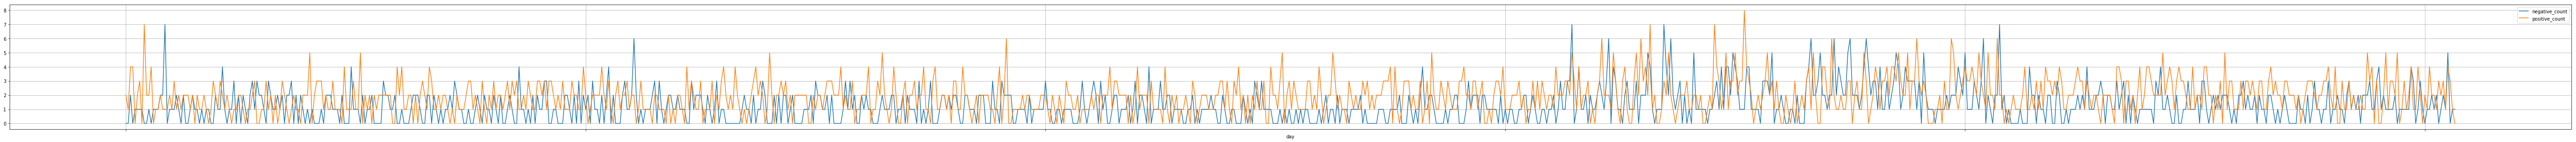

In [91]:
ai_df_vis.plot(x='day', y=['negative_count', 'positive_count'], figsize=(100,5), grid=True)